<a href="https://colab.research.google.com/github/des737/b_thesis/blob/main/grad_playgorund.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## マウント&ライブラリ導入



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!git clone https://github.com/facebookresearch/fastText.git
!cd fastText
!sudo pip install ./fastText

Cloning into 'fastText'...
remote: Enumerating objects: 3986, done.
remote: Counting objects: 100% (1014/1014), done.
remote: Compressing objects: 100% (180/180), done.
remote: Total 3986 (delta 888), reused 854 (delta 830), pack-reused 2972
Receiving objects: 100% (3986/3986), 8.29 MiB | 10.70 MiB/s, done.
Resolving deltas: 100% (2526/2526), done.
Processing ./fastText
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached pybind11-2.11.1-py3-none-any.whl (227 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp310-cp310-linux_x86_64.whl size=4214502 sha256=ebef5b23f348e5ab17c053c42186a92f88d4b2b94cab180a9c330566ed0b83a5
  Stored in directory: /tmp/pip-ephem-wheel-cache-qtha4z1d/wheels/8b/05/af/3cfae069d904597d44b309c956601b611bdf8967bcbe968903
Successfully built fasttext


## 次元削減

In [ ]:
import fasttext.util
#次元削減
ft_zh = fasttext.load_model('./drive/Shareddrives/卒論データ/fasttext_models/cc.zh.300.bin')
fasttext.util.reduce_model(ft_zh, 50) #寄与率
ft_zh.save_model('./drive/Shareddrives/卒論データ/fasttext_models/cc.zh.50.bin')

## 遊び

In [ ]:
address = "./drive/Shareddrives/卒論データ/fasttext_models/"
print(address+"cc.zh.300.bin")

./drive/Shareddrives/卒論データ/fasttext_models/cc.zh.300.bin


In [ ]:
import numpy as np
import fasttext.util
#fasttext.util.download_model('en', if_exists='ignore')  # English

In [ ]:
ft_en = fasttext.load_model(address+'cc.en.300.bin')
words_en = ft_en.get_words()

In [ ]:
ft_ja = fasttext.load_model(address+'cc.ja.300.bin')
words_ja = ft_ja.get_words(on_unicode_error='ignore')

In [ ]:
ft_zh = fasttext.load_model(address+'cc.zh.300.bin')
words_zh = ft_zh.get_words(on_unicode_error='ignore')

In [ ]:
ft_zh.get_words(on_unicode_error='ignore')

## 共通語＋頻度処理

In [ ]:
#ver3

import urllib.request
import os
if not os.path.exists("ja-en.txt"):
    urllib.request.urlretrieve("https://dl.fbaipublicfiles.com/arrival/dictionaries/ja-en.txt", "ja-en.txt")
if not os.path.exists("zh-en.txt"):
    urllib.request.urlretrieve("https://dl.fbaipublicfiles.com/arrival/dictionaries/zh-en.txt", "zh-en.txt")

# Load the dictionaries as lists
ja_en_pairs = load_dictionary_as_list("ja-en.txt")
zh_en_pairs = load_dictionary_as_list("zh-en.txt")

# Create multimap (dict of sets) for each language to English
ja_en_multimap = {}
zh_en_multimap = {}

for ja_word, en_word in ja_en_pairs:
    if en_word not in ja_en_multimap:
        ja_en_multimap[en_word] = set()
        ja_en_multimap[en_word].add(ja_word)
print(len(ja_en_multimap))
for zh_word, en_word in zh_en_pairs:
    if en_word not in zh_en_multimap:
        zh_en_multimap[en_word] = set()
        zh_en_multimap[en_word].add(zh_word)
print(len(zh_en_multimap))

# Find common English words in both multimaps
common_en_words_set = set(ja_en_multimap.keys()).intersection(set(zh_en_multimap.keys()))

common_en_words = []
common_ja_words = []
common_zh_words = []

for en_word in common_en_words_set:
    ja_word_set = ja_en_multimap[en_word]
    zh_word_set = zh_en_multimap[en_word]

    # 両方の言語に翻訳が存在する場合のみ追加
    if ja_word_set and zh_word_set:
        common_en_words.append(en_word)
        common_ja_words.append(list(ja_word_set)[0])
        common_zh_words.append(list(zh_word_set)[0])

# 結果の長さを表示
print(len(common_en_words))
print(len(common_ja_words))
print(len(common_zh_words))
# print(common_en_words)
# print(common_ja_words)
# print(common_zh_words)


NameError: name 'load_dictionary_as_list' is not defined

In [ ]:
#ver2
!pip install wordfreq

from wordfreq import word_frequency
def load_dictionary_as_list(file_path):
    pairs = []
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            lang_word, en_word = line.strip().split()  # Assuming the file is tab-separated
            pairs.append((lang_word, en_word))
    return pairs

import urllib.request
import os
if not os.path.exists("ja-en.txt"):
    urllib.request.urlretrieve("https://dl.fbaipublicfiles.com/arrival/dictionaries/ja-en.txt", "ja-en.txt")
if not os.path.exists("zh-en.txt"):
    urllib.request.urlretrieve("https://dl.fbaipublicfiles.com/arrival/dictionaries/zh-en.txt", "zh-en.txt")

# Load the dictionaries as lists
ja_en_pairs = load_dictionary_as_list("ja-en.txt")
zh_en_pairs = load_dictionary_as_list("zh-en.txt")

# Create multimap (dict of sets) for each language to English
ja_en_multimap = {}
zh_en_multimap = {}

for ja_word, en_word in ja_en_pairs:
    if en_word not in ja_en_multimap:
        ja_en_multimap[en_word] = set()
        ja_en_multimap[en_word].add(ja_word)
print(len(ja_en_multimap))
for zh_word, en_word in zh_en_pairs:
    if en_word not in zh_en_multimap:
        zh_en_multimap[en_word] = set()
        zh_en_multimap[en_word].add(zh_word)
print(len(zh_en_multimap))

# Find common English words in both multimaps
common_en_words_set = set(ja_en_multimap.keys()).intersection(set(zh_en_multimap.keys()))

# Find corresponding Japanese words for the common English words
common_en_words = []
set_common_ja_words = []
set_common_zh_words = []
for en_word in common_en_words_set:
    if (ja_en_multimap[en_word] in set_common_ja_words) or (zh_en_multimap[en_word] in set_common_zh_words):
        continue
    set_common_ja_words.append(ja_en_multimap[en_word])
    set_common_zh_words.append(zh_en_multimap[en_word])
    common_en_words.append(en_word)

    # if len(common_ja_words) != len(common_zh_words):
    #     print(common_ja_words)
    #     print(ja_en_multimap[en_word])
    #     print(zh_en_multimap[en_word] in common_zh_words)
    #     print(common_zh_words)
    #     print(zh_en_multimap[en_word])
    #     break
common_ja_words = []
common_zh_words = []
for i in range(len(set_common_zh_words)):
    common_ja_words.append(list(set_common_ja_words.pop())[0])
    common_zh_words.append(list(set_common_zh_words.pop())[0])

common_ja_words.reverse()
common_zh_words.reverse()

print(len(common_en_words))
print(len(common_ja_words))
print(len(common_zh_words))


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 MB 26.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.4/53.4 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 774.0/774.0 kB 58.9 MB/s eta 0:00:00
  Attempting uninstall: regex
    Found existing installation: regex 2023.6.3
    Uninstalling regex-2023.6.3:
      Successfully uninstalled regex-2023.6.3
22531
15152
6307
6307
6307


In [ ]:
#ver1
!pip install wordfreq

from wordfreq import word_frequency
def load_dictionary_as_list(file_path):
    pairs = []
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            lang_word, en_word = line.strip().split()  # Assuming the file is tab-separated
            pairs.append((lang_word, en_word))
    return pairs

import urllib.request
import os
if not os.path.exists("ja-en.txt"):
    urllib.request.urlretrieve("https://dl.fbaipublicfiles.com/arrival/dictionaries/ja-en.txt", "ja-en.txt")
if not os.path.exists("zh-en.txt"):
    urllib.request.urlretrieve("https://dl.fbaipublicfiles.com/arrival/dictionaries/zh-en.txt", "zh-en.txt")

# Load the dictionaries as lists
ja_en_pairs = load_dictionary_as_list("ja-en.txt")
zh_en_pairs = load_dictionary_as_list("zh-en.txt")

# Create multimap (dict of sets) for each language to English
ja_en_multimap = {}
zh_en_multimap = {}

for ja_word, en_word in ja_en_pairs:
    if en_word not in ja_en_multimap:
        ja_en_multimap[en_word] = set()
    ja_en_multimap[en_word].add(ja_word)

for zh_word, en_word in zh_en_pairs:
    if en_word not in zh_en_multimap:
        zh_en_multimap[en_word] = set()
    zh_en_multimap[en_word].add(zh_word)

# Find common English words in both multimaps
common_en_words = set(ja_en_multimap.keys()).intersection(set(zh_en_multimap.keys()))

# Find corresponding Japanese words for the common English words

common_ja_words = set()
common_zh_words = set()
for en_word in common_en_words:
    common_ja_words.update(ja_en_multimap[en_word])
    common_zh_words.update(zh_en_multimap[en_word])

# Output the common Japanese words and their count
common_ja_words, len(common_ja_words)
print(len(common_en_words))
print(len(common_ja_words))
print(len(common_zh_words))

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 MB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.4/53.4 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 774.0/774.0 kB 47.7 MB/s eta 0:00:00
  Attempting uninstall: regex
    Found existing installation: regex 2023.6.3
    Uninstalling regex-2023.6.3:
      Successfully uninstalled regex-2023.6.3
9077
9205
10118


In [ ]:
!pip install mecab-python3
!pip install ipadic #unidic-lite

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.7/581.7 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 53.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for ipadic: filename=ipadic-1.0.0-py3-none-any.whl size=13556704 sha256=b94ce63cb15acb510d9fba06bd6fdee27e4c004543ee2e9f265398ddb036fe07
  Stored in directory: /root/.cache/pip/wheels/5b/ea/e3/2f6e0860a327daba3b030853fce4483ed37468bbf1101c59c3
Successfully built ipadic


In [ ]:
def words_frequency_50000(words, common_words, lang='en'):
    from wordfreq import word_frequency
    import string
    import re

    unique_words = set()
    for word in words:
        # Remove punctuation and convert to lowercase
        normalized_word = word.strip(string.punctuation).lower()
        normalized_word = re.sub(r'-+', '-', normalized_word)
        if not normalized_word in common_words:
            unique_words.add(normalized_word)

    # Get the frequency of each word
    word_freqs = [(word, word_frequency(word, lang)) for word in unique_words]  # Replace 'en' with the relevant language code

    # Sort the words by frequency, descending
    word_freqs.sort(key=lambda x: x[1], reverse=True)

    # Select the top N words
    top_n_words = word_freqs[:50000]

    # Output the top N words

    # for word, freq in top_n_words:
    #     print(word, freq)
    top_n_words_only = [word for word,_ in top_n_words]
    return top_n_words_only

In [ ]:
words_en_freq = words_frequency_50000(words_en,common_en_words)
print(f"words_en_freq:{len(words_en_freq)}")

words_en_freq:50000


In [ ]:
words_ja_freq = words_frequency_50000(words_ja,common_ja_words,lang="ja")
print(f"words_ja_freq:{len(words_ja_freq)}")

words_ja_freq:50000


In [ ]:
words_zh_freq = words_frequency_50000(words_zh,common_zh_words,lang="zh")
print(f"words_zh_freq:{len(words_zh_freq)}")

Building prefix dict from /usr/local/lib/python3.10/dist-packages/wordfreq/data/jieba_zh.txt ...
DEBUG:jieba:Building prefix dict from /usr/local/lib/python3.10/dist-packages/wordfreq/data/jieba_zh.txt ...
Dumping model to file cache /tmp/jieba.ub9d891415b68a921ca1e5556598ea8ee.cache
DEBUG:jieba:Dumping model to file cache /tmp/jieba.ub9d891415b68a921ca1e5556598ea8ee.cache
Loading model cost 0.084 seconds.
DEBUG:jieba:Loading model cost 0.084 seconds.
Prefix dict has been built successfully.
DEBUG:jieba:Prefix dict has been built successfully.


words_zh_freq:50000


## 言語別行列生成

In [ ]:
leng = 50000 #len(words)
dim = 300 #ft_en.get_dimension()

In [ ]:
original_wordMatrix_en = np.empty((leng, dim))
for i in range(leng):
    original_wordMatrix_en[i] = ft_en.get_word_vector(words_en[i])

In [ ]:
wordMatrix_en = np.empty((leng, dim))
comb_en_words=list(common_en_words)+words_en_freq
for i in range(leng):
    vec = ft_en.get_word_vector(comb_en_words[i])
    wordMatrix_en[i] = vec

In [ ]:
wordMatrix_ja = np.empty((leng, dim))
comb_ja_words=list(common_ja_words)+words_ja_freq
for i in range(leng):
    wordMatrix_ja[i] = ft_ja.get_word_vector(comb_ja_words[i])

In [ ]:
wordMatrix_zh = np.empty((leng, dim))
comb_zh_words=list(common_zh_words)+words_zh_freq
for i in range(leng):
    wordMatrix_zh[i] = ft_zh.get_word_vector(comb_zh_words[i])

In [ ]:
print(wordMatrix_ja)

[[-0.03509822 -0.04982061  0.08060593 ... -0.03358392 -0.06198565
  -0.08856141]
 [ 0.01036599  0.001302    0.13455266 ... -0.06967255 -0.04363942
   0.06718973]
 [-0.09758105  0.07274158  0.04235193 ... -0.07314076 -0.02500858
   0.01304528]
 ...
 [ 0.03079626 -0.02692081  0.39060271 ...  0.00605348  0.08619536
   0.06489439]
 [-0.0066141   0.01206731  0.02712399 ...  0.05480544 -0.03652968
   0.04497329]
 [ 0.00826043 -0.02158586 -0.00207783 ... -0.00726173 -0.06602672
   0.01876043]]


In [ ]:
print(wordMatrix_zh)

[[-0.04415286  0.11861469  0.6074937  ... -0.13613886 -0.26133636
   0.12503207]
 [-0.62288147 -0.27179703  0.19223258 ... -0.12586245  0.02096676
   0.27997237]
 [ 0.03290619  0.08432602  0.39673811 ...  0.05617045 -0.08497167
   0.29667258]
 ...
 [ 0.05856334  0.05974519  0.1286536  ... -0.02520454 -0.16199675
  -0.00269449]
 [ 0.02049837  0.01556663  0.10704699 ...  0.0255271  -0.02141813
   0.01840952]
 [-0.00164458 -0.28626236  0.05089905 ...  0.1091194  -0.02023411
  -0.08980359]]


In [ ]:
print(wordMatrix_en.T.shape)

(300, 50000)


## 共通語のみ言語行列+処理

In [ ]:
leng = 9000 #len(words)
dim = 300 #ft_en.get_dimension()

In [ ]:
wordMatrix_common_en = np.empty((leng, dim))
comb_en_words=list(common_en_words)+words_en_freq
for i in range(leng):
    vec = ft_en.get_word_vector(comb_en_words[i])
    wordMatrix_common_en[i] = vec

In [ ]:
wordMatrix_common_ja = np.empty((leng, dim))
comb_ja_words=list(common_ja_words)+words_ja_freq
for i in range(leng):
    wordMatrix_common_ja[i] = ft_ja.get_word_vector(comb_en_words[i])

In [ ]:
wordMatrix_common_zh = np.empty((leng, dim))
comb_zh_words=list(common_zh_words)+words_zh_freq
for i in range(leng):
    wordMatrix_common_zh[i] = ft_zh.get_word_vector(comb_en_words[i])

In [ ]:
from sklearn.decomposition import FastICA

transformer = FastICA(
        random_state=0,
        whiten='unit-variance')
com1c = transformer.fit_transform(wordMatrix_common_en)
matrix1c = transformer.mixing_

com2c = transformer.fit_transform(wordMatrix_common_ja)
matrix2c = transformer.mixing_

com3c = transformer.fit_transform(wordMatrix_common_zh)
matrix3c = transformer.mixing_

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:123: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:123: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


### mixing

In [ ]:
mixing_arraysc = np.stack((matrix1c, matrix2c, matrix3c), axis=2)
print(mixing_arraysc.shape)

(300, 300, 3)


### components

In [ ]:
com_leng = len(common_en_words)
components_arrays = np.stack((com1[:com_leng,:], com2[:com_leng,:], com3[:com_leng,:]), axis=2)
print(components_arrays.shape)

(9000, 300, 3)


## Alignment

### Procrustes

In [152]:
import numpy as np

def procrustes_alignment(X, Y, com_leng):
    """
    Solves the Procrustes problem, finding the best orthogonal transformation matrix W
    that aligns matrix X with matrix Y.

    Parameters:
    X (numpy.ndarray): Source matrix.
    Y (numpy.ndarray): Target matrix.

    Returns:
    numpy.ndarray: The orthogonal matrix W that best aligns X with Y.
    """
    X=X[:,:com_leng]
    Y=Y[:,:com_leng]
    # Perform the Singular Value Decomposition
    U, _, Vt = np.linalg.svd(np.dot(Y, X.T))

    # Compute the optimal W
    W = np.dot(U, Vt)

    return W

# Calculate W
W = procrustes_alignment(wordMatrix_ja.T, wordMatrix_en.T,com_leng)
proc_wordMatrix_ja = (W @ wordMatrix_ja.T).T
print(proc_wordMatrix_ja_.shape)

W = procrustes_alignment(wordMatrix_zh.T, wordMatrix_en.T,com_leng)
proc_wordMatrix_zh = (W @ wordMatrix_zh.T).T
print(proc_wordMatrix_zh_.shape)


(50000, 300)
(50000, 300)


In [ ]:
import numpy as np

def procrustes_alignment(X, Y):
    """
    Solves the Procrustes problem, finding the best orthogonal transformation matrix W
    that aligns matrix X with matrix Y.

    Parameters:
    X (numpy.ndarray): Source matrix.
    Y (numpy.ndarray): Target matrix.

    Returns:
    numpy.ndarray: The orthogonal matrix W that best aligns X with Y.
    """
    # Perform the Singular Value Decomposition
    U, _, Vt = np.linalg.svd(np.dot(Y, X.T))

    # Compute the optimal W
    W = np.dot(U, Vt)

    return W

# Calculate W
W = procrustes_alignment(wordMatrix_ja.T, wordMatrix_en.T)
proc_wordMatrix_ja = (W @ wordMatrix_ja.T).T
print(proc_wordMatrix_ja.shape)

W = procrustes_alignment(wordMatrix_zh.T, wordMatrix_en.T)
proc_wordMatrix_zh = (W @ wordMatrix_zh.T).T
print(proc_wordMatrix_zh.shape)


(50000, 300)
(50000, 300)


### correlation

In [ ]:
import numpy as np

def compute_correlation_coefficients(first_embs, second_embs):
    """
    Compute the cross-correlation coefficients between English and Spanish embeddings.
    """
    correlation_matrix = np.corrcoef(first_embs, second_embs, rowvar=False)
    # Extract the 300x300 cross-correlation matrix
    return correlation_matrix

def find_max_correlation_pairs(correlation_matrix):
    """
    Find the pairs of indices with the highest correlation, in a greedy fashion.
    """
    matched_pairs = []
    used_indices = set()
    for i in range(correlation_matrix.shape[0]):
        # Find the index of the maximum correlation for the current English axis,
        # excluding already used indices.
        j = np.argmax(correlation_matrix[i, :])
        while j in used_indices:
            correlation_matrix[i, j] = -np.inf
            j = np.argmax(correlation_matrix[i, :])
        used_indices.add(j)
        matched_pairs.append((i, j))
    return matched_pairs

def permute_embeddings(second_embs, matched_pairs):
    """
    Permute the columns of Spanish embeddings to align with English embeddings.
    """
    permuted_second_embs = np.zeros_like(second_embs)
    for eng_idx, spa_idx in matched_pairs:
        permuted_second_embs[:, eng_idx] = second_embs[:, spa_idx]
    return permuted_second_embs

# Example Usage
# Load or create your English and Spanish embeddings matrices here
english_embeddings = np.random.rand(300, 300)  # Replace with actual embeddings
spanish_embeddings = np.random.rand(300, 300)  # Replace with actual embeddings

# Compute correlation coefficients
correlation_matrix = compute_correlation_coefficients(english_embeddings, spanish_embeddings)

# Find matched pairs of axes
matched_pairs = find_max_correlation_pairs(correlation_matrix)

# Permute Spanish embeddings
permuted_spanish_embeddings = permute_spanish_embeddings(spanish_embeddings, matched_pairs)


## fastica

In [ ]:
from sklearn.decomposition import FastICA

transformer = FastICA(
        random_state=0,
        whiten='unit-variance',max_iter=500)
com1 = transformer.fit_transform(wordMatrix_en)
matrix1 = transformer.mixing_

com2 = transformer.fit_transform(wordMatrix_ja)
matrix2 = transformer.mixing_

com3 = transformer.fit_transform(wordMatrix_zh)
matrix3 = transformer.mixing_

In [153]:
# transformer = FastICA(
#         random_state=0,
#         whiten='unit-variance',max_iter=500)
# com1 = transformer.fit_transform(WordMatrix_en)
# matrix1 = transformer.mixing_

proc_com2 = transformer.fit_transform(proc_wordMatrix_ja)
proc_matrix2 = transformer.mixing_

proc_com3 = transformer.fit_transform(proc_wordMatrix_zh)
proc_matrix3 = transformer.mixing_

### mixing

In [ ]:
mixing_arrays = np.stack((matrix1, matrix2, matrix3), axis=2)
print(mixing_arrays.shape)

(300, 300, 3)


In [154]:
proc_mixing_arrays = np.stack((matrix1, proc_matrix2, proc_matrix3), axis=2)
print(proc_mixing_arrays.shape)

(300, 300, 3)


### components

In [ ]:
com_leng = len(common_en_words)

In [ ]:
selected_indices1 = np.random.choice(com1.shape[0], com_leng, replace=False)
selected_indices2 = np.random.choice(com1.shape[0], com_leng, replace=False)
selected_indices3 = np.random.choice(com1.shape[0], com_leng, replace=False)

random_components_arrays = np.stack((com1[selected_indices1,:],com2[selected_indices2,:],com3[selected_indices3,:]),axis=2)
random_components_arrays.shape


(6307, 300, 3)

In [ ]:
#ver2
# def column_standardization(matrix):
#     """
#     Standardize each column of a matrix to have unit variance.
#     """
#     # Compute the mean and standard deviation of each column
#     #mean = np.mean(matrix, axis=0)
#     std = np.std(matrix, axis=0)
#     # Standardize each column by subtracting the mean and dividing by the standard deviation
#     standardized_matrix = matrix  / std
#     return standardized_matrix


common_components_arrays = np.stack((com1[:com_leng,:],
                              com2[:com_leng,:],
                              com3[:com_leng,:]), axis=2)
print(common_components_arrays.shape)

(6307, 300, 3)


In [ ]:
components_arrays = np.stack((com1, com2, com3), axis=2)
print(components_arrays.shape)

(50000, 300, 3)


In [155]:
proc_components_arrays = np.stack((com1, proc_com2, proc_com3), axis=2)
print(proc_components_arrays.shape)

(50000, 300, 3)


In [156]:
proc_common_components_arrays = np.stack((com1[:com_leng,:],
                              proc_com2[:com_leng,:],
                              proc_com3[:com_leng,:]), axis=2)
print(proc_common_components_arrays.shape)

(6307, 300, 3)


### 共通語処理なし単語行列の収束テスト

In [ ]:
transformer.fit_transform(original_wordMatrix_en)


array([[ 0.67824181, -0.73663266, -0.3941515 , ...,  0.91655851,
         0.95943494, -0.59159521],
       [ 0.37536775,  0.40210251, -0.05845842, ...,  0.92263541,
        -3.006712  , -0.34349749],
       [-1.39787654,  0.1927834 ,  0.28068938, ...,  0.64612885,
        -1.50914515, -1.38315837],
       ...,
       [-0.18521265,  0.07496725, -0.11929658, ...,  0.32128003,
        -0.21121691, -0.2675709 ],
       [-0.33707188,  0.52485977,  0.25200487, ..., -0.22610244,
        -0.25691503,  0.32726533],
       [ 0.38221098, -0.43327571, -0.30906707, ..., -0.80385375,
         0.32510219, -0.56579451]])

## ラベル付け

In [ ]:
top_indices = np.argsort(common_components_arrays[:, :, 0], axis=0)[-5:][::-1]
ica_axis_name_en = np.array(common_en_words)[np.argsort(common_components_arrays[:, :, 0], axis=0)[-5:][::-1]]
for i in range(300):
    print(ica_axis_name_en[:,i])

['agar' 'kei' 'rye' 'iq' 'pie']
['ou' 'id' 'tux' 'pea' 'seiko']
['iki' 'joe' 'fig' 'iq' 'mai']
['oda' 'doi' 'iki' 'god' 'id']
['elegy' 'fate' 'arc' 'tragic' 'oath']
['ou' 'polyp' 'hat' 'nova' 'poof']
['rust' 'ket' 'jun' 'stag' 'dan']
['iq' 'zoom' 'fuji' 'blur' 'lux']
['mop' 'doi' 'or' 'jet' 'sock']
['bags' 'purse' 'van' 'tow' 'gear']
['egg' 'gums' 'bonn' 'aoi' 'iq']
['iq' 'poor' 'nobi' 'rich' 'caste']
['doi' 'out' 'off' 'down' 'trill']
['mail' 'shipping' 'parcel' 'orders' 'dispatch']
['cup' 'pot' 'tea' 'mugs' 'bowl']
['bo' 'pry' 'iki' 'mop' 'sew']
['ruble' 'rye' 'kiev' 'soviet' 'tatar']
['id' 'iq' 'rod' 'volvo' 'pit']
['oda' 'acre' 'mop' 'rin' 'iki']
['yom' 'vase' 'egg' 'seiko' 'gene']
['zeus' 'min' 'bomb' 'shy' 'jet']
['oda' 'zeus' 'id' 'bonn' 'eve']
['sex' 'cock' 'tit' 'gay' 'pussy']
['rf' 'iq' 'typo' 'bye' 'val']
['if' 'ou' 'mrs' 'ken' 'why']
['ou' 'iki' 'iq' 'kei' 'ota']
['bo' 'pusan' 'ivy' 'takako' 'aizu']
['doi' 'bo' 'oda' 'uk' 'harbin']
['bra' 'saito' 'zee' 'plot' 'hue']
['or' '

In [ ]:
top_indices = np.argsort(common_components_arrays[:, :, 1], axis=0)[-5:][::-1]
ica_axis_name_ja = np.array(common_ja_words)[top_indices]
for i in range(300):
    print(ica_axis_name_ja[:,i])

['放送' '偏向' 'フジ' '衛星' 'アナ']
['赤痢' '魚雷' '太字' '格付' '南極']
['売春' '三菱' '重力' '腎臓' '障壁']
['ラウ' '蒸す' '乗算' 'ラブ' '触手']
['家事' '締切' '単調' '集計' '物流']
['公爵' '男爵' '侯爵' '公国' '環礁']
['サグ' '禁欲' '純潔' '闘牛' '放蕩']
['公証' '蹄鉄' '紀元' '忠孝' '猟犬']
['石綿' '不妊' '温室' '尊者' '天丼']
['降順' '太地' 'サグ' '青磁' '天津']
['肉腫' '角膜' 'エゴ' '利得' '特権']
['経度' '支店' 'ベグ' '郵便' '写像']
['主食' '人道' '深度' '膵臓' '趣味']
['転送' 'ユタ' '子爵' '諸島' '環礁']
['宛先' '手紙' '封筒' '電報' '郵便']
['懸賞' '鉱夫' '減刑' '騎手' 'セミ']
['脛骨' '腓骨' '衛生' '得点' '船団']
['日産' '廃車' '車両' '剛性' '車庫']
['拍手' '記事' '訪問' '更新' 'タグ']
['産卵' '実効' '割賦' '卵黄' '師団']
['東京' '下町' '葛西' '原宿' '横浜']
['公訴' '臼歯' '花巻' '血栓' '紙幣']
['クイ' 'チェ' 'ハウ' 'プラ' '鼻音']
['旅程' '旅行' '休暇' '滞在' '遠征']
['王族' '天皇' '皇后' '公爵' '陵墓']
['伴奏' '富江' '軌道' '漏斗' '農薬']
['降順' 'かご' '通知' '磁性' '嚢胞']
['信玄' 'ユタ' '神経' '麻酔' '甘粛']
['排水' '水門' '雨水' '下水' '排出']
['トン' '馬力' '無礼' 'キロ' '動員']
['有形' '月刊' '解任' 'ゲル' 'カビ']
['視界' '網膜' '凝視' '結膜' '斜視']
['月経' '排卵' '赤痢' '菌類' '流産']
['表土' '透析' '過失' '六月' '角膜']
['急騰' '投機' '株式' '通貨' 'ドル']
['子爵' '男爵' '捕鯨' '禁輸' 'シギ']
['赤痢' '脳炎' '誤謬' '行軍' '血清']
[

In [ ]:
top_indices = np.argsort(common_components_arrays[:, :, 2], axis=0)[-5:][::-1]
ica_axis_name_zh = np.array(common_zh_words)[top_indices]
for i in range(5):
    print(ica_axis_name_zh[:,i])

['霜' '約旦' '白蟻' '王朝' '皇家']
['壞' '成績' '脾氣' '通風' '口才']
['孢子' '攝政' '躍' '年表' '土佐']
['蛤' '為何' '哎喲' '耶' '問']
['副詞' '織田' '肉餅' '丁烷' '牙齦']


## 人工生成データ

In [ ]:
# scinario 1
import numpy as np
from scipy.stats import special_ortho_group
dim = 500
num_matrices = 10
m = special_ortho_group.rvs(dim)

matrices=[]
matrices.append(m)

for i in range(num_matrices-1):
    if i%2==0:
        matrices.append(np.hstack((special_ortho_group.rvs(dim)[:,:dim//2], m[:,:dim//2])))
    else:
        matrices.append(np.hstack((m[:,:dim//2], special_ortho_group.rvs(dim)[:,:dim//2])))

art_mixing_half = np.stack(matrices, axis=2)
print(art_mixing_half.shape)

(500, 500, 10)


In [ ]:
import numpy as np

np.random.seed(0)
dim=500
# datadim=10000


# Number of matrices to generate
num_matrices = 5

# Initialize a list to store the matrices
matrices = []

left_part = np.random.rand(datadim, dim//2)

for _ in range(num_matrices):
    # Right 25 dimensions are different for each matrix
    right_part = np.random.rand(datadim, dim//2)

    # Combine the two parts
    matrix = np.hstack((left_part, right_part))

    # Append the matrix to the list
    matrices.append(matrix)

matrix1 = matrices[0]
matrix2 = matrices[1]
matrix3 = matrices[2]
print(matrix1)
print(matrix2)
print(matrix3)

(300, 50)


In [ ]:
# scinario 2
import numpy as np
from scipy.stats import special_ortho_group  # Requires version 0.18 of scipy
dim = 300

m = special_ortho_group.rvs(dim)
matrix1 = m

matrix2 = np.hstack((m[:,:dim//2], special_ortho_group.rvs(dim)[:,:dim//2]))

matrix3 = np.hstack((m[:,:dim//2], special_ortho_group.rvs(dim)[:,:dim//2]))

# print(f"matrix1: {matrix1}")
# print(f"matrix2: {matrix2}")
# print(f"matrix3: {matrix3}")
mixing_arrays = np.stack((matrix1, matrix2, matrix3), axis=2)
print(mixing_arrays.shape)

(300, 300, 3)


## PCA

In [ ]:
##pca
from sklearn.decomposition import PCA

pca = PCA(n_components=0.85, svd_solver == 'full')
pca.fit(matrix1)

## ISCTest

In [ ]:
import numpy as np
from scipy.special import betainc
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 100
class ISCTest:
    # strategy = 'SL', 'ML', 'CL'
    # corrected=1; %if you want to compute corrected alphas yourself, choose this
    #    case 'simes', simes=1;     %use Simes procedure for FDR computation (not recommended)
    #    case verbose: Do we show diagnostics on screen? (0/1/2)
    #    The user has to tell what to test mixing=1 to avoid misunderstanding
    #    if correct=True, then the user has to give the corrected alpha values


    def __init__(self,
                 spatial_patt_tens,
                 alphaFP, alphaFD, mixing=None,
                 testing_approach=None,
                 strategy='SL',
                 simes=0,
                 corrected=False,
                 verbose=1,
                 ):
        self.spatial_patt_tens = spatial_patt_tens.copy()
        self.alphaFP = alphaFP
        self.alphaFD = alphaFD

        self.strategy = strategy
        self.simes = simes
        self.corrected = corrected
        self.verbose = verbose
        self.testing_components = None
        self.empirical = None

        self.nomoreclusters = False
        self.clusterindex = 0

        # Check if we are testing components or columns of mixing matrix
        if mixing == True:
            self.testing_components = 0
            self.empirical = 0
        elif mixing == False:
            self.testing_components = 1
            self.empirical = 1
        if testing_approach == 'analytic':
            self.empirical = 0
        elif testing_approach == 'empirical':
            self.empirical = 1

        if self.testing_components is None:
            raise ValueError('You must specify if we are testing components or columns of mixing matrix, input either option "components" or "mixing".')
        # READ BASIC DIMENSIONS
        self.datadim = spatial_patt_tens.shape[0]
        self.pcadim = spatial_patt_tens.shape[1]
        self.subjects = spatial_patt_tens.shape[2]
        self.deflationtensor=np.zeros([self.pcadim,self.subjects,self.subjects])
        # Check if we have complex-valued data
        self.complexvalued = not np.isreal(spatial_patt_tens).all()

        self.clustering = np.empty((0, self.subjects), float)
        self.clusterorder = np.empty((0, self.subjects), int)
        self.linkpvalues = np.empty((0, self.subjects), float)
        self.linksimilarities = np.empty((0, self.subjects), float)

        self.similarities=[]

        # INITIAL OUTPUT TO USER
        if verbose:
            print('\n*** ISCTest: ICA testing algorithm ***')
            print('Input parameters:')
            print(f'  Number of subjects: {self.subjects}')
            print(f'  Number of vectors/components per subject: {self.pcadim}')
            print(f'  Data vector dimension: {self.datadim}')
            print(f'  False positive rate: {self.alphaFP}')
            print(f'  False discovery rate: {self.alphaFD}')
            if self.complexvalued:
                print('  Data is complex-valued, distributions adjusted accordingly')

        # COMPUTE SIMILARITIES
        self.simitensor, self.maxtensor, self.simimom2 = self.compute_similarities()

        # DO CLUSTERING in deflation mode
        if verbose:
            print('\n*** Launching clustering computations ***')

        # In analytical method, needs two iterations but in empirical method, only one is needed
        self.iterations = 1 if self.empirical else 2
        print(f"iterations: {self.iterations}")

        # Loop for the two iterations in analytical method
        for iteration in range(1,self.iterations+1):
            if self.verbose:
                if self.empirical:
                    print('Starting iteration, forming cluster ')
                else:
                    print(f'Starting iteration {iteration}, forming cluster ')
            self.execute_clustering(iteration)
        if verbose:
            print("*** Clustering computation finished ***\n")
            num_clusters = np.size(self.clustering, 0)
            print(f"Number of clusters found: {num_clusters}")

            comps_clustered = np.sum(self.clustering > -1)
            percentage_vectors = comps_clustered / (self.subjects * self.pcadim) * 100
            print(f"Number of vectors clustered: {comps_clustered} ({percentage_vectors:.2f}% of all vectors)")

            avg_vectors_per_cluster = comps_clustered / num_clusters
            print(f"Average number of vectors per cluster: {avg_vectors_per_cluster:.2f}")

            print("Internal parameters:")
            avg_eff_dim = np.mean(self.effdim)
            print(f"  Average estimated effective dimension: {avg_eff_dim:.2f}")

            print(f"  Corrected alpha value for FDR: {self.alphacorr_FD:e}")

            com_array = self.linksimilarities[self.linksimilarities != 0]
            min_similarity_FDR = np.min(com_array) if com_array.size > 0 else np.nan
            print(f"  Smallest similarity considered significant by FDR: {min_similarity_FDR:.4f}")

            print(f"  Corrected alpha value for FPR: {self.alphacorr_FP:e}")

            com_array = np.max(self.linksimilarities, axis=1)
            min_similarity_FPR = np.min(com_array) if com_array.size > 0 else np.nan
            print(f"  Smallest similarity considered significant by FPR: {min_similarity_FPR:.4f}")

            print("Exiting testing algorithm successfully.")




    # Initialize the tensor which gives the set of pvalues which have not been deflated away

    def execute_clustering(self, iteration):
        while not self.nomoreclusters:
            if self.verbose:
                print(f"{self.clusterindex + 1}.", end=' ')
            if self.empirical:
                # Estimate effective dimension
                effdimest = 1 / self.simimom2 - 0.5 if self.complexvalued else 1 / self.simimom2
                self.effdim = effdimest * np.ones((self.subjects, self.subjects))
            else:
                if iteration == 1:
                    if self.clusterindex == 0:
                        self.effdim = self.pcadim * np.ones((self.subjects, self.subjects))
                    else:
                        neweffdim = self.pcadim * np.ones((self.subjects, self.subjects))
                        for c in range(len(self.clustering)):
                            clustersize = sum(self.clustering[c, :] > -1)
                            for s1 in range(self.subjects):
                                for s2 in range(s1 + 1, self.subjects):
                                    # for each pair of component in the same cluster,
                                    # reduce new effdim of that similarity by 1
                                    # for numerical stability retain minimum of 2
                                    if self.clustering[c, s1] > -1  and self.clustering[c, s2] > -1:
                                        neweffdim[s1, s2] = max(2, neweffdim[s1, s2] - 1)
                                        neweffdim[s2, s1] = max(2, neweffdim[s2, s1] - 1)
                        # Update effdim
                        self.effdim = neweffdim
            # print(f"self.effdim: {self.effdim}")
            # COMPUTE P-VALUES USING BETA DISTRIBUTION
            pvalues = np.ones(self.simitensor.shape)
            for subj1 in range(self.subjects):
                for subj2 in range(self.subjects):
                    if not self.complexvalued:
                        pvalues[:, subj1, subj2] = 1 - (betainc(0.5, (self.effdim[subj1, subj2] - 1) / 2, self.simitensor[:, subj1, subj2] ** 2)) ** self.pcadim
                        # print(f"self.effdim[subj1, subj2]: {self.effdim[subj1, subj2]}")
                        # print(f"pvalues[:, subj1, subj2]: {pvalues[:, subj1, subj2]}")
                        # print(f"pone: {1-(betainc(0.5, (self.effdim[subj1, subj2] - 1) / 2, self.simitensor[:, subj1, subj2] ** 2))** self.pcadim}")
                    else:
                        pvalues[:, subj1, subj2] = 1 - (betainc(1, (2 * self.effdim[subj1, subj2] - 1) / 2, self.simitensor[:, subj1, subj2] ** 2)) ** self.pcadim

            # print(f"original_pvalues: {pvalues}")
            # DEFLATION: REMOVE THOSE CONNECTIONS WHICH SHOULD NOT BE USED

            #First create matrix which contains all the p-values,
            #even those deflated away (needed for FDR computation by Simes)
            pvalues_nodefl = pvalues.copy()
            # Deflation: Set to one those pvalues which have been deflated away
            pvalues = np.maximum(pvalues_nodefl, self.deflationtensor)
            # print(f"processed_pvalues: {pvalues}")
            # Function to calculate upper triangular indices
            def uppertriangindices(pcadim, subjects):
                mask = np.zeros((pcadim, subjects, subjects), dtype=bool)
                for subj1 in range(subjects):
                    for subj2 in range(subj1):
                        mask[:, subj1, subj2] = np.ones(pcadim, dtype=bool)
                return np.where(mask.flatten())[0]

            # COMPUTE THRESHOLDS FOR P-VALUES CORRECTED FOR MULTIPLE TESTING
            if self.corrected:  # if the user input corrected values, just use them
                self.alphacorr_FP = self.alphaFP
                self.alphacorr_FD = self.alphaFD
            else:
                # Compute Bonferroni-corrected FPR threshold (forming a new cluster)
                self.alphacorr_FP = self.alphaFP / (self.subjects * (self.subjects - 1) * self.pcadim / 2)

                # Compute corrected FDR threshold
                if self.simes:  # Simes procedure (well-known FDR method)
                    # Note: here we use all p-values even those deflated away
                    # (ignoring only duplicates due to symmetry by using uppertriangindices)
                    upper_tri_indices = uppertriangindices(self.pcadim, self.subjects)
                    pvalues_FDR = np.sort(pvalues_nodefl.flatten()[upper_tri_indices])
                    cum_alphaFD = np.arange(1, pvalues_FDR.size + 1) / pvalues_FDR.size * self.alphaFD
                    valid_indices = np.where(pvalues_FDR <= cum_alphaFD)[0]
                    self.alphacorr_FD = pvalues_FDR[valid_indices[-1]] if valid_indices.size > 0 else 0
                else:  # Simple alternative to Simes procedure, in 2013 paper
                    self.alphacorr_FD = self.alphaFD / (self.subjects - 2)

            # Print some simple diagnostics on screen, if extraverbose
            if self.verbose == 2:
                if not self.empirical:
                    print(f'  Average estimated effective dimension: {self.effdim.mean():6.2f}')
                    print(f'  Corrected alpha value for FDR: {self.alphacorr_FD:e}')
                    print(f'  Corrected alpha value for FPR: {self.alphacorr_FP:e}')
                FDpvalues = np.sum(pvalues < self.alphacorr_FD)
                FPpvalues = np.sum(pvalues < self.alphacorr_FP)
                total_comparisons = self.subjects * (self.subjects - 1) / self.pcadim ** 2 * 2 * 100
                print(f'  Number of similarities left above FDR threshold: {FDpvalues} ({FDpvalues / total_comparisons:2.6f}%)')
                print(f'  Number of similarities left above FPR threshold: {FPpvalues} ({FPpvalues / total_comparisons:2.6f}%)')

            # MAIN CLUSTERING PART (for creating one cluster)

            # FIND INITIAL PAIR OF COMPONENTS TO FORM A CLUSTER
            #####################################

            # Find maximum single correlation to start clustering with
            pval, minind = np.min(pvalues), np.argmin(pvalues)
            # print(f"pval: {pval}, minind: {minind}")


            # Abort if max similarity does not reach threshold given by FPR
            # (Or if, exceptionally, pval is equal to one which means zero similarity)
            if pval > self.alphacorr_FP or pval == 1:
                self.nomoreclusters = True
            else:  # we have a cluster, continue adding more components to it
                # First find subject and component number of the minimizing pvalue
                compind1, subjind1, subjind2 = np.unravel_index(minind, (self.pcadim, self.subjects, self.subjects))
                compind2 = self.maxtensor[np.unravel_index(minind,self.maxtensor.shape)]
                # Add these initial two to lists of components in this cluster.
                # a) create list of subjects in cluster
                # print(f"compind1: {compind1}, compind2: {compind2}, subjind1: {subjind1}, subjind2: {subjind2}")

                clustersubjs = np.array([subjind1, subjind2])
                # b) create list of components in cluster
                clustercomps = np.array([compind1, compind2])
                # c) create list of linking pvalues
                clusterpvalues = np.array([pval, pval])
                # d) create list of linking similarities
                clustersimis = np.array([1, 1]) * self.simitensor[compind1, subjind1, subjind2]

                # ADD NEW COMPONENTS TO CURRENT CLUSTER
                #################################
                # Loop to find all components sufficiently connected to those already found
                if self.subjects > 2:
                    nomorecomponents = False  # boolean which tells if all components have been found
                else:
                    nomorecomponents = True  # if there are just two subjects in the data,
                                            # no need to even start this adding of new components

                while not nomorecomponents:

                    # Create matrix with similarities of components in remaining subjects
                    # to those subjects in present cluster
                    # First, get indices of subjects not in cluster
                    remainsubjs = np.ones(self.subjects, dtype=int)
                    remainsubjs[clustersubjs] = 0
                    remainsubjinds = np.where(remainsubjs==1)[0]
                    pvalues_selected = np.zeros((len(clustersubjs), np.sum(remainsubjs)))
                    maxtensor_selected = np.full(pvalues_selected.shape, -1, dtype=int)

                    # print(f"clustersubjs: {clustersubjs}")
                    # print(f"remainsubjs: {remainsubjs}")
                    # print(f"remainsubjinds: {remainsubjinds}")
                    # for each component in cluster, create row with similarities
                    # to all the candidate components (each column is one subject) which could be added
                    for i in range(len(clustersubjs)):
                        pvalues_selected[i, :] = pvalues[clustercomps[i], clustersubjs[i], remainsubjinds]
                        maxtensor_selected[i, :] = self.maxtensor[clustercomps[i], clustersubjs[i], remainsubjinds]

                    # USE DIFFERENT LINKAGE STRATEGIES TO FIND NEW CANDIDATE
                    # Get aggregate pvalues from the cluster to candidate components
                    if self.strategy == 'SL':  # single-linkage
                        outpvals, outmininds = np.min(pvalues_selected, axis=0), np.argmin(pvalues_selected, axis=0)
                    elif self.strategy == 'CL':  # complete-linkage
                        # This is a bit tricky because we have to first determine
                        # if the links to the same subject are to the same component
                        samesimilarity = np.all(maxtensor_selected == maxtensor_selected[0, :], axis=0)
                        # Set p-value to ridiculously large if the links not the same subject
                        pvalues_selected_qualified = pvalues_selected + 100 * (1 - samesimilarity)
                        # And finally find the max p-values, i.e. weakest links from the cluster
                        outpvals, outmininds = np.max(pvalues_selected_qualified, axis=0), np.argmax(pvalues_selected_qualified, axis=0)
                    elif self.strategy == 'ML':  # median-linkage
                        # First make check like in CL
                        samesimilarity = np.all(maxtensor_selected == np.median(maxtensor_selected, axis=0), axis=0)
                        pvalues_selected_qualified = pvalues_selected + 100 * (1 - samesimilarity)
                        # The following is like CL, but use median instead of max
                        # Sort each column
                        sortvals, sortinds = np.sort(pvalues_selected_qualified, axis=0), np.argsort(pvalues_selected_qualified, axis=0)
                        # Compute index of median
                        medianrow = (pvalues_selected_qualified.shape[0] - 1) // 2
                        # And then find the median elements
                        outpvals = sortvals[medianrow, :]
                        outmininds = sortinds[medianrow, :]

                    # For any strategy, finally find minimizing pvalue, i.e. best component to add
                    # among the significant/allowed connections
                    pval, minind = np.min(outpvals), np.argmin(outpvals)
                    # print(f"pval: {pval}, minind: {minind}")
                    # See if similarity fails to pass the FDR threshold
                    if pval > self.alphacorr_FD:
                        # If so, abort since cannot find any sufficiently connected components
                        nomorecomponents = True
                        print('pval > alphacorr_FD Could not find any sufficiently connected components!')
                    else:  # If sufficiently similar, add to cluster
                        # Find subject and component number of the minimizing pvalue
                        # First, subject/component inside cluster from which the minimizing link goes out
                        oldsubj = clustersubjs[outmininds[minind]]
                        oldcomp = clustercomps[outmininds[minind]]
                        # Second, subject/component outside cluster which is to be added
                        # (convert subject index according to ordering in remainsubjinds)
                        newsubj = remainsubjinds[minind]
                        # (fetch component number from maxtensor)
                        newcomp = self.maxtensor[oldcomp, oldsubj, newsubj]
                        # print(f"oldsubj: {oldsubj}, oldcomp: {oldcomp}, newsubj: {newsubj}, newcomp: {newcomp}")
                        # Then add to current cluster
                        clustersubjs = np.append(clustersubjs, newsubj)
                        clustercomps = np.append(clustercomps, newcomp)

                        # Store also linking p-value and similarities
                        clusterpvalues = np.append(clusterpvalues, pval)
                        clustersimis = np.append(clustersimis, self.simitensor[oldcomp, oldsubj, newsubj])

                        # If cluster size maximum, abort
                        if len(clustersubjs) == self.subjects:
                            nomorecomponents = True
            if not self.nomoreclusters:

                # ゼロ行列の代入
                self.clustering = np.vstack([self.clustering, np.full(self.subjects,-1,dtype=int)])
                self.clusterorder = np.vstack([self.clusterorder, np.zeros(self.subjects)])
                self.linkpvalues = np.vstack([self.linkpvalues, np.zeros(self.subjects)])
                self.linksimilarities = np.vstack([self.linksimilarities, np.zeros(self.subjects)])

                # 特定の値の代入
                self.clustering[self.clusterindex, clustersubjs] = clustercomps
                self.clusterorder[self.clusterindex, clustersubjs] = np.arange(1, len(clustersubjs) + 1)
                self.linkpvalues[self.clusterindex, clustersubjs] = clusterpvalues
                self.linksimilarities[self.clusterindex, clustersubjs] = clustersimis
                # Store also information on which vectors should be deflated, i.e., ignored
                for i in range(len(clustersubjs)):
                    # Easy to do deflation in one direction
                    self.deflationtensor[clustercomps[i], clustersubjs[i], :] = np.ones(self.subjects)
                    # But in the other direction more difficult
                    tmpmatrix = self.maxtensor[:, :, clustersubjs[i]]
                    incomingindex = np.where(tmpmatrix == clustercomps[i])
                    for comp, subj in zip(*incomingindex):
                        self.deflationtensor[comp, subj, clustersubjs[i]] = 1

                # Increment cluster number (iteration counter)
                self.clusterindex += 1
        if self.verbose:
            print("Done.")
            # print(f"clustering: {self.clustering}")
            if iteration == 1 and self.iterations == 2:  # If we have two iterations, give intermediate results
                num_clusters = np.size(self.clustering, 0)
                print(f"Number of clusters found in initial iteration: {num_clusters}")

                num_vectors_clustered = np.sum(self.clustering > -1)
                percentage_vectors = num_vectors_clustered / (self.subjects * self.pcadim) * 100
                print(f"Number of vectors clustered in initial iteration: {num_vectors_clustered} ({percentage_vectors:.2f}% of all vectors)")

                self.nomoreclusters = False
                self.clusterindex = 0

                self.deflationtensor=np.zeros([self.pcadim,self.subjects,self.subjects])

                self.clustering = np.empty((0, self.subjects), float)
                self.clusterorder = np.empty((0, self.subjects), int)
                self.linkpvalues = np.empty((0, self.subjects), float)
                self.linksimilarities = np.empty((0, self.subjects), float)


            # End of clustering logic

    def compute_similarities(self):
        """
        Computes the similarity tensor and outputs its maximal elements
        as well as information on second-order moments of the tensor

        ### Outputs:
        - The maximal similarities (for each component) in simitensor
        - Information on which components reached the maximum in maxtensor
        - Second-order moments in simimom2, used in fitting the empirical distributions.
        """
        print("Starting computation of similarities...")

        # Read basic dimensions
        print(f"Basic Dimensions - Subjects: {self.subjects}, PCA Dimensions: {self.pcadim}, Data Dimension: {self.datadim}")

        # Check for any problems in the data
        if np.any(np.sum(np.abs(self.spatial_patt_tens), axis=(1, 2)) == 0):
            print('\nWARNING: There seem to be zero vectors in the input!\n')
        if np.any(np.isnan(self.spatial_patt_tens)):
            print('\nWARNING: There seem to be NaN vectors in the input, ISCTEST is likely to crash!\n')

        # Remove means if testing independent components
        if self.testing_components:
            print("Removing means for testing independent components...")
            for k in range(self.subjects):
                for i in range(self.pcadim):
                    self.spatial_patt_tens[:, i, k] -= np.mean(self.spatial_patt_tens[:, i, k])

        # Compute stabilized inverse of covariance matrix if testing mixing matrix
        if not self.testing_components:
            if self.verbose:
                print('\nComputing stabilized inverse of covariance matrix:')
                print('  Concatenating data')
            wholedata = np.concatenate([self.spatial_patt_tens[:, :, k] for k in range(self.subjects)], axis=1)
            if self.verbose:
                print(f'  Calling numpy SVD function on matrix of size {wholedata.shape[0]} x {wholedata.shape[1]}')
            Uorig, sing, Vorig = np.linalg.svd(wholedata, full_matrices=False)
            singd = sing[:self.pcadim]
            # print(f"sing: {sing}")
            maxcondition = 10
            conditionnumber = singd[0] / singd[-1]
            if conditionnumber > maxcondition:
                changedsings = np.sum(singd < singd[0] / maxcondition)
                singd = np.maximum(singd, singd[0] / maxcondition)
                if self.verbose:
                    print('  WARNING: Global covariance matrix quite badly conditioned!')
                    print(f'    Original condition number {conditionnumber}')
                    print(f'    Increased {changedsings} smallest singular values')
            U = Uorig[:, :self.pcadim]
            D = np.diag(1.0 / singd**2) * self.datadim * self.pcadim
            # print(f"D: {D}")

        # Compute similarities and store max inter-subject similarities
        print("Computing similarities and storing max inter-subject similarities...")
        simitensor = np.zeros((self.pcadim, self.subjects, self.subjects))
        maxtensor = np.full((self.pcadim, self.subjects, self.subjects), -1,dtype=int)
        simimom2 = 0

        for subj1 in range(self.subjects):
            M1 = self.spatial_patt_tens[:, :, subj1]
            # print(f"M1: {M1}")

            # Normalization
            if self.testing_components:
                M1 /= np.sqrt(np.ones((self.datadim, 1)) * np.sum(np.abs(M1) ** 2, axis=0).T + 1e-100)
            else:
                M1 /= np.sqrt(np.ones((self.datadim, 1)) * np.diag(M1.T @ U @ D @ U.T @ M1).T + 1e-100)

            # print(f"M1: {M1}")
            for subj2 in range(self.subjects):
                if subj1 != subj2:
                    M2 = self.spatial_patt_tens[:, :, subj2]
                    # print(f"M2: {M2}")
                    if self.testing_components:
                        M2 /= np.sqrt(np.ones((self.datadim, 1)) * np.sum(np.abs(M2) ** 2, axis=0).T + 1e-100)
                        similarities = np.abs(M1.T @ M2)
                    else:
                        M2 /= np.sqrt(np.ones((self.datadim, 1)) * np.diag(M2.T @ ((U @ D) @ U.T) @ M2).T + 1e-100)
                        similarities = np.abs(M1.T @ U @ D @ U.T @ M2)
                    # print(f"M2: {M2}")
                    # print(f"similarities : {similarities}")

                    plt.hist(similarities.flatten(), bins=500, edgecolor='black')
                    self.similarities.append(similarities)
                    # タイトルとラベルを追加
                    plt.title('Histogram')
                    plt.xlabel(f'subject{subj1} and subject{subj2}')
                    plt.ylabel('Frequency')

                    # グラフを表示
                    plt.show()

                    #以下ica_axis_name_en等定義必要

                    maxsimis = np.max(similarities.T, axis=0)

                    # print(f"maxsimis : {maxsimis}")
                    maxindices = np.argmax(similarities.T, axis=0)
                    # print(f"maxindices : {maxindices}")
                    simitensor[:, subj1, subj2] = maxsimis.T
                    # print(f"simitensor[:, subj1, subj2] : {simitensor[:, subj1, subj2]}")
                    maxtensor[:, subj1, subj2] = maxindices.T
                    # print(f"maxtensor[:, subj1, subj2] : {maxtensor[:, subj1, subj2]}")
                    simimom2 += np.sum(np.sum(similarities**2))
                    # print(f"simimom2 : {simimom2}")
                    # print(f"Processed subject pair: {subj1}, {subj2}")

        # Compute moments used only in determining empirical thresholds
        simimom2 /= (self.subjects * (self.subjects - 1) * self.pcadim**2)
        print(f"simimom2 : {simimom2}")

        # Due to numerical inaccuracies, similarities can be slightly larger than 1.
        simitensor = np.minimum(simitensor, 1)

        print("Computation complete.")
        print(f"simitensor's shape:{simitensor.shape}")
        print(f"maxtensor's shape:{maxtensor.shape}")
        print(f"simimom2's shape:{simimom2.shape}")
        # print(f"simitensor :{simitensor}")
        # print(f"maxtensor:{maxtensor}")
        # print(f"simimom2:{simimom2}")


        return simitensor, maxtensor, simimom2

## 人工データ実験

In [ ]:
res_art.similarities[0].shape

(500, 500)

In [ ]:
np.sort(res_art.similarities[0].flatten())[0]

4.914784019696564e-08

In [ ]:
np.sort(res_art.similarities[0].flatten())[400]

2.3206253284049558e-05


*** ISCTest: ICA testing algorithm ***
Input parameters:
  Number of subjects: 10
  Number of vectors/components per subject: 500
  Data vector dimension: 500
  False positive rate: 0.05
  False discovery rate: 0.05
Starting computation of similarities...
Basic Dimensions - Subjects: 10, PCA Dimensions: 500, Data Dimension: 500

Computing stabilized inverse of covariance matrix:
  Concatenating data
  Calling numpy SVD function on matrix of size 500 x 5000
Computing similarities and storing max inter-subject similarities...


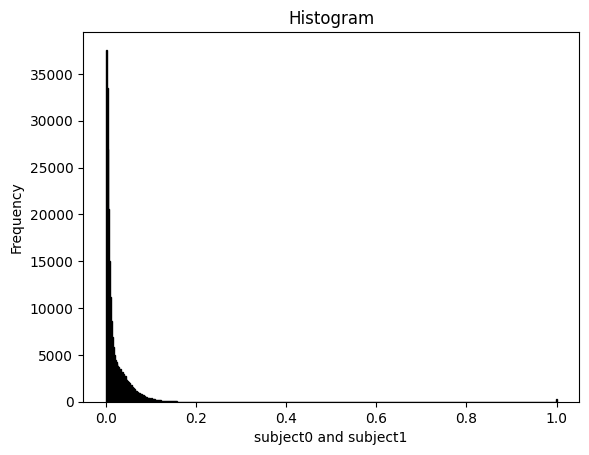

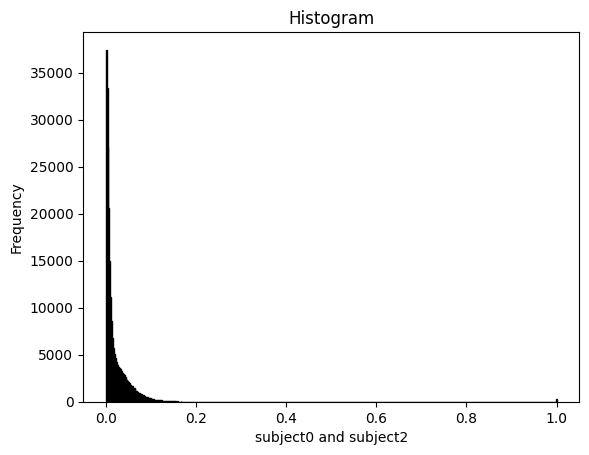

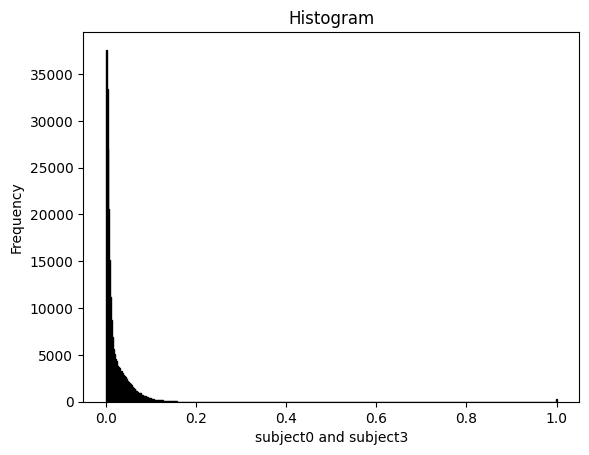

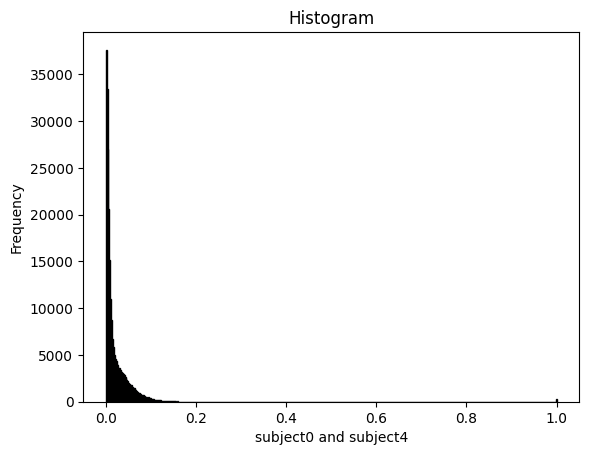

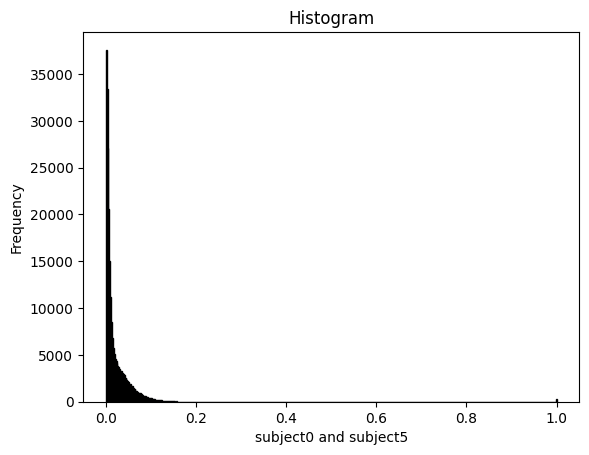

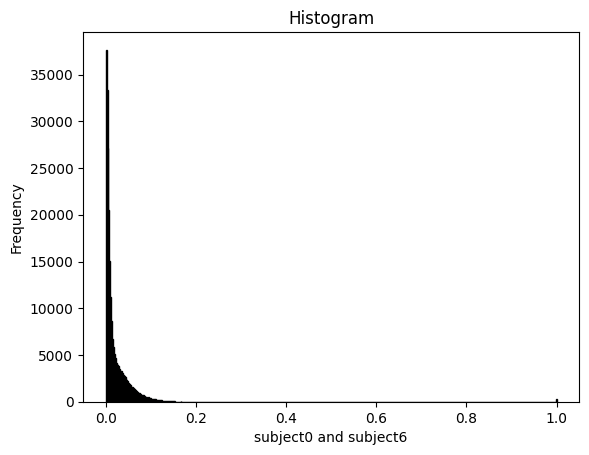

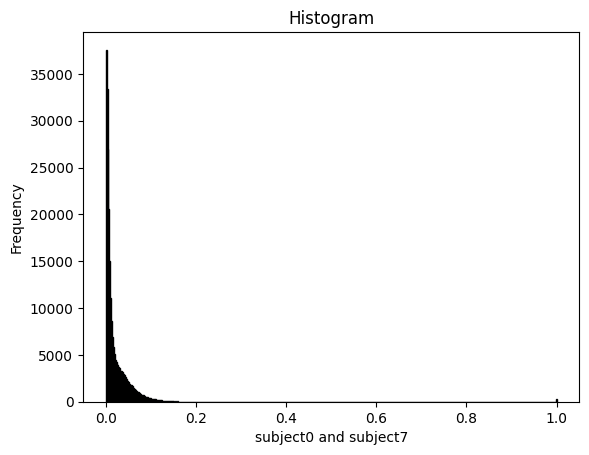

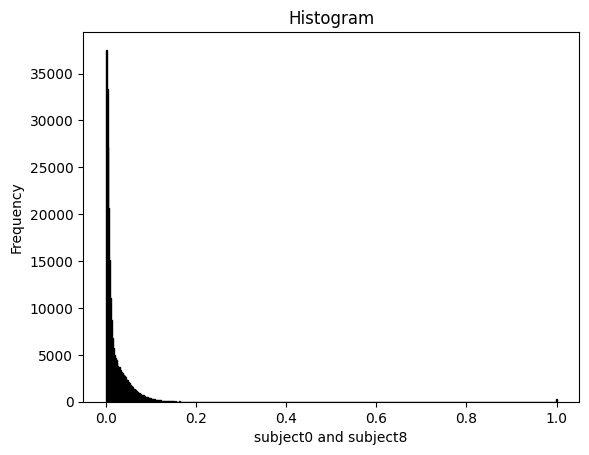

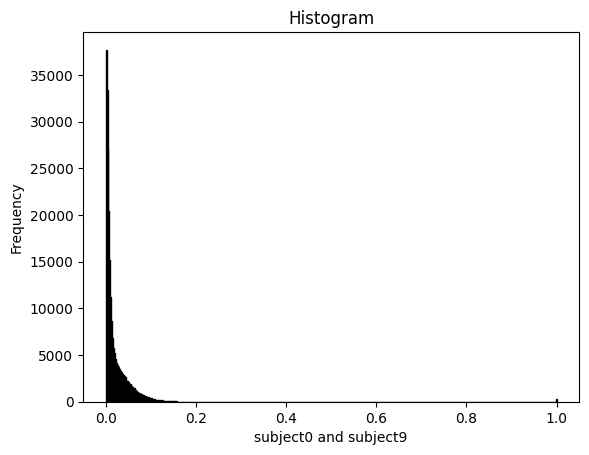

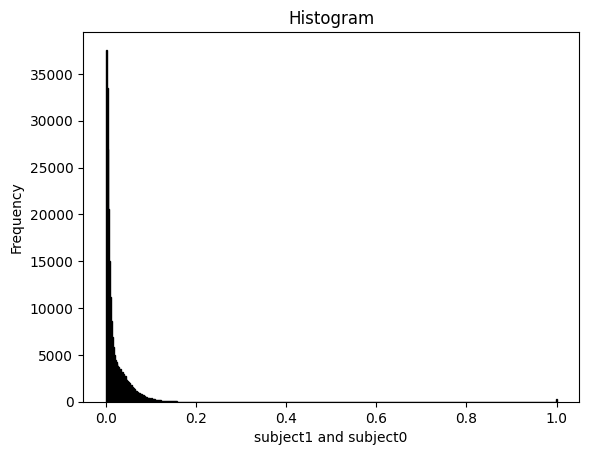

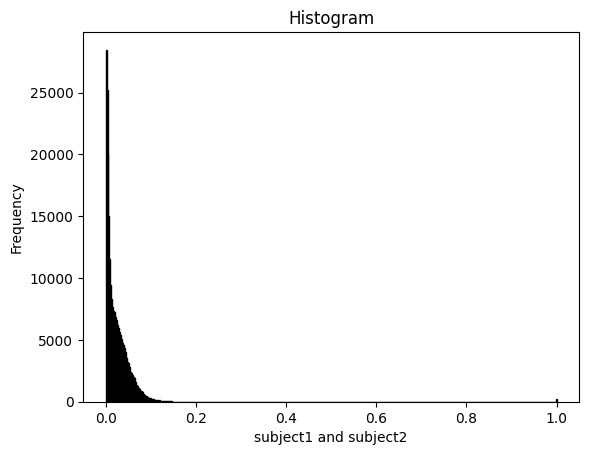

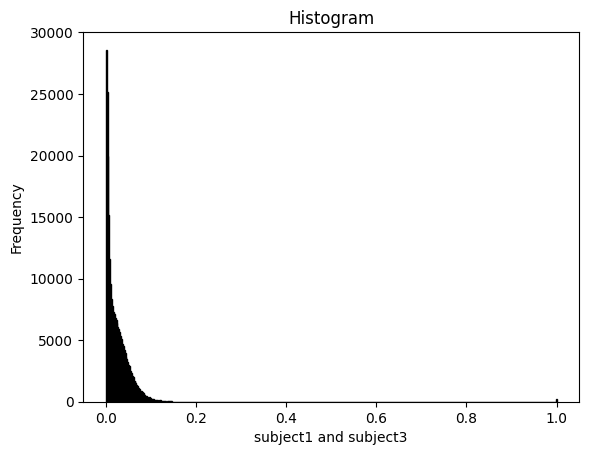

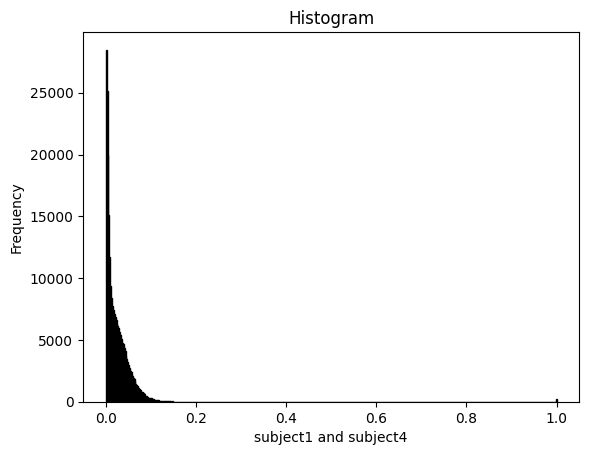

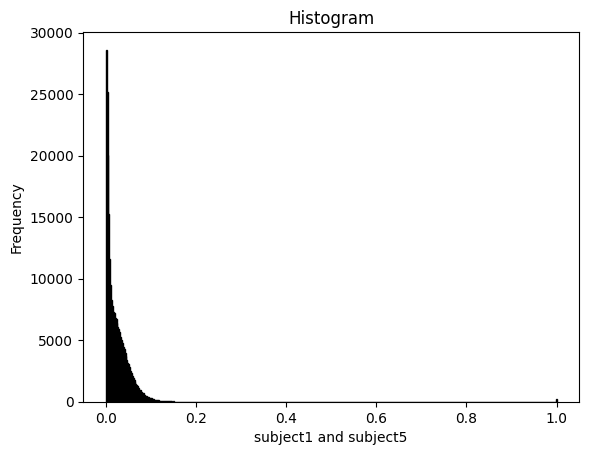

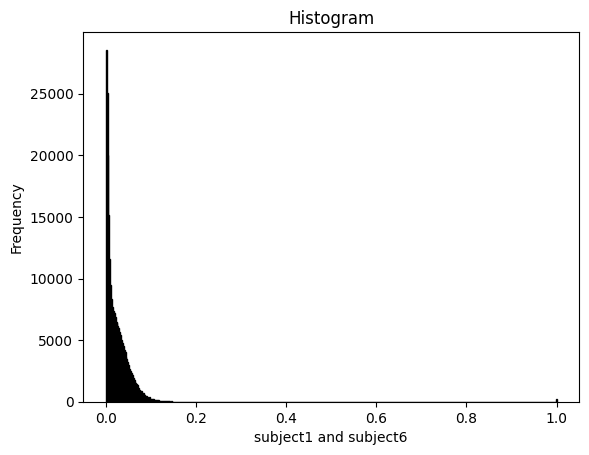

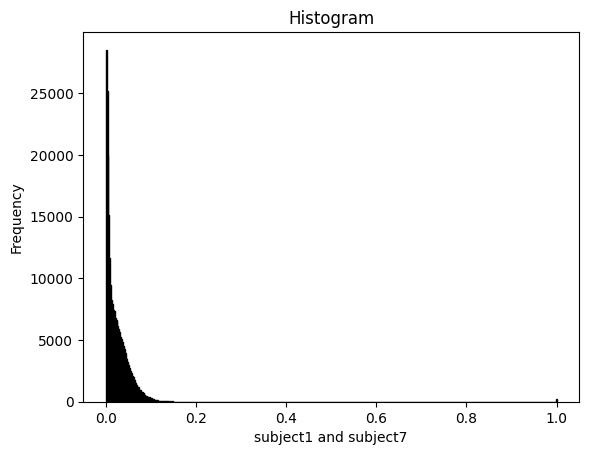

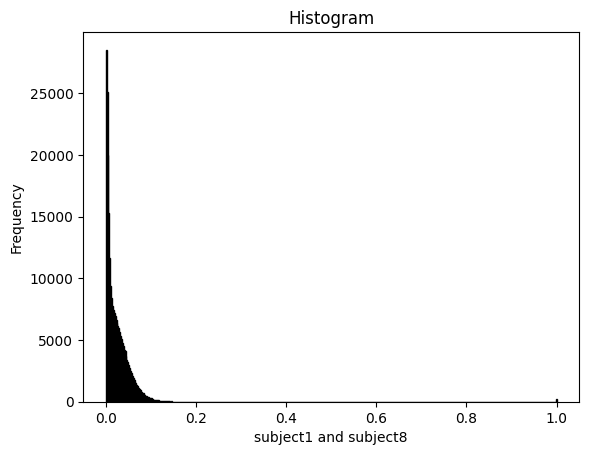

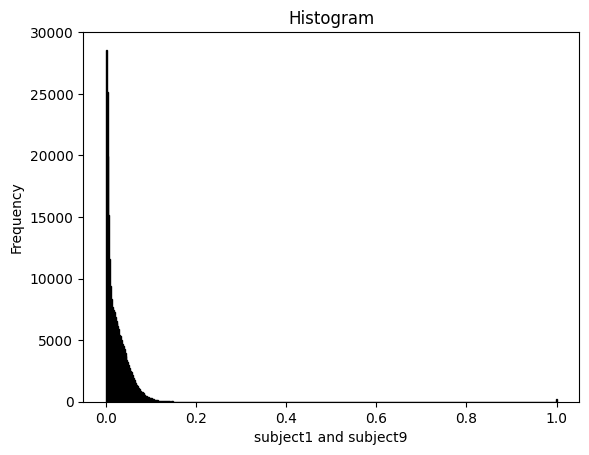

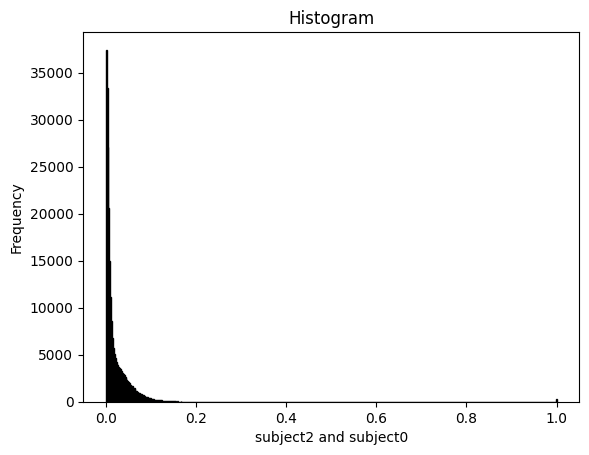

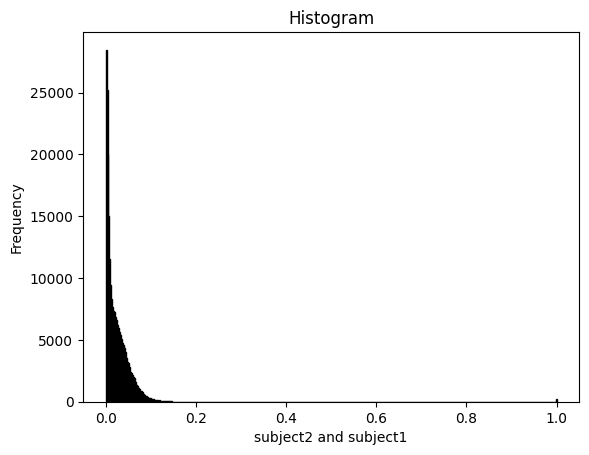

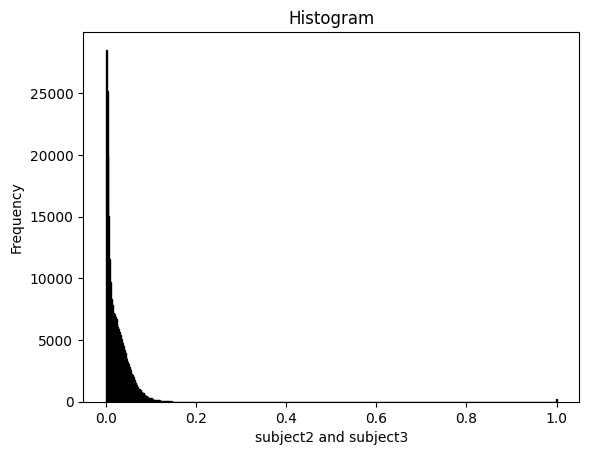

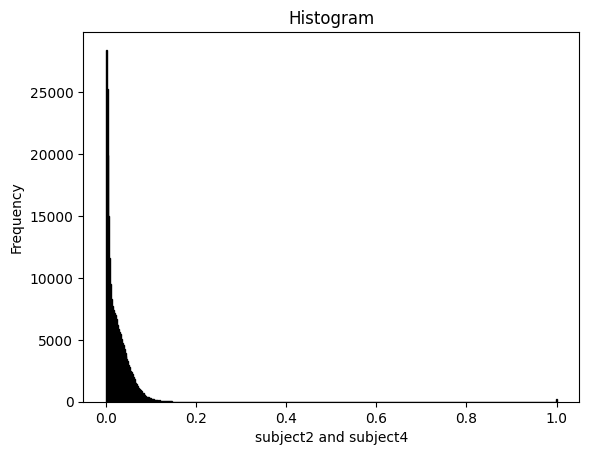

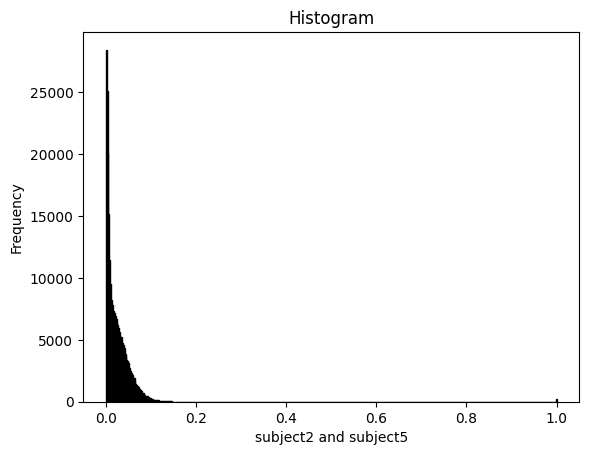

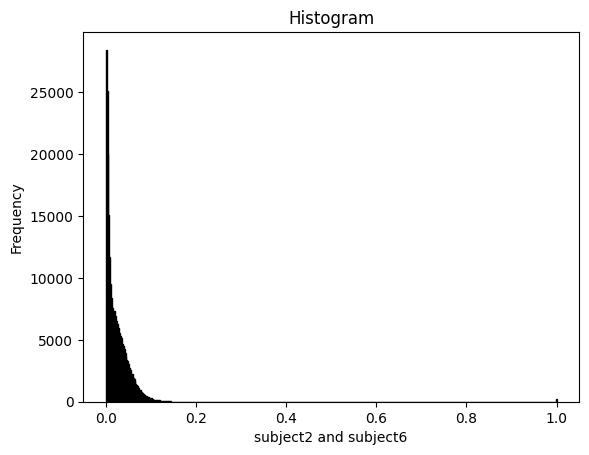

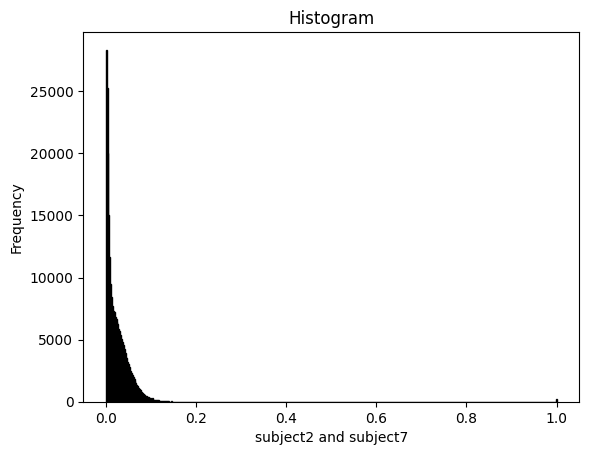

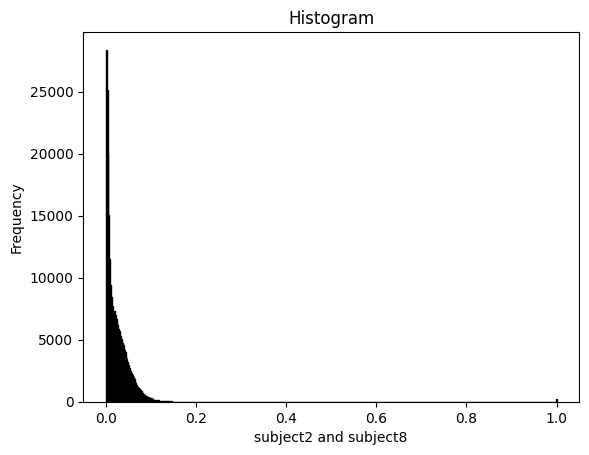

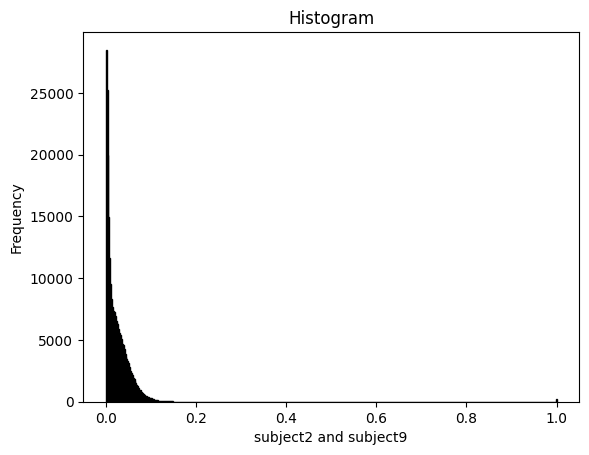

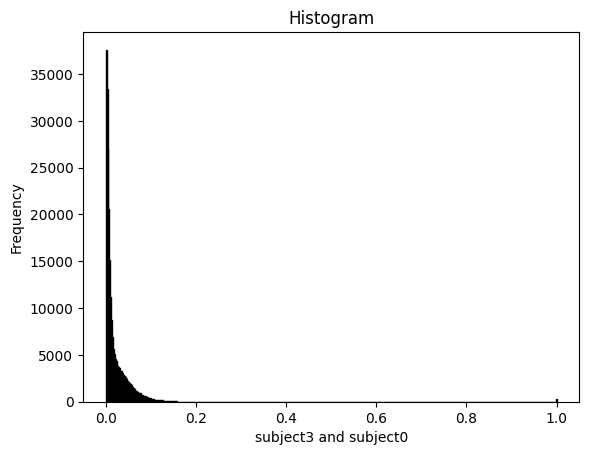

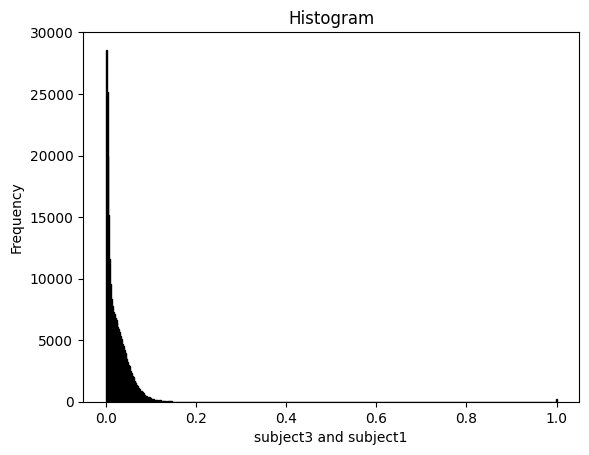

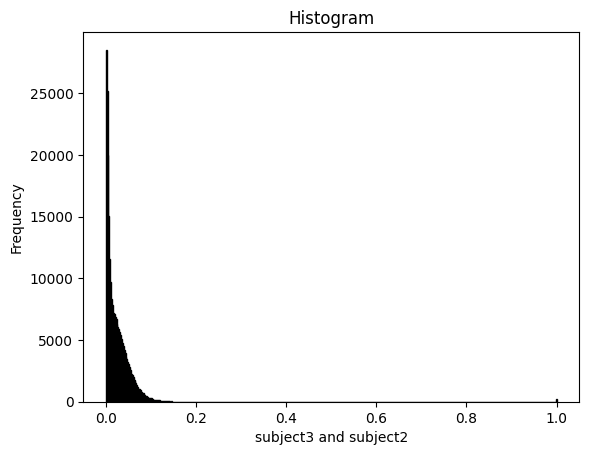

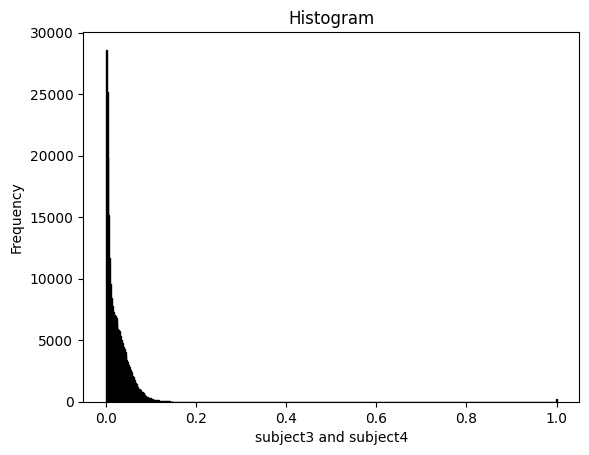

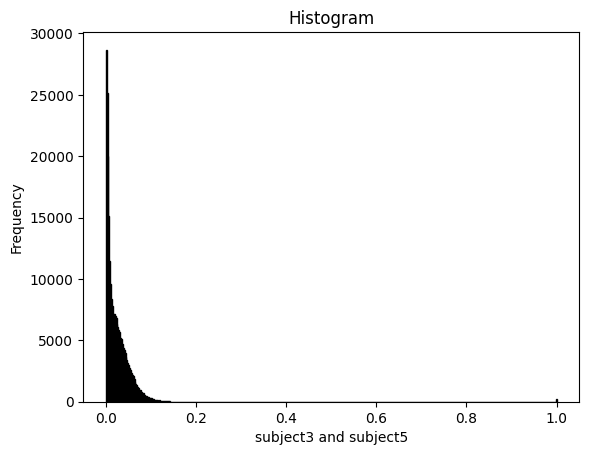

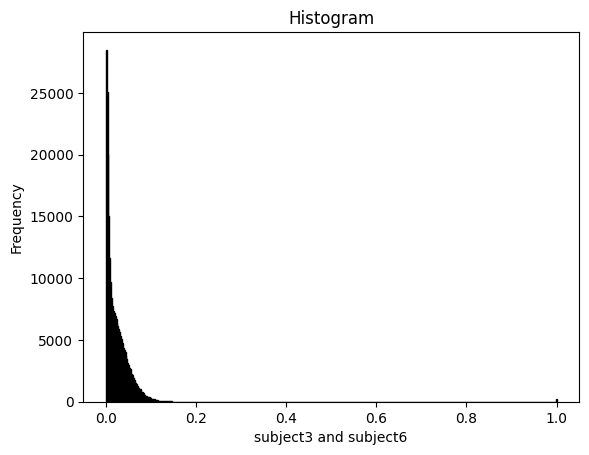

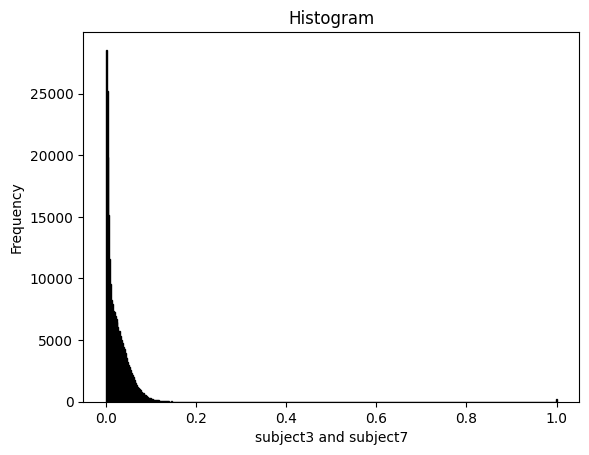

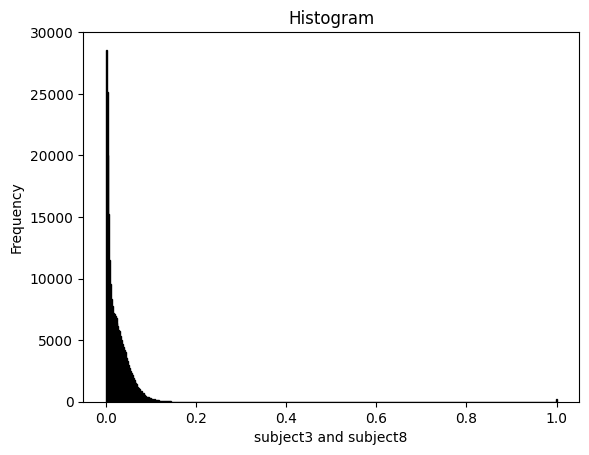

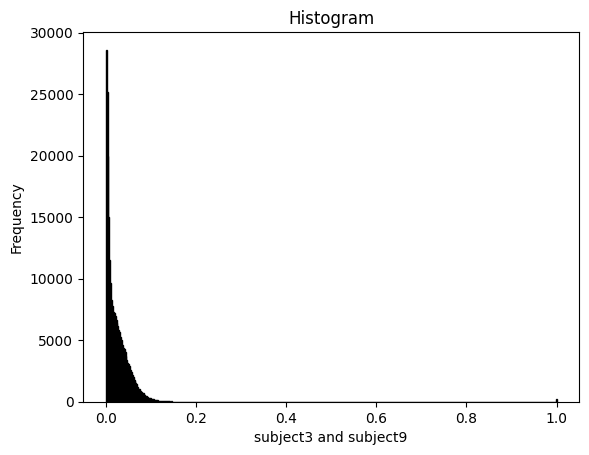

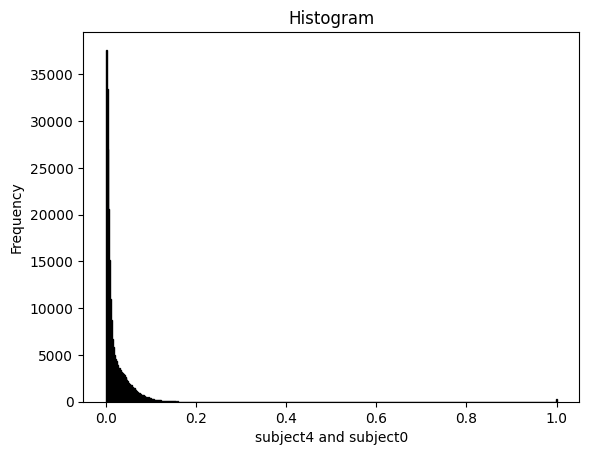

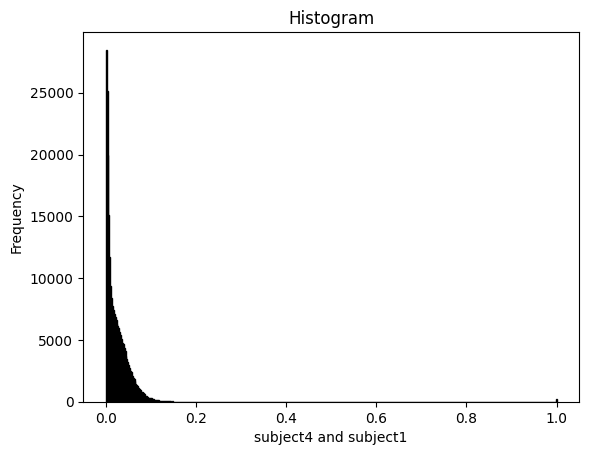

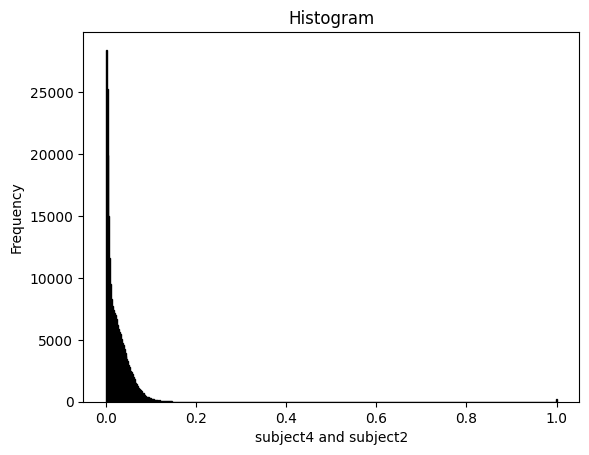

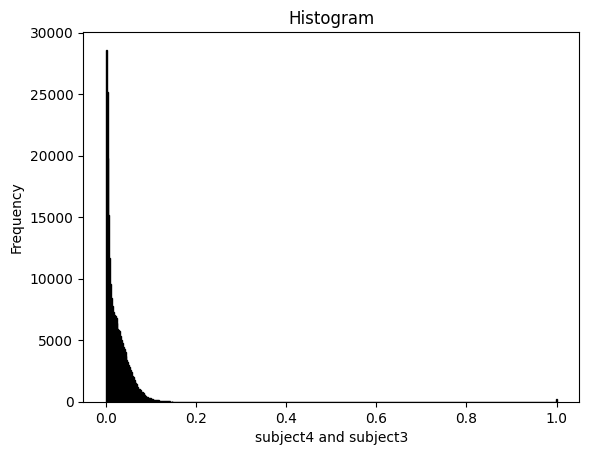

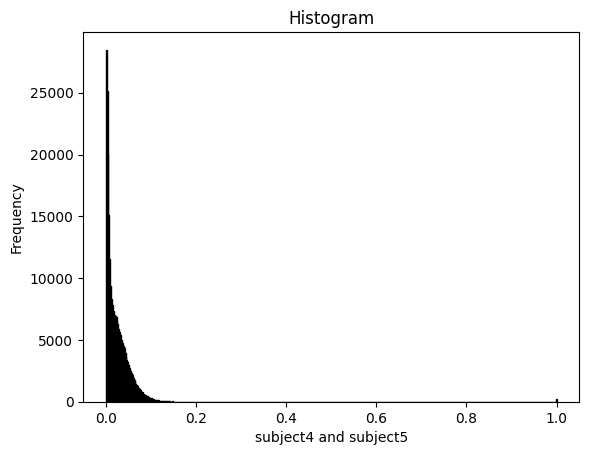

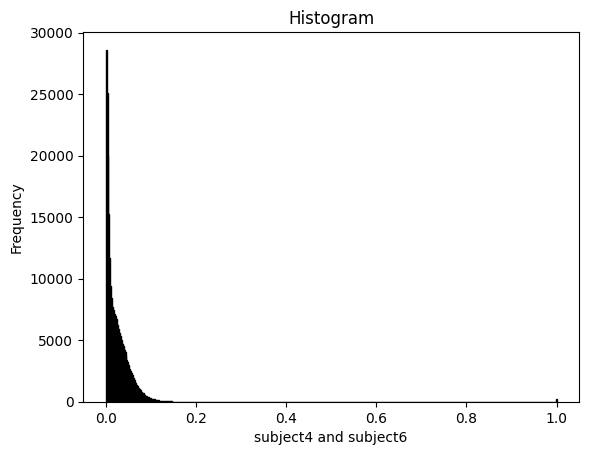

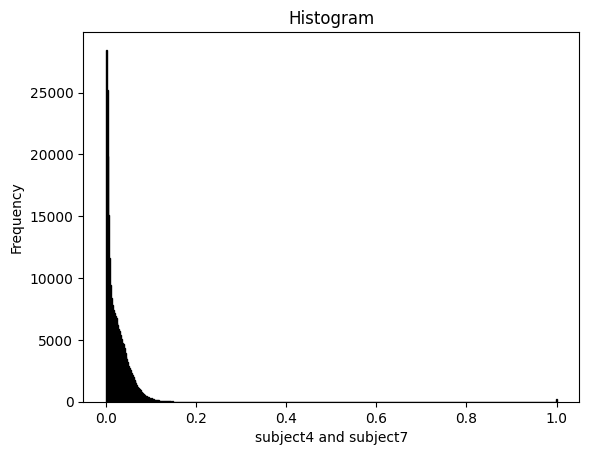

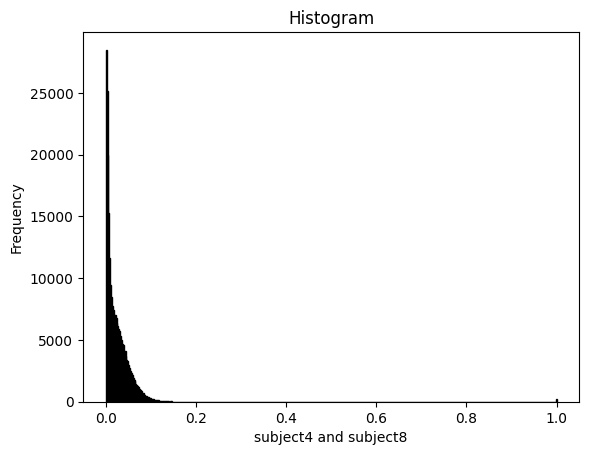

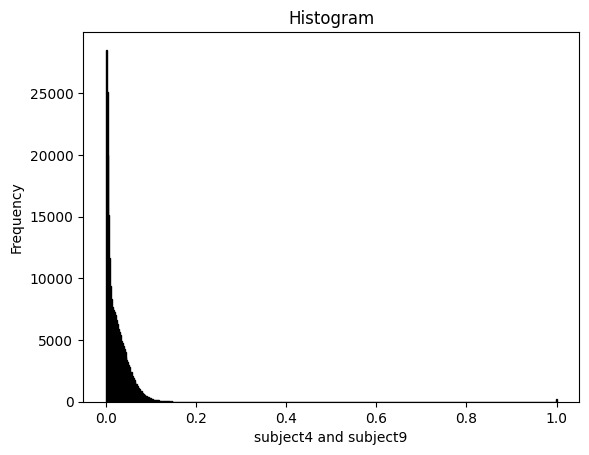

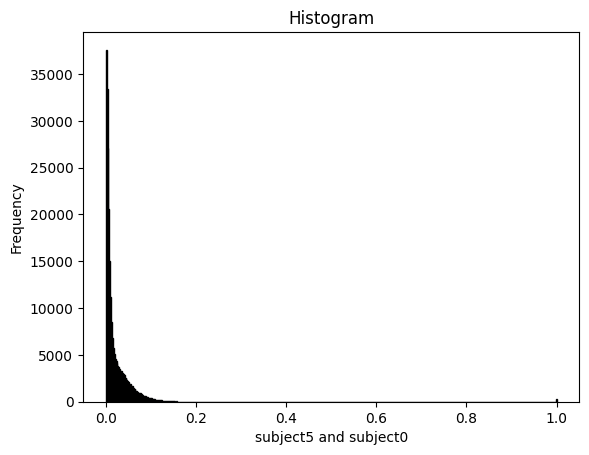

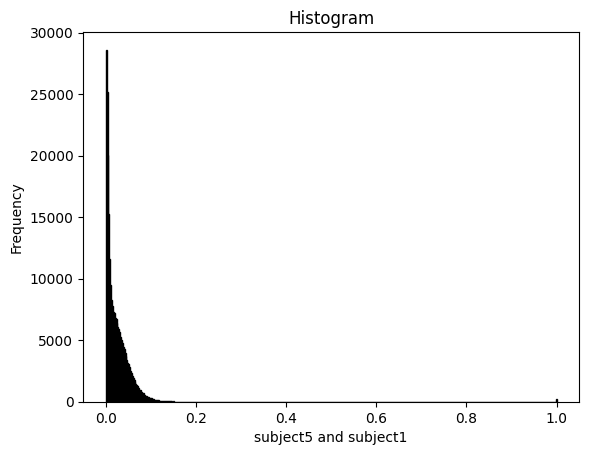

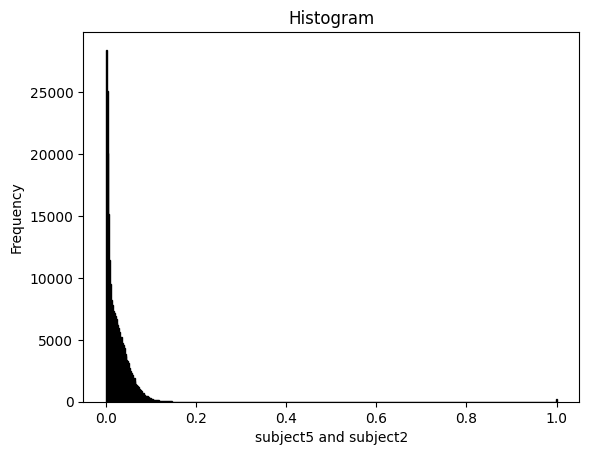

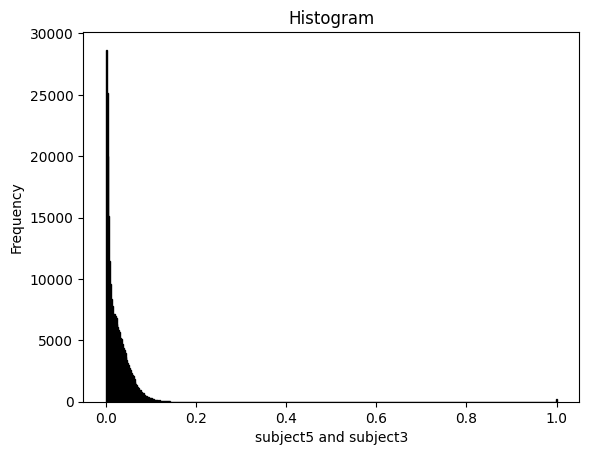

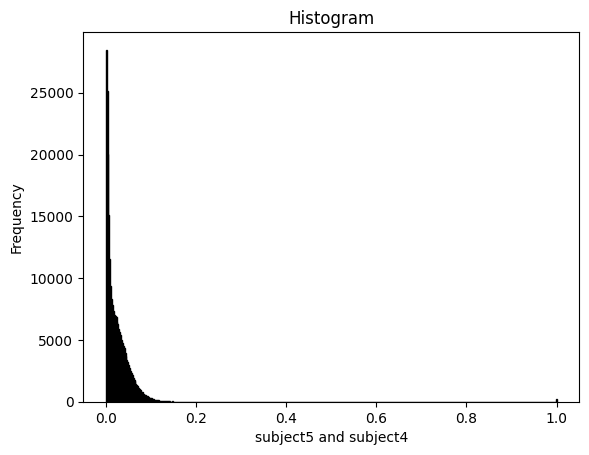

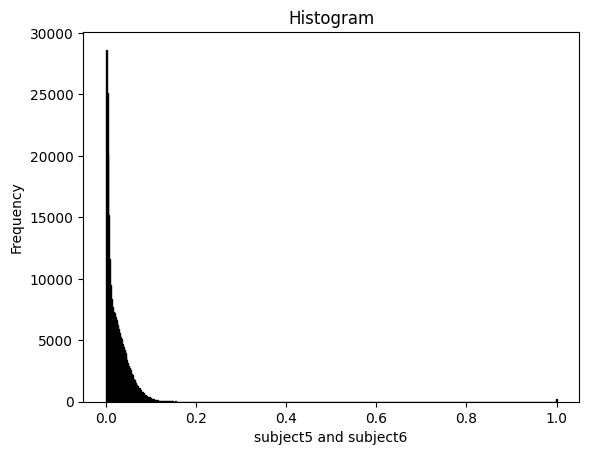

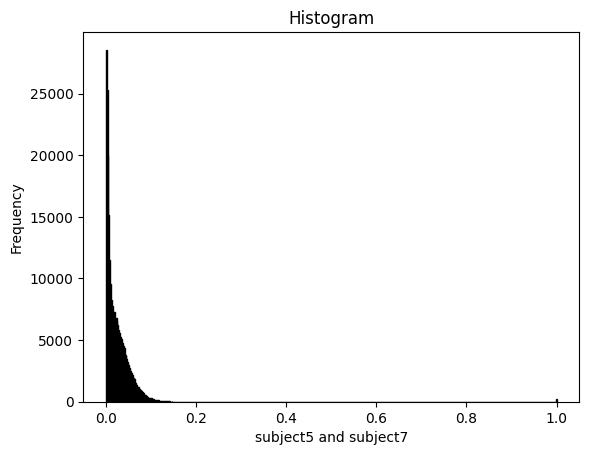

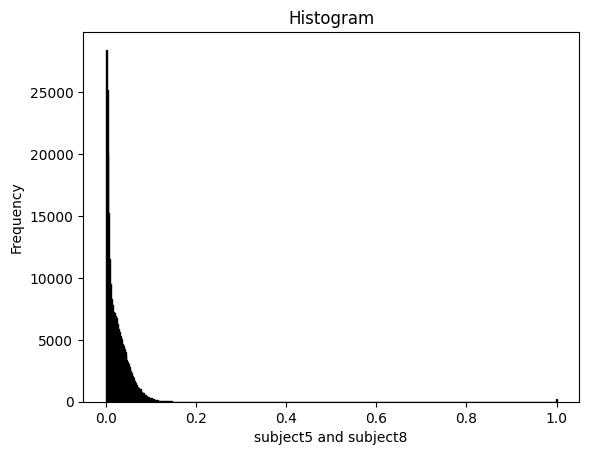

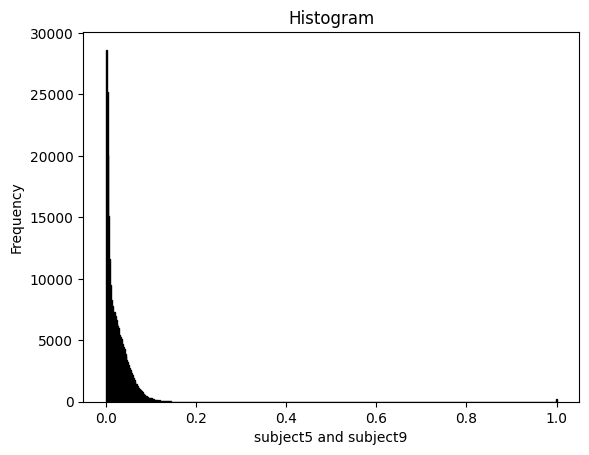

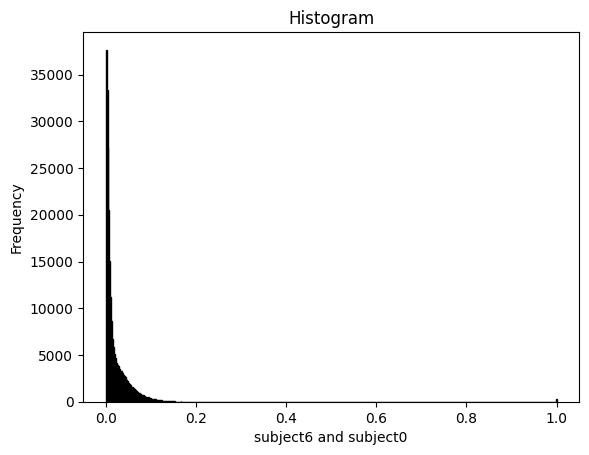

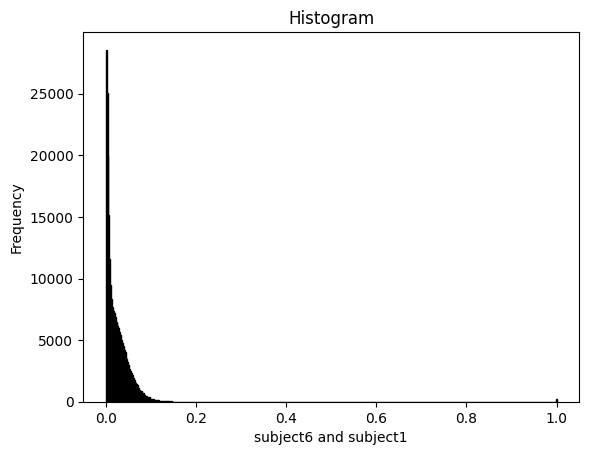

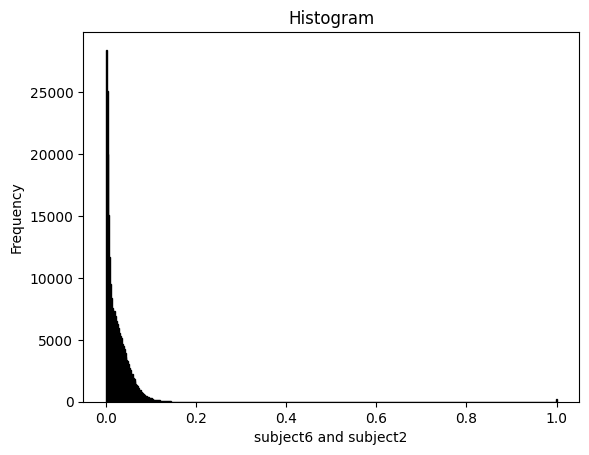

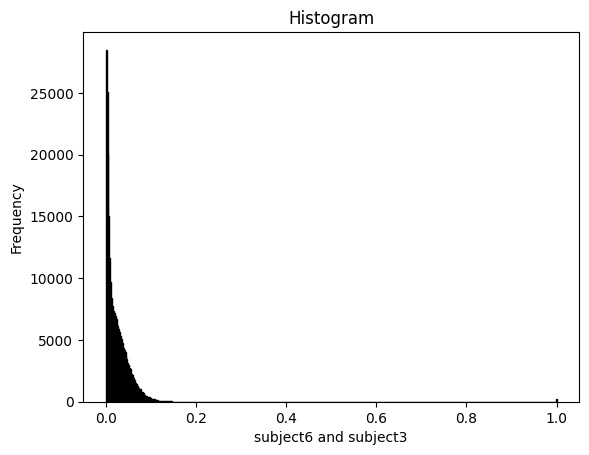

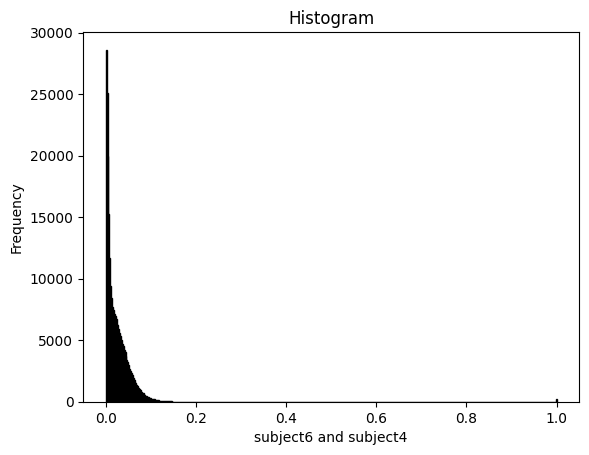

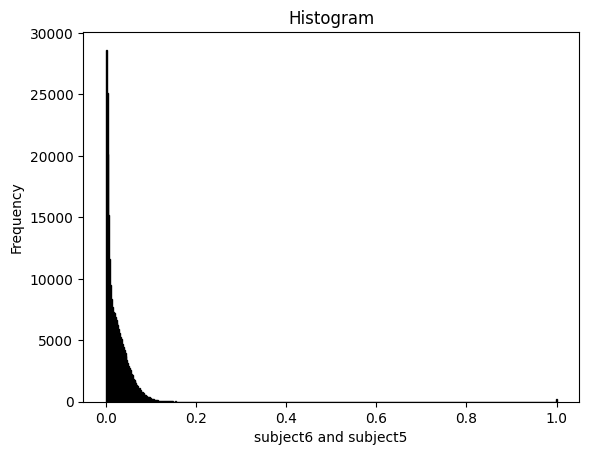

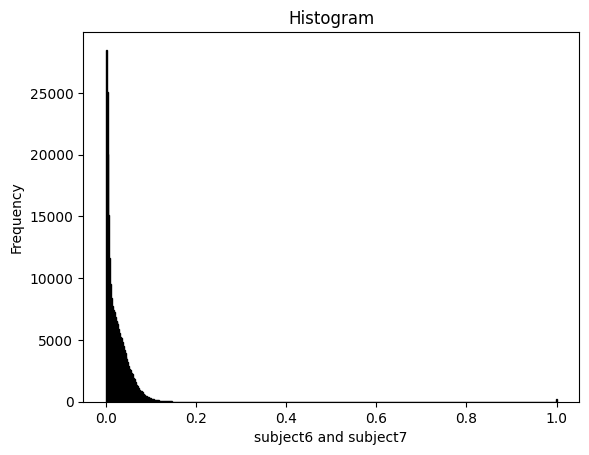

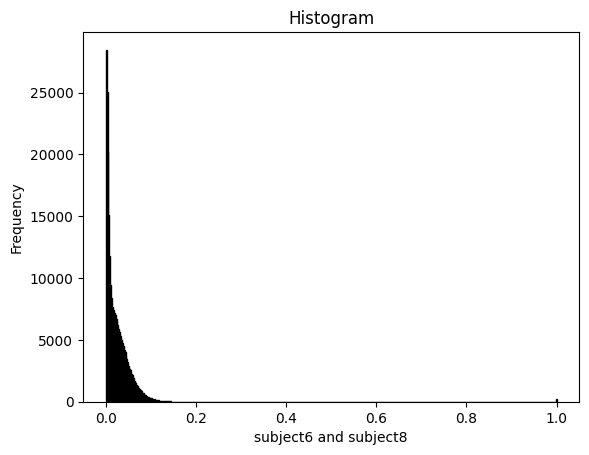

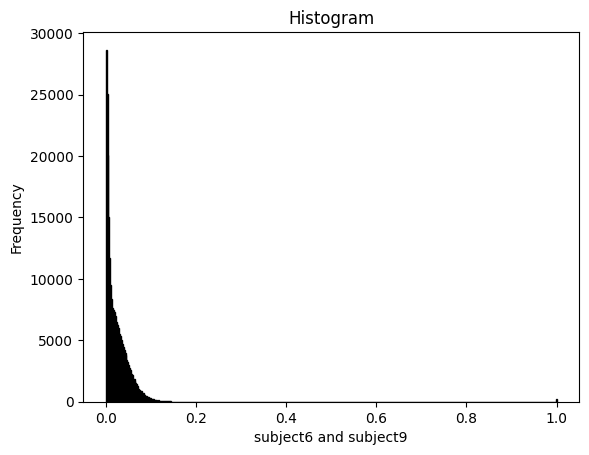

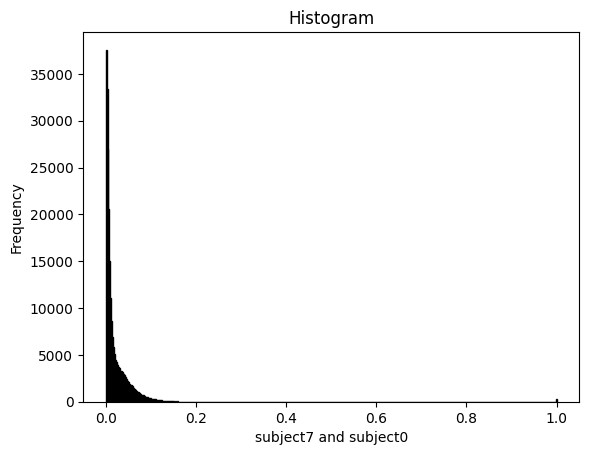

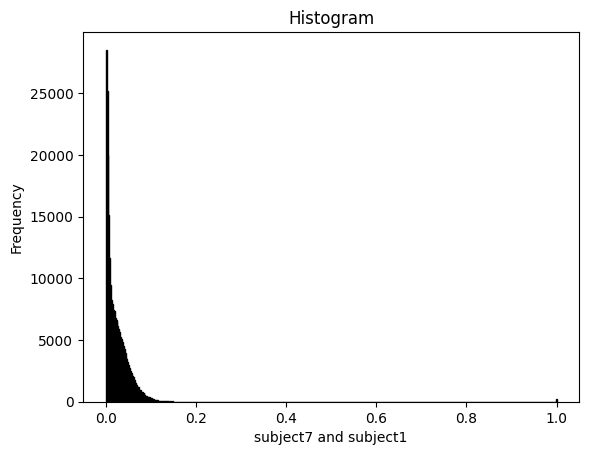

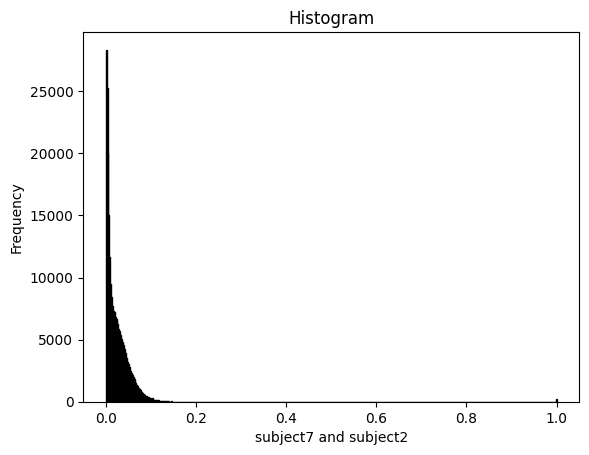

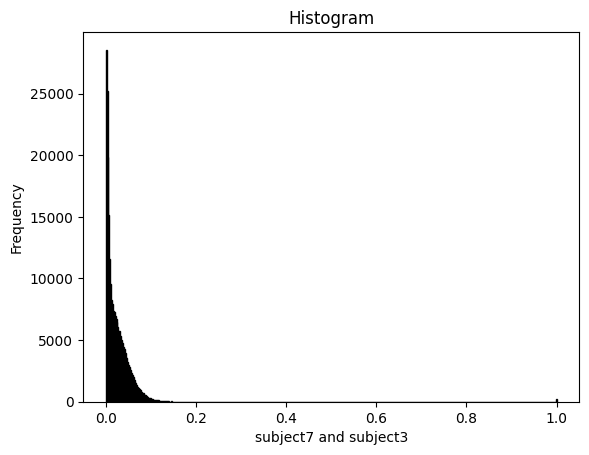

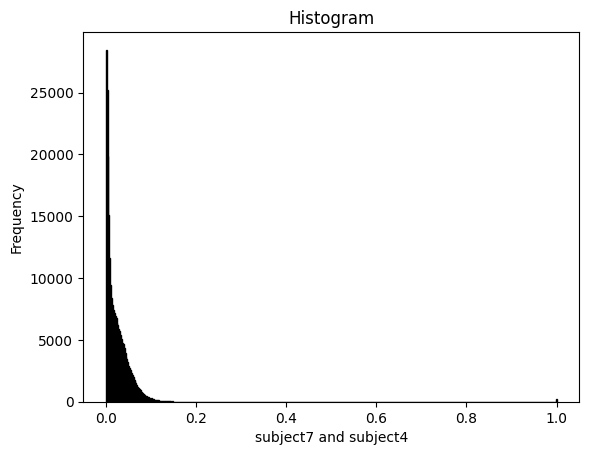

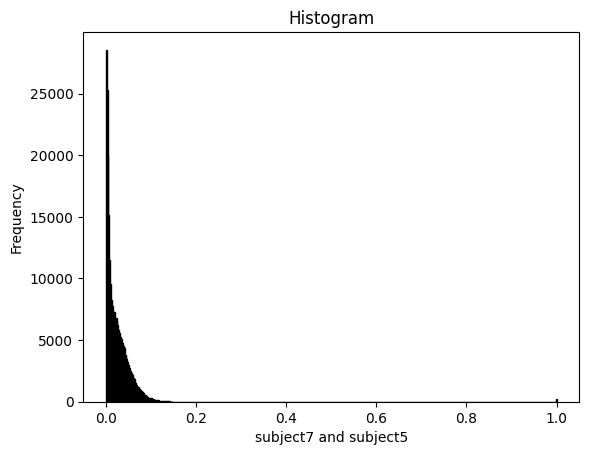

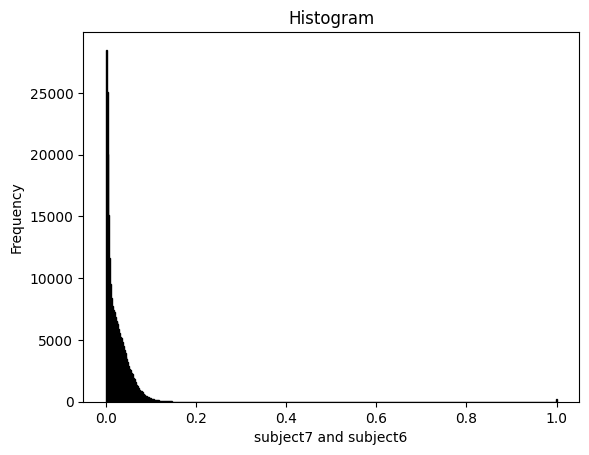

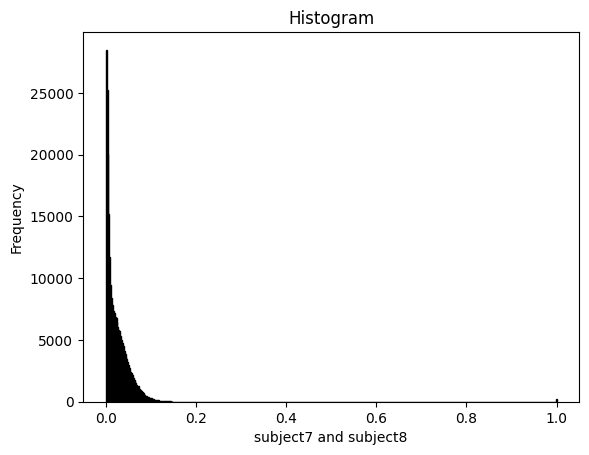

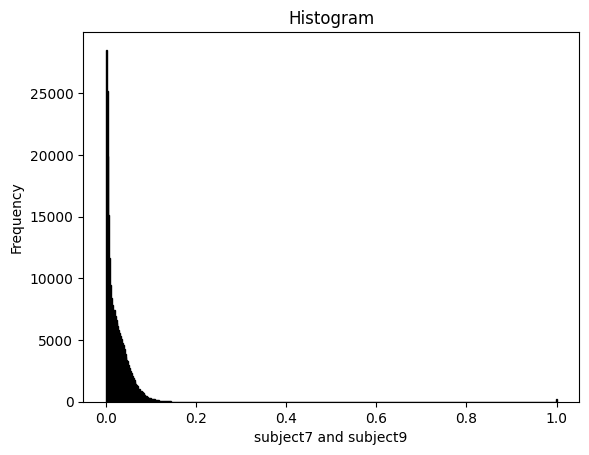

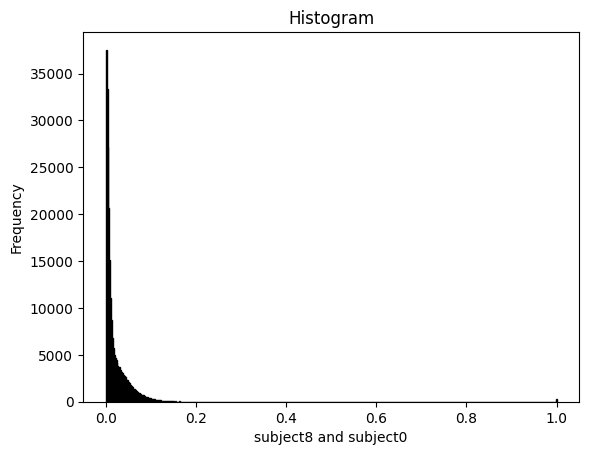

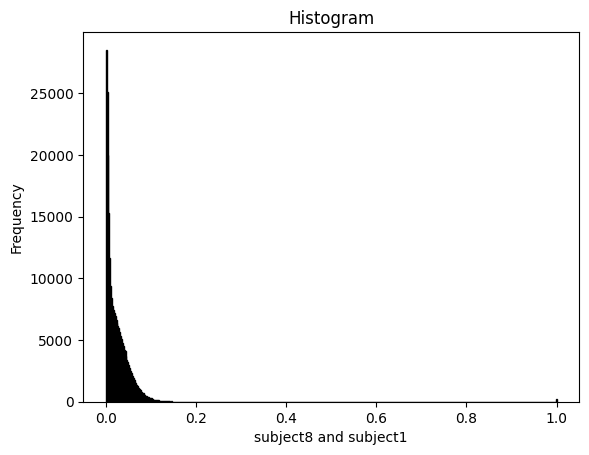

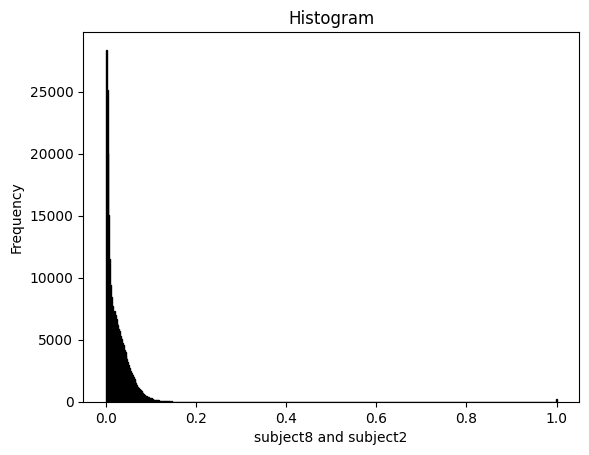

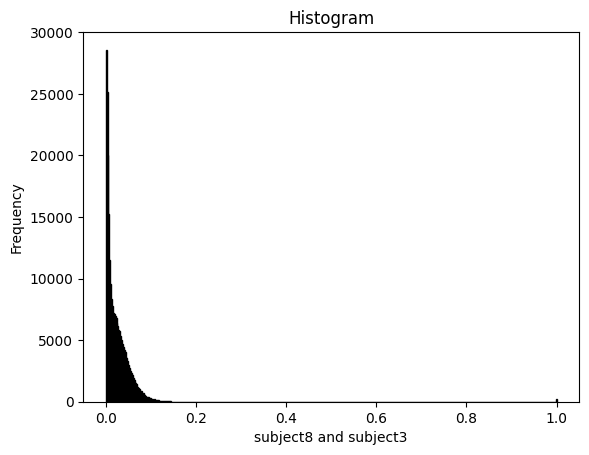

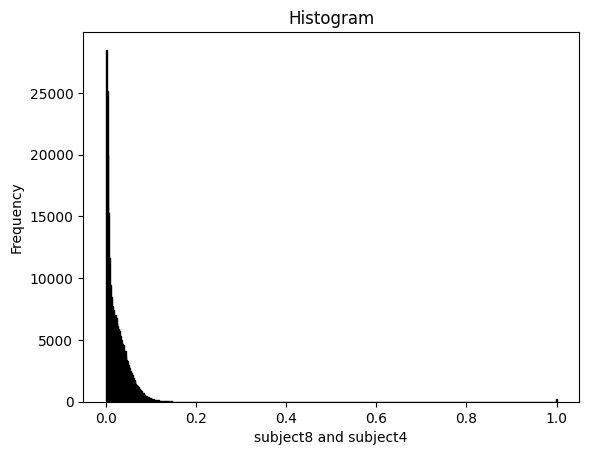

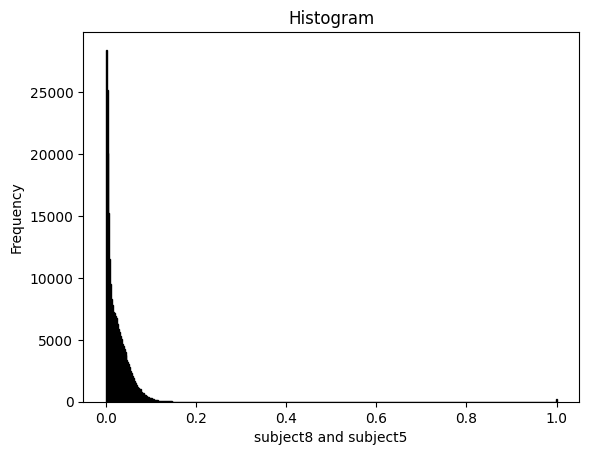

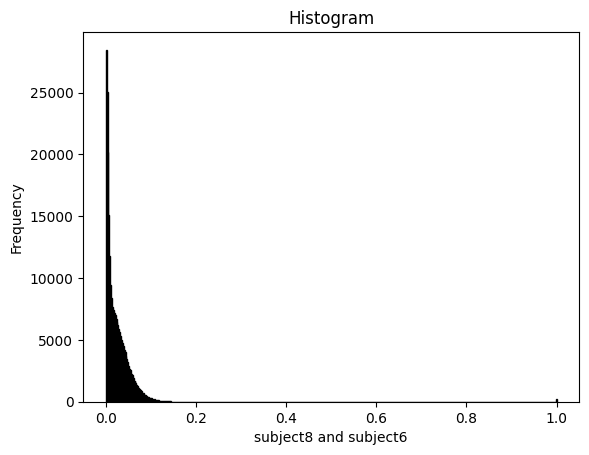

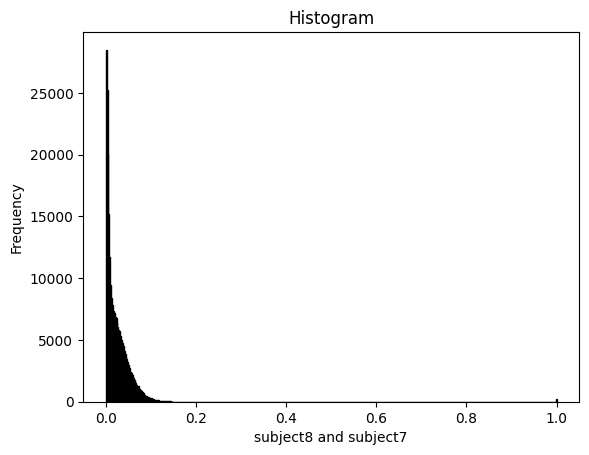

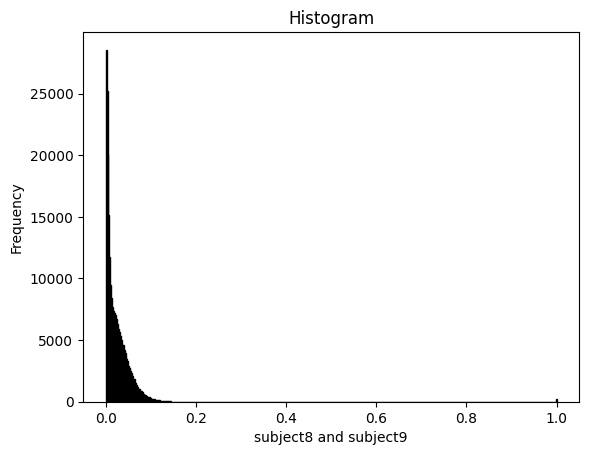

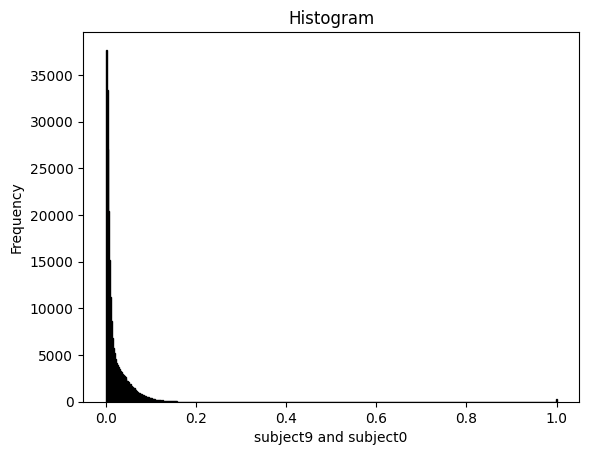

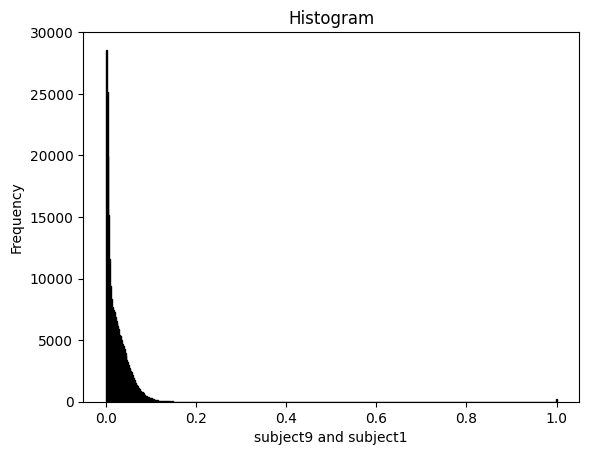

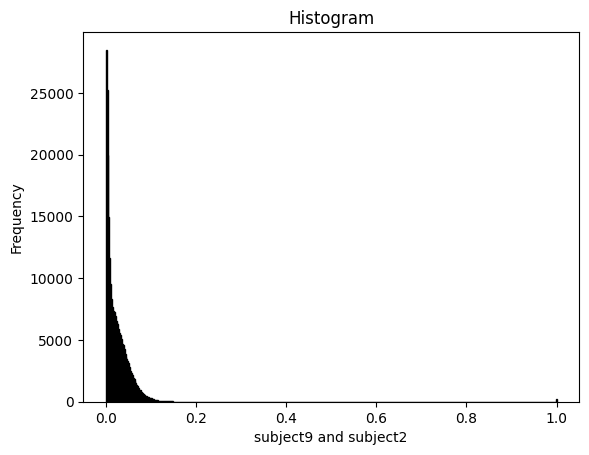

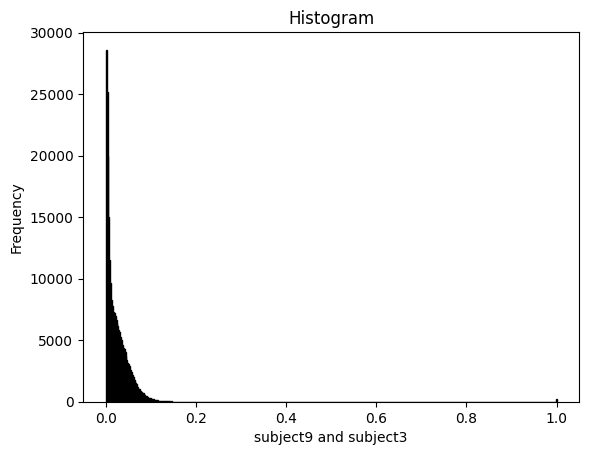

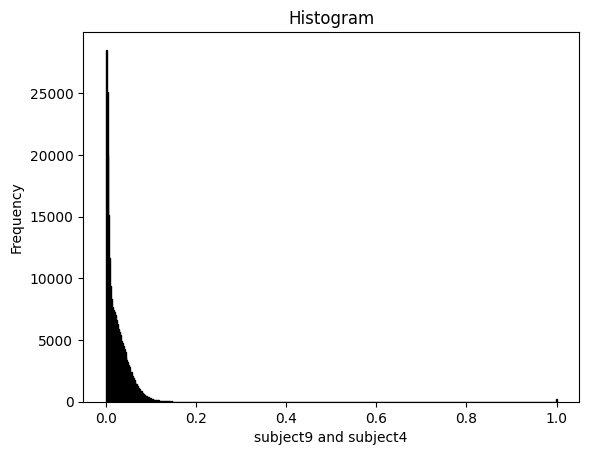

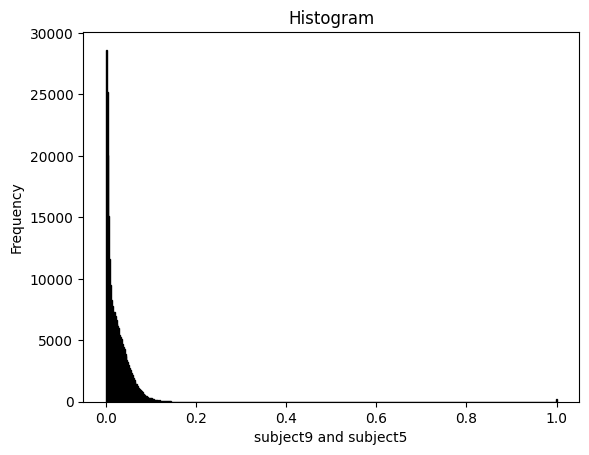

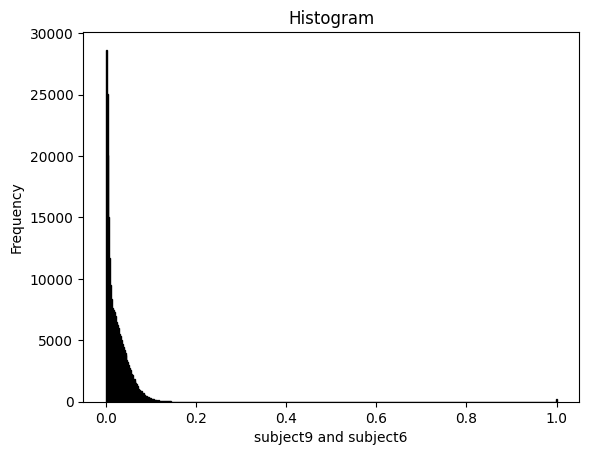

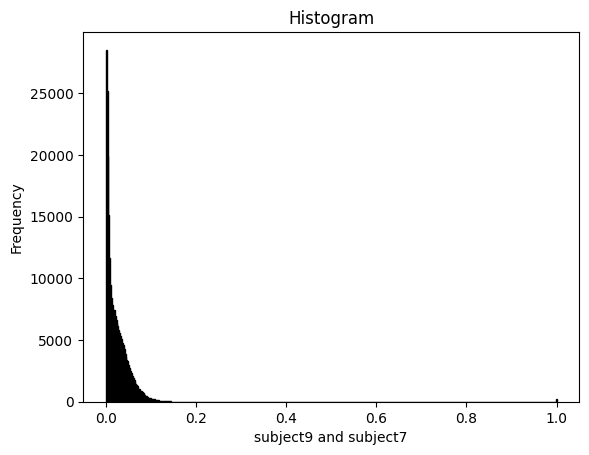

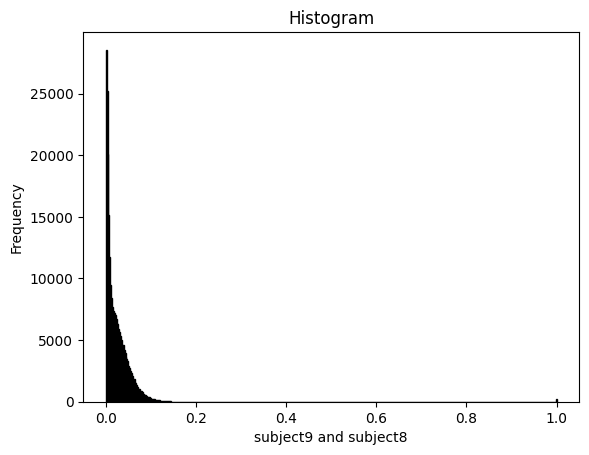

simimom2 : 0.0020652395675744414
Computation complete.
simitensor's shape:(500, 10, 10)
maxtensor's shape:(500, 10, 10)
simimom2's shape:()

*** Launching clustering computations ***
iterations: 2
Starting iteration 1, forming cluster 
1. 2. 3. 4. 5. 6. 7. 8. 9. 10. 11. 12. 13. 14. 15. 16. 17. 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53. 54. 55. 56. 57. 58. 59. 60. 61. 62. 63. 64. 65. 66. 67. 68. 69. 70. 71. 72. 73. 74. 75. 76. 77. 78. 79. 80. 81. 82. 83. 84. 85. 86. 87. 88. 89. 90. 91. 92. 93. 94. 95. 96. 97. 98. 99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111. 112. 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125. 126. 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139. 140. 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153. 154. 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167. 168. 169. 170. 171. 172. 173. 174. 17

array([[  0., 250.,   0., ..., 250.,   0., 250.],
       [  1., 251.,   1., ..., 251.,   1., 251.],
       [  2., 252.,   2., ..., 252.,   2., 252.],
       ...,
       [ 71., 321.,  71., ..., 321.,  71., 321.],
       [211., 461., 211., ..., 461., 211., 461.],
       [236., 486., 236., ..., 486., 236., 486.]])

In [ ]:
res_art=ISCTest(art_mixing_half,0.05,0.05,mixing=True)
res_art.clustering

## 多言語実験


*** ISCTest: ICA testing algorithm ***
Input parameters:
  Number of subjects: 3
  Number of vectors/components per subject: 300
  Data vector dimension: 6307
  False positive rate: 0.05
  False discovery rate: 0.05
Starting computation of similarities...
Basic Dimensions - Subjects: 3, PCA Dimensions: 300, Data Dimension: 6307
Removing means for testing independent components...
Computing similarities and storing max inter-subject similarities...


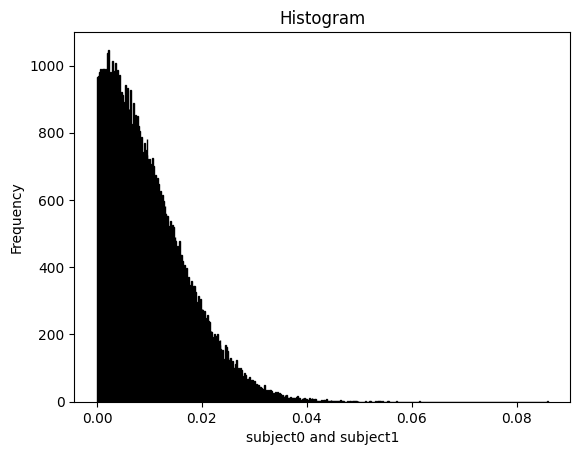

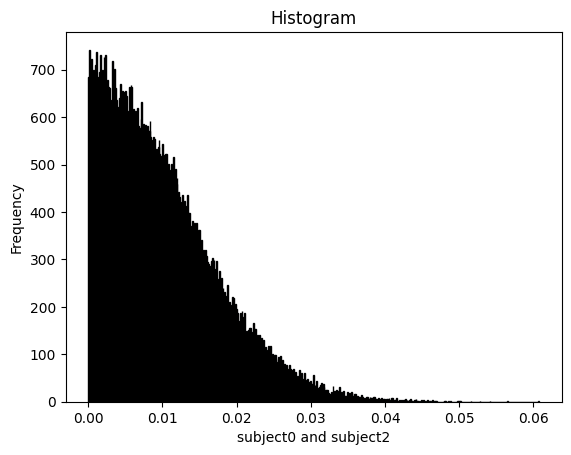

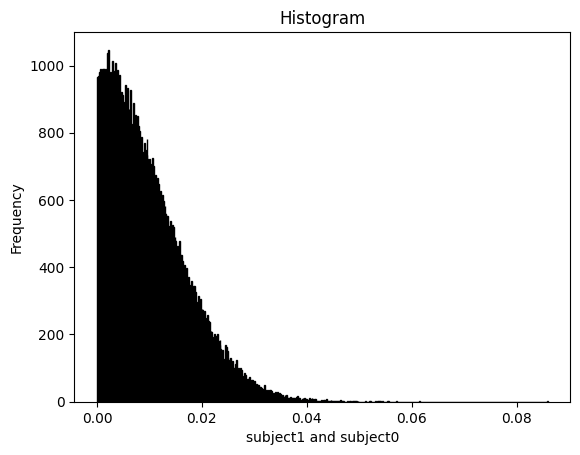

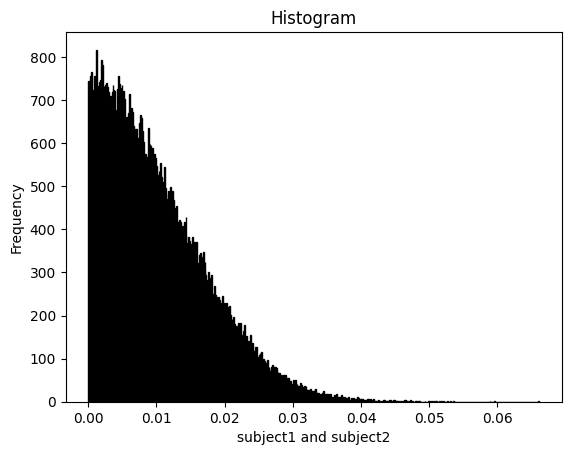

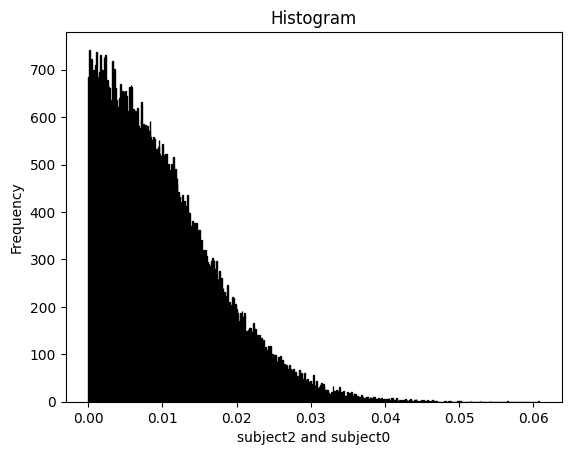

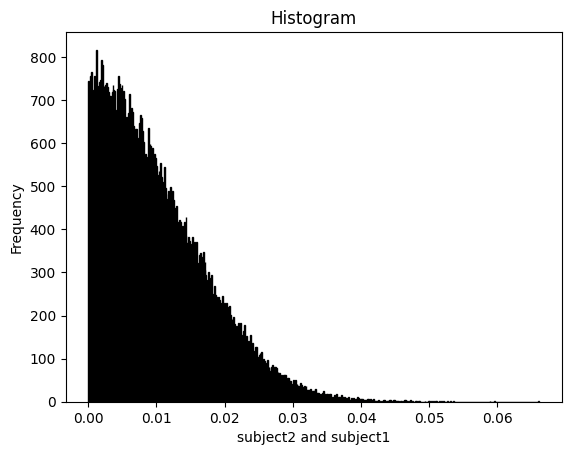

simimom2 : 0.0001590603188772095
Computation complete.
simitensor's shape:(300, 3, 3)
maxtensor's shape:(300, 3, 3)
simimom2's shape:()

*** Launching clustering computations ***
iterations: 1
Starting iteration, forming cluster 
1. pval > alphacorr_FD Could not find any sufficiently connected components!
2. pval > alphacorr_FD Could not find any sufficiently connected components!
3. Done.
*** Clustering computation finished ***

Number of clusters found: 2
Number of vectors clustered: 4 (0.44% of all vectors)
Average number of vectors per cluster: 2.00
Internal parameters:
  Average estimated effective dimension: 6286.92
  Corrected alpha value for FDR: 5.000000e-02
  Smallest similarity considered significant by FDR: 0.0661
  Corrected alpha value for FPR: 5.555556e-05
  Smallest similarity considered significant by FPR: 0.0661
Exiting testing algorithm successfully.


In [ ]:
test=ISCTest(random_components_arrays,0.01,0.01,mixing=False)

In [ ]:
np.sort(test.similarities[0].flatten())[int(90000*0.95)]

0.024619732643923843

In [ ]:
np.sort(test.similarities[1].flatten())[int(90000*0.95)]

0.024686351582355336


*** ISCTest: ICA testing algorithm ***
Input parameters:
  Number of subjects: 3
  Number of vectors/components per subject: 300
  Data vector dimension: 300
  False positive rate: 0.01
  False discovery rate: 0.01
Starting computation of similarities...
Basic Dimensions - Subjects: 3, PCA Dimensions: 300, Data Dimension: 300

Computing stabilized inverse of covariance matrix:
  Concatenating data
  Calling numpy SVD function on matrix of size 300 x 900
Computing similarities and storing max inter-subject similarities...


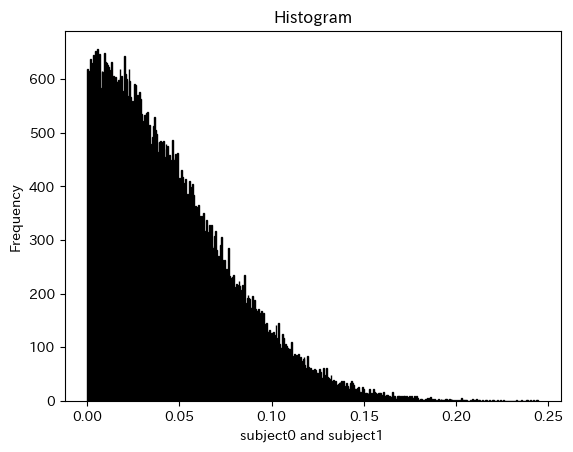

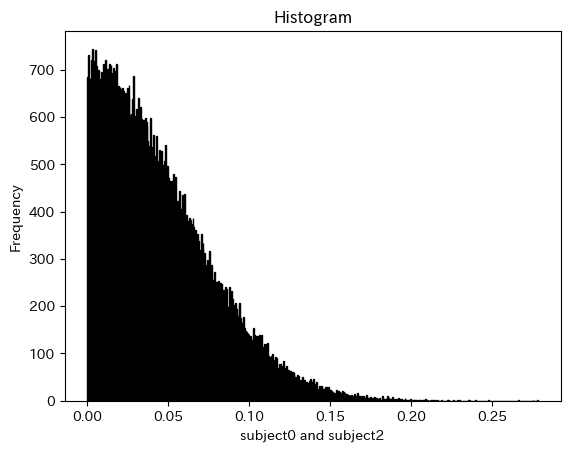

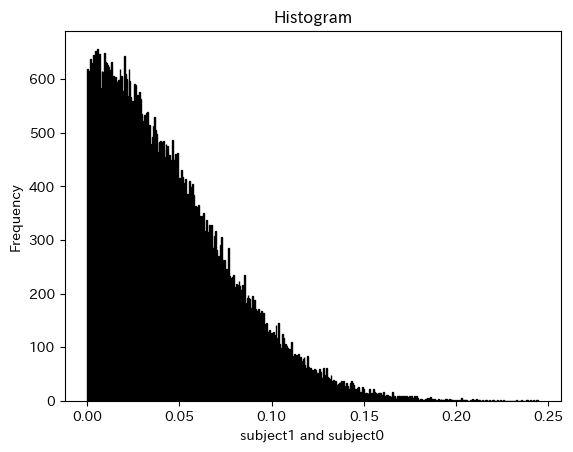

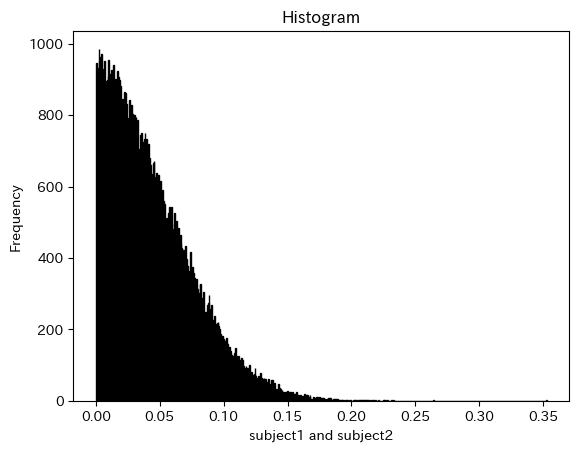

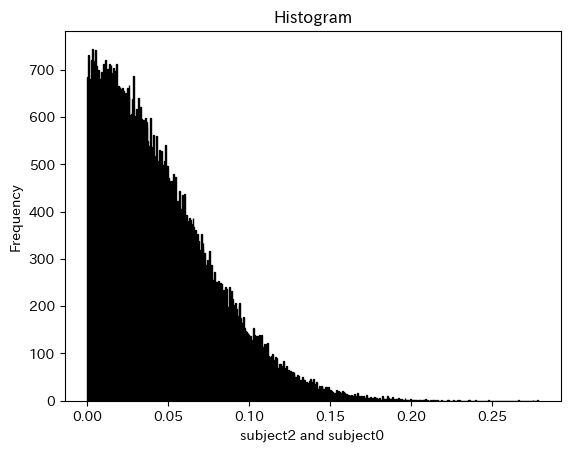

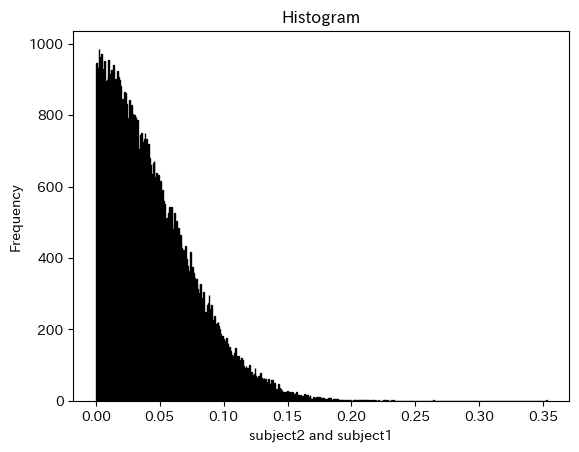

simimom2 : 0.003154202523736604
Computation complete.
simitensor's shape:(300, 3, 3)
maxtensor's shape:(300, 3, 3)
simimom2's shape:()

*** Launching clustering computations ***
iterations: 2
Starting iteration 1, forming cluster 
1. pval > alphacorr_FD Could not find any sufficiently connected components!
2. Done.
Number of clusters found in initial iteration: 1
Number of vectors clustered in initial iteration: 2 (0.22% of all vectors)
Starting iteration 2, forming cluster 
1. pval > alphacorr_FD Could not find any sufficiently connected components!
2. Done.
*** Clustering computation finished ***

Number of clusters found: 1
Number of vectors clustered: 2 (0.22% of all vectors)
Average number of vectors per cluster: 2.00
Internal parameters:
  Average estimated effective dimension: 299.78
  Corrected alpha value for FDR: 1.000000e-02
  Smallest similarity considered significant by FDR: 0.3528
  Corrected alpha value for FPR: 1.111111e-05
  Smallest similarity considered significant b

array([[ -1., 141., 133.]])

In [ ]:
res0=ISCTest(mixing_arrays,0.01,0.01,mixing=True)
res0.clustering


*** ISCTest: ICA testing algorithm ***
Input parameters:
  Number of subjects: 3
  Number of vectors/components per subject: 300
  Data vector dimension: 300
  False positive rate: 0.01
  False discovery rate: 0.01
Starting computation of similarities...
Basic Dimensions - Subjects: 3, PCA Dimensions: 300, Data Dimension: 300

Computing stabilized inverse of covariance matrix:
  Concatenating data
  Calling numpy SVD function on matrix of size 300 x 900
Computing similarities and storing max inter-subject similarities...


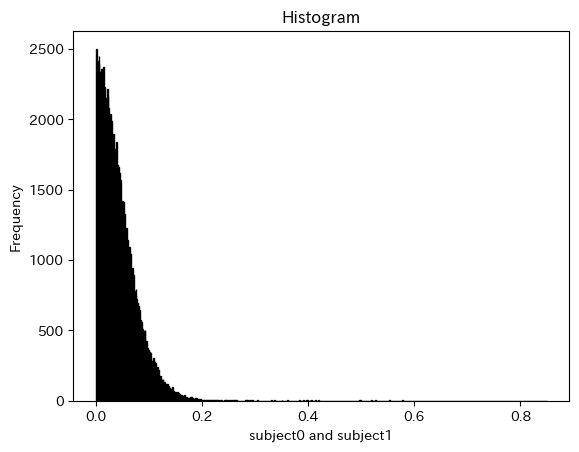

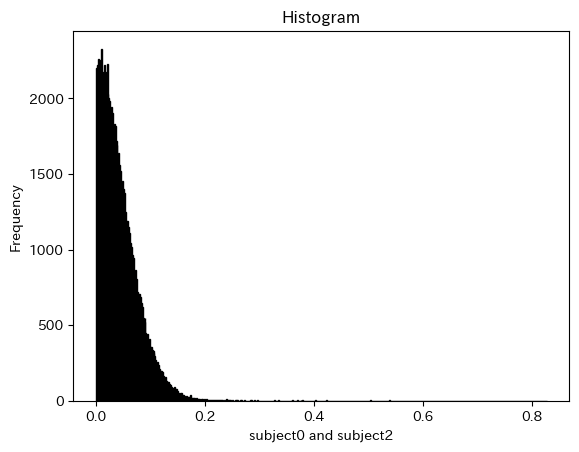

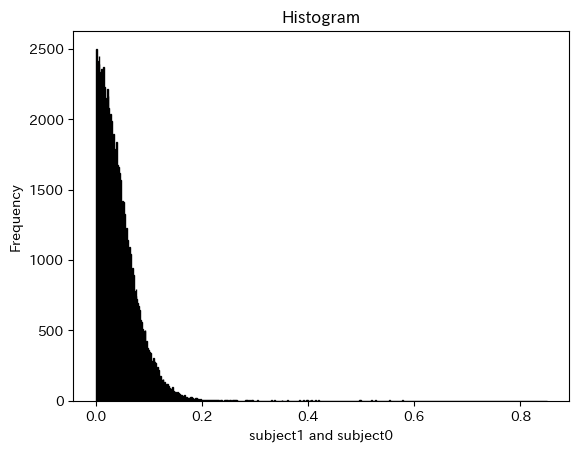

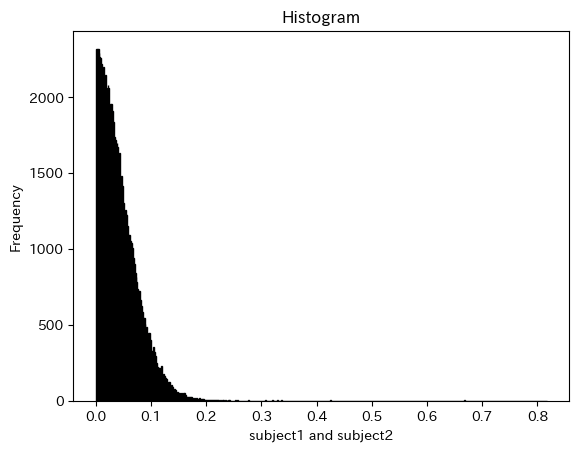

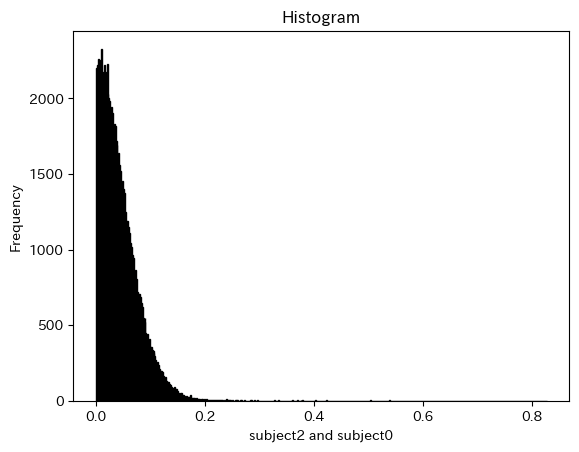

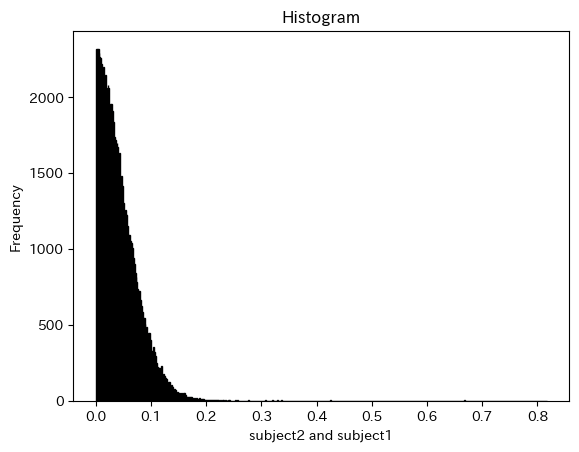

simimom2 : 0.0032214300849193155
Computation complete.
simitensor's shape:(300, 3, 3)
maxtensor's shape:(300, 3, 3)
simimom2's shape:()

*** Launching clustering computations ***
iterations: 2
Starting iteration 1, forming cluster 
1. 2. 3. 4. 5. 6. 7. 8. 9. 10. 11. 12. 13. 14. 15. 16. 17. 18. 19. 20. 21. 22. 23. 24. 25. pval > alphacorr_FD Could not find any sufficiently connected components!
26. 27. 28. 29. 30. 31. pval > alphacorr_FD Could not find any sufficiently connected components!
32. 33. 34. 35. 36. pval > alphacorr_FD Could not find any sufficiently connected components!
37. 38. 39. 40. 41. pval > alphacorr_FD Could not find any sufficiently connected components!
42. 43. 44. 45. 46. 47. 48. 49. pval > alphacorr_FD Could not find any sufficiently connected components!
50. 51. 52. 53. 54. 55. pval > alphacorr_FD Could not find any sufficiently connected components!
56. 57. 58. 59. pval > alphacorr_FD Could not find any sufficiently connected components!
60. 61. pval > alphacor

array([[ 47.,  64.,   2.],
       [212.,  71.,   3.],
       [262., 280.,   5.],
       [  7., 111.,  20.],
       [ 35.,  11.,  35.],
       [ 22.,  28., 106.],
       [ 28., 203., 183.],
       [208.,  30., 178.],
       [ 78., 256.,  38.],
       [ 39., 295., 104.],
       [ 72.,  50.,  42.],
       [276., 165.,  43.],
       [152.,  45., 146.],
       [ 52., 284., 239.],
       [ 58., 216., 266.],
       [269., 127.,  58.],
       [122.,  59., 287.],
       [ 61., 215., 154.],
       [ 82.,  62.,  94.],
       [ 69., 255., 162.],
       [243.,  69., 218.],
       [ 87.,  78., 292.],
       [164.,  79., 152.],
       [228.,  82.,  -1.],
       [ 83., 170., 149.],
       [ 85., 121.,  21.],
       [297.,  22.,  88.],
       [224.,  90.,  -1.],
       [138., 150.,  93.],
       [207.,  99., 259.],
       [107., 276., 170.],
       [110., 156., 108.],
       [116., 281.,  -1.],
       [285., 118., 236.],
       [263., 120., 155.],
       [131., 233., 122.],
       [148., 125., 215.],
 

In [157]:
res1=ISCTest(proc_mixing_arrays,0.01,0.01,mixing=True)
res1.clustering


*** ISCTest: ICA testing algorithm ***
Input parameters:
  Number of subjects: 3
  Number of vectors/components per subject: 300
  Data vector dimension: 50000
  False positive rate: 0.01
  False discovery rate: 0.01
Starting computation of similarities...
Basic Dimensions - Subjects: 3, PCA Dimensions: 300, Data Dimension: 50000
Removing means for testing independent components...
Computing similarities and storing max inter-subject similarities...


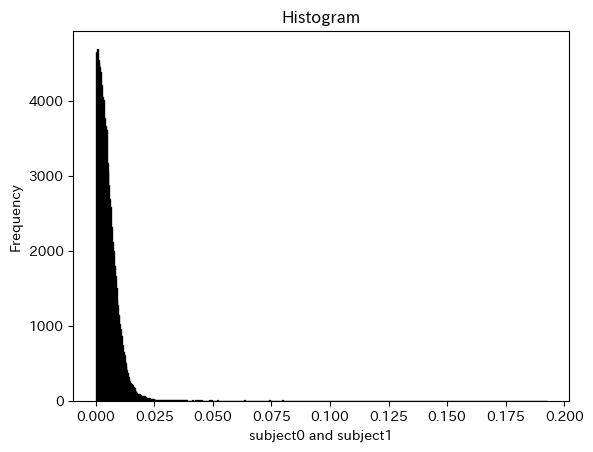

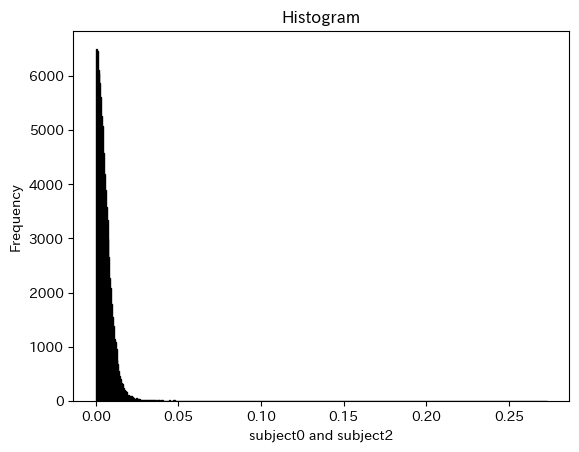

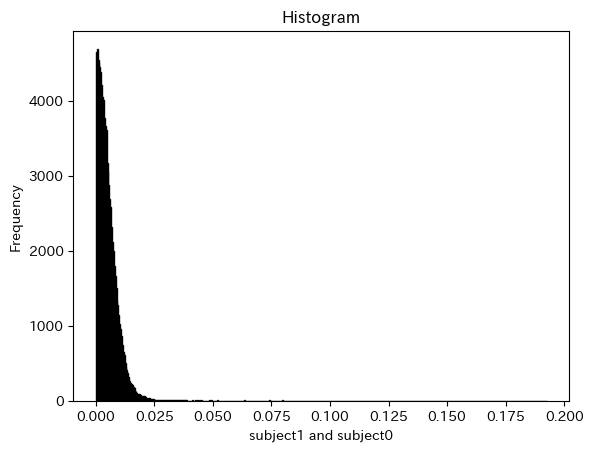

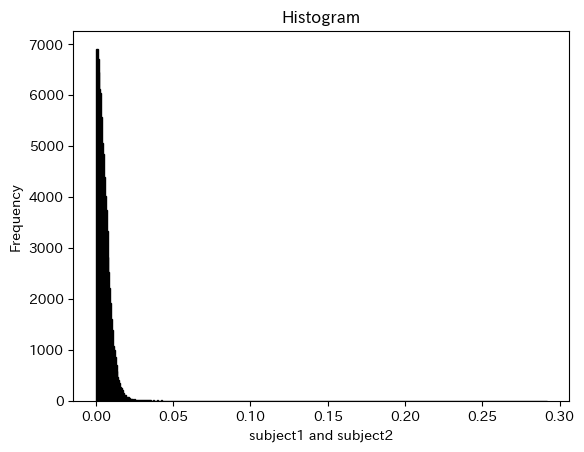

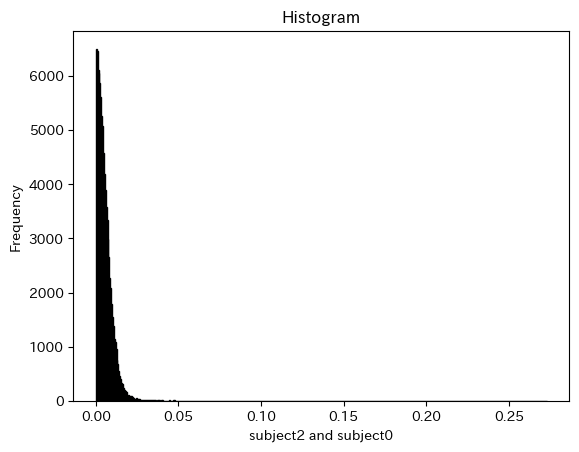

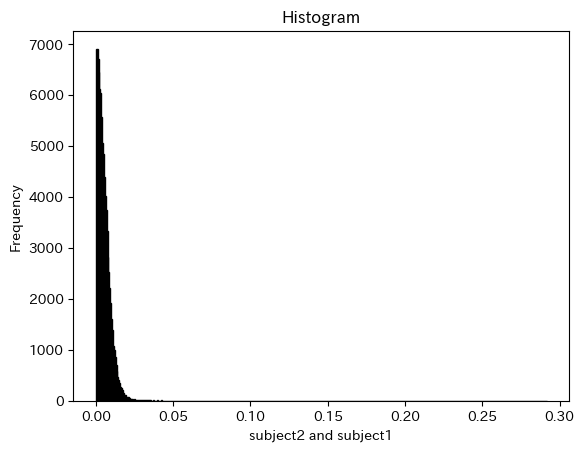

simimom2 : 5.2520183983498946e-05
Computation complete.
simitensor's shape:(300, 3, 3)
maxtensor's shape:(300, 3, 3)
simimom2's shape:()

*** Launching clustering computations ***
iterations: 1
Starting iteration, forming cluster 
1. 2. 3. 4. 5. 6. 7. 8. 9. 10. pval > alphacorr_FD Could not find any sufficiently connected components!
11. 12. 13. 14. 15. pval > alphacorr_FD Could not find any sufficiently connected components!
16. 17. 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. pval > alphacorr_FD Could not find any sufficiently connected components!
28. pval > alphacorr_FD Could not find any sufficiently connected components!
29. 30. 31. 32. 33. 34. 35. pval > alphacorr_FD Could not find any sufficiently connected components!
36. 37. pval > alphacorr_FD Could not find any sufficiently connected components!
38. 39. 40. 41. 42. 43. 44. 45. 46. 47. pval > alphacorr_FD Could not find any sufficiently connected components!
48. 49. pval > alphacorr_FD Could not find any sufficiently connected co

array([[  6., 210., 130.],
       [280.,   8., 139.],
       [ 14.,  42., 223.],
       [110.,  17., 178.],
       [ 22., 244., 237.],
       [235.,  24., 194.],
       [136., 185.,  24.],
       [189.,  28., 260.],
       [ 34., 164., 273.],
       [ 36., 248.,  -1.],
       [268.,  36.,  45.],
       [ 39., 284.,  83.],
       [ 40., 167.,  46.],
       [ 99.,  43.,  61.],
       [ 44., 137.,  -1.],
       [ 86.,  44., 295.],
       [107.,  45., 197.],
       [134.,  47., 183.],
       [212., 188.,  49.],
       [ 52.,  55., 148.],
       [160., 268.,  55.],
       [151.,  68., 141.],
       [ 69., 236., 164.],
       [199.,  95.,  69.],
       [148.,  70., 240.],
       [ 85., 238.,  70.],
       [ -1.,  71., 202.],
       [ 72.,  87.,  -1.],
       [131.,  74., 181.],
       [207.,  79., 241.],
       [200.,  82., 174.],
       [ 83., 182., 235.],
       [150., 155.,  85.],
       [ 87., 252.,  87.],
       [147.,  -1.,  90.],
       [182., 225.,  91.],
       [195.,  97.,  -1.],
 

In [ ]:
res2=ISCTest(components_arrays,0.01,0.01,mixing=False)
res2.clustering


*** ISCTest: ICA testing algorithm ***
Input parameters:
  Number of subjects: 3
  Number of vectors/components per subject: 300
  Data vector dimension: 6307
  False positive rate: 0.01
  False discovery rate: 0.01
Starting computation of similarities...
Basic Dimensions - Subjects: 3, PCA Dimensions: 300, Data Dimension: 6307
Removing means for testing independent components...
Computing similarities and storing max inter-subject similarities...


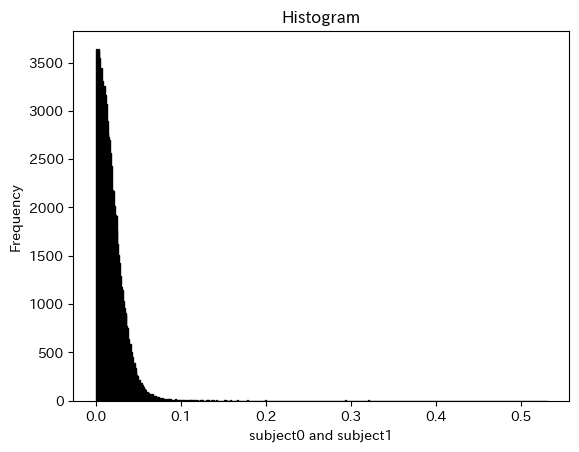

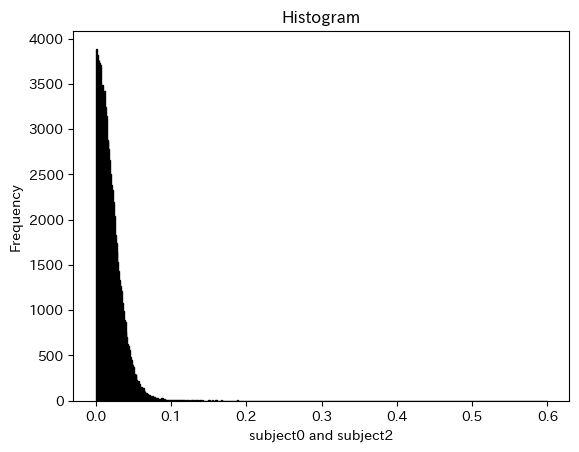

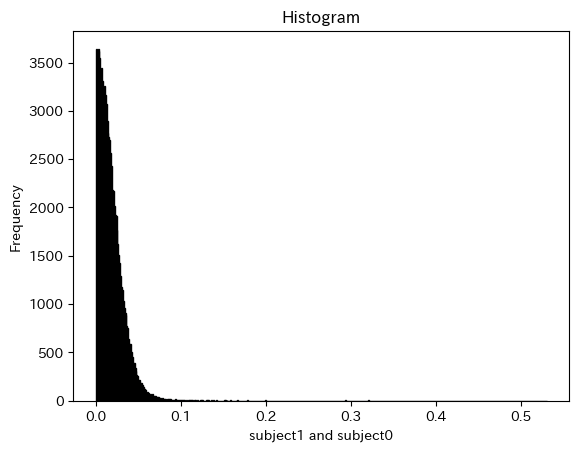

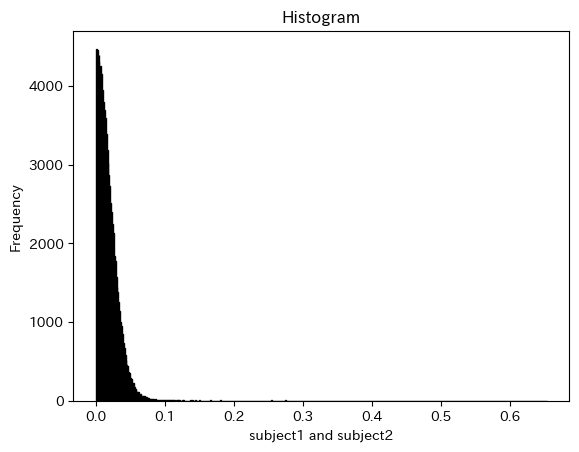

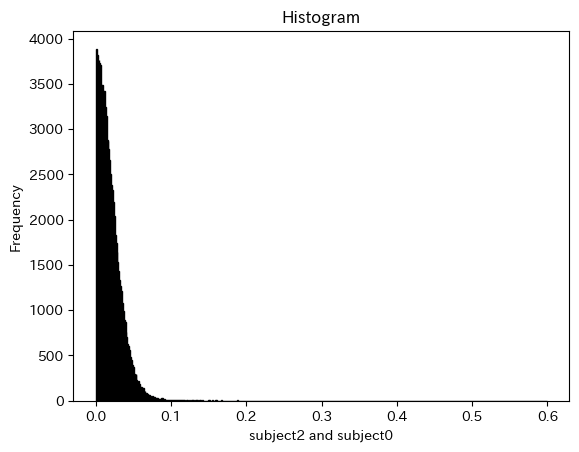

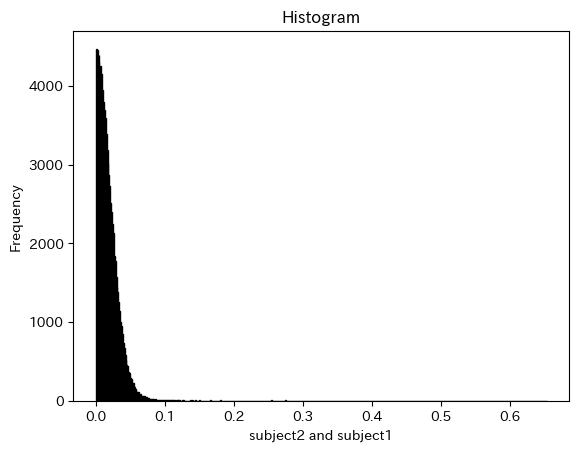

simimom2 : 0.0006311577140527716
Computation complete.
simitensor's shape:(300, 3, 3)
maxtensor's shape:(300, 3, 3)
simimom2's shape:()

*** Launching clustering computations ***
iterations: 1
Starting iteration, forming cluster 
1. 2. 3. 4. 5. 6. 7. 8. 9. 10. 11. 12. 13. 14. 15. 16. pval > alphacorr_FD Could not find any sufficiently connected components!
17. 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. pval > alphacorr_FD Could not find any sufficiently connected components!
30. 31. 32. 33. 34. 35. pval > alphacorr_FD Could not find any sufficiently connected components!
36. 37. 38. 39. 40. pval > alphacorr_FD Could not find any sufficiently connected components!
41. 42. 43. 44. 45. 46. pval > alphacorr_FD Could not find any sufficiently connected components!
47. 48. 49. 50. 51. 52. 53. 54. 55. 56. 57. 58. 59. 60. 61. 62. pval > alphacorr_FD Could not find any sufficiently connected components!
63. 64. 65. pval > alphacorr_FD Could not find any sufficiently connected components!
6

array([[  0., 290., 180.],
       [137.,  64.,   2.],
       [  7.,  85., 205.],
       [280.,   8., 139.],
       [ 14.,  42., 223.],
       [110.,  17., 178.],
       [218.,  92.,  20.],
       [ 22., 244., 237.],
       [ 23., 117.,  38.],
       [235.,  24., 194.],
       [136., 185.,  24.],
       [ 28., 135., 141.],
       [189.,  28., 260.],
       [ 34., 164., 273.],
       [204.,  34., 198.],
       [ 36., 248.,  -1.],
       [268.,  36.,  45.],
       [ 39., 284.,  83.],
       [ 40., 167.,  46.],
       [174.,  41., 299.],
       [ 99.,  43., 158.],
       [ 86.,  44., 295.],
       [107.,  45., 197.],
       [134.,  47., 183.],
       [212., 188.,  49.],
       [ 52.,  55., 148.],
       [160., 268.,  55.],
       [ 61., 210., 130.],
       [151.,  68.,  -1.],
       [ 69., 236., 164.],
       [199.,  95.,  69.],
       [148.,  70., 240.],
       [ 85., 238.,  70.],
       [154.,  71., 202.],
       [ 72.,  87.,  -1.],
       [131.,  74., 181.],
       [ 78., 239., 266.],
 

In [ ]:
res3=ISCTest(common_components_arrays,0.01,0.01,mixing=False)
res3.clustering

In [ ]:
np.sum(res3.similarities[0].flatten()>0.025)

22177


*** ISCTest: ICA testing algorithm ***
Input parameters:
  Number of subjects: 3
  Number of vectors/components per subject: 300
  Data vector dimension: 50000
  False positive rate: 0.01
  False discovery rate: 0.01
Starting computation of similarities...
Basic Dimensions - Subjects: 3, PCA Dimensions: 300, Data Dimension: 50000
Removing means for testing independent components...
Computing similarities and storing max inter-subject similarities...


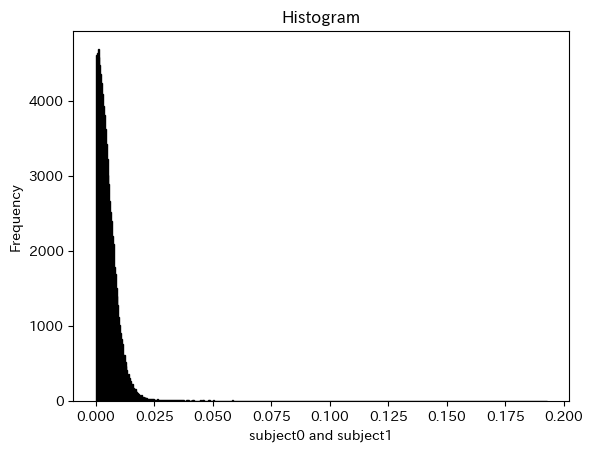

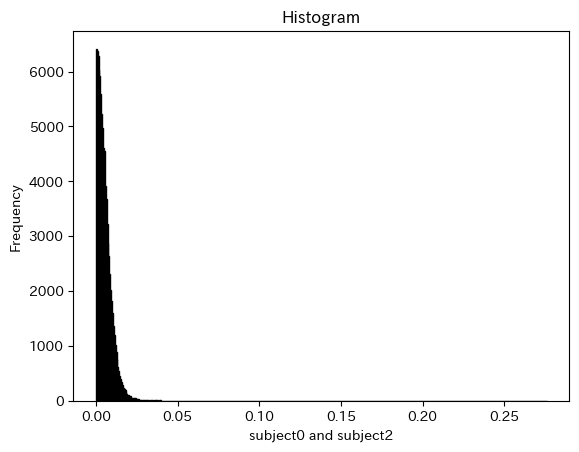

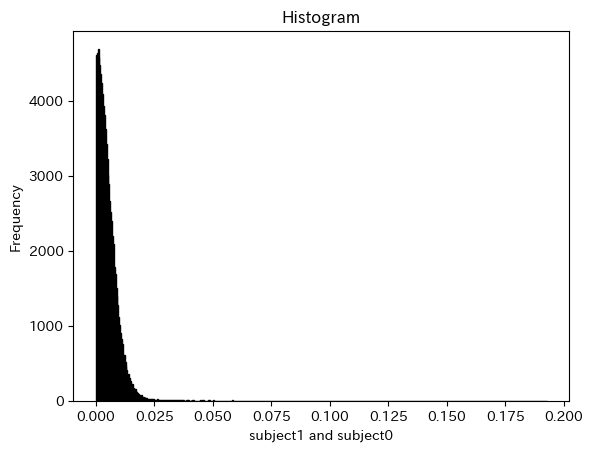

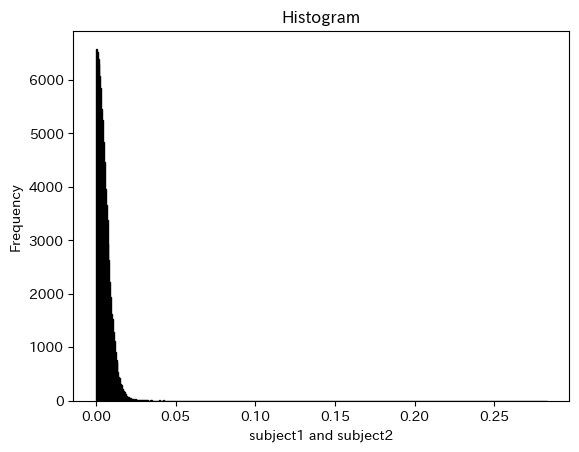

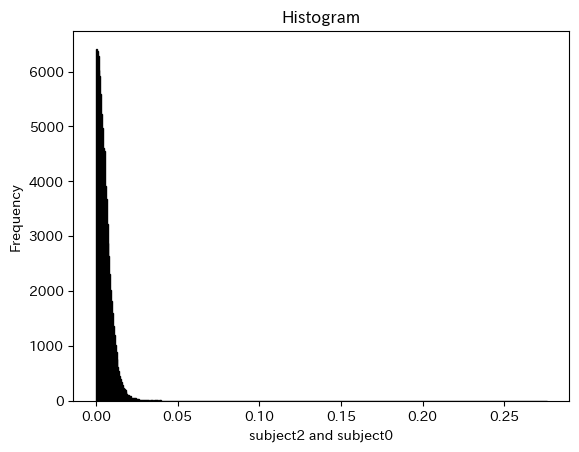

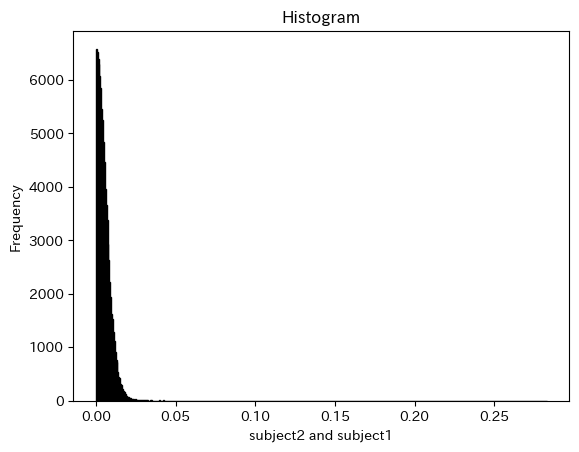

simimom2 : 5.2520183983498906e-05
Computation complete.
simitensor's shape:(300, 3, 3)
maxtensor's shape:(300, 3, 3)
simimom2's shape:()

*** Launching clustering computations ***
iterations: 1
Starting iteration, forming cluster 
1. 2. 3. 4. 5. 6. 7. 8. 9. 10. 11. 12. 13. 14. 15. 16. 17. 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. pval > alphacorr_FD Could not find any sufficiently connected components!
31. 32. 33. pval > alphacorr_FD Could not find any sufficiently connected components!
34. 35. 36. 37. 38. 39. 40. pval > alphacorr_FD Could not find any sufficiently connected components!
41. 42. 43. pval > alphacorr_FD Could not find any sufficiently connected components!
44. 45. pval > alphacorr_FD Could not find any sufficiently connected components!
46. 47. pval > alphacorr_FD Could not find any sufficiently connected components!
48. 49. 50. 51. 52. 53. 54. pval > alphacorr_FD Could not find any sufficiently connected components!
55. 56. pval > alphacorr_FD Could not find a

array([[ 47.,  64.,   2.],
       [212.,  71.,   3.],
       [  6., 215., 154.],
       [  7., 111.,  20.],
       [249.,  27.,   7.],
       [ 14., 120., 243.],
       [ 22.,  28., 106.],
       [297.,  22.,  88.],
       [195., 180.,  28.],
       [148., 294.,  29.],
       [268.,  30., 178.],
       [ 78., 256.,  38.],
       [ 39., 295., 104.],
       [ 40., 216., 266.],
       [199.,  42., 223.],
       [ 72.,  50.,  42.],
       [105.,  43., 282.],
       [ 85., 165.,  43.],
       [ 44., 128.,   6.],
       [152.,  45., 146.],
       [ 52., 284., 239.],
       [138.,  57.,  93.],
       [182., 127.,  58.],
       [122.,  59., 287.],
       [118.,  62.,  94.],
       [ 69., 255., 162.],
       [147.,  69., 218.],
       [ 87.,  78., 292.],
       [164.,  79., 152.],
       [228.,  82.,  -1.],
       [ 83., 170., 149.],
       [ 86.,  87., 258.],
       [224.,  90.,  -1.],
       [207.,  95., 135.],
       [134., 134.,  97.],
       [ 99., 139., 197.],
       [260.,  99., 259.],
 

In [158]:
res4=ISCTest(proc_components_arrays,0.01,0.01,mixing=False)
res4.clustering


*** ISCTest: ICA testing algorithm ***
Input parameters:
  Number of subjects: 3
  Number of vectors/components per subject: 300
  Data vector dimension: 6307
  False positive rate: 0.01
  False discovery rate: 0.01
Starting computation of similarities...
Basic Dimensions - Subjects: 3, PCA Dimensions: 300, Data Dimension: 6307
Removing means for testing independent components...
Computing similarities and storing max inter-subject similarities...


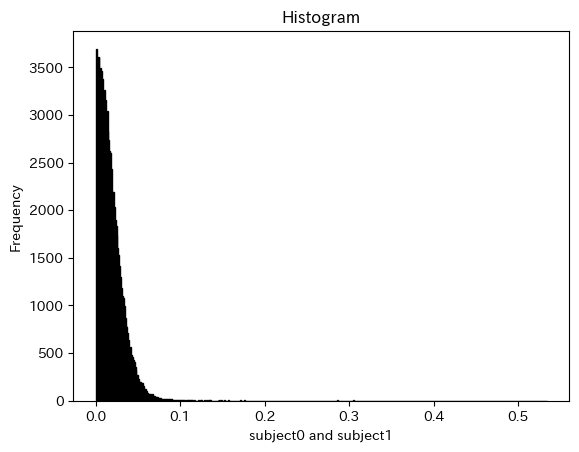

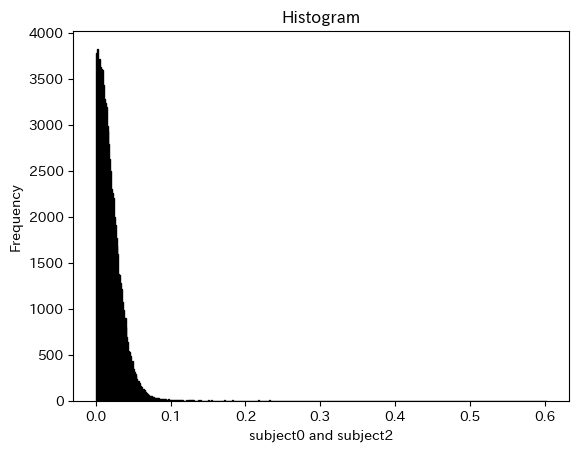

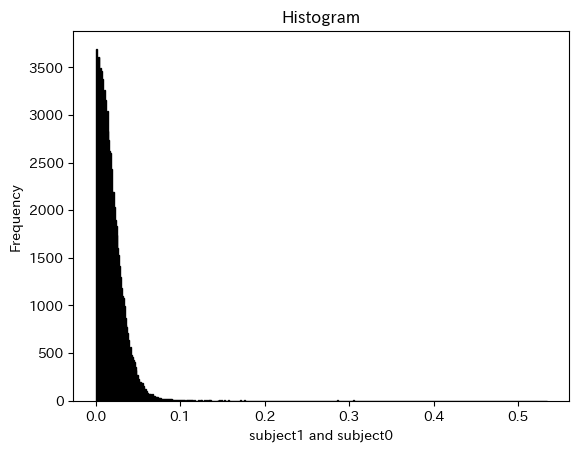

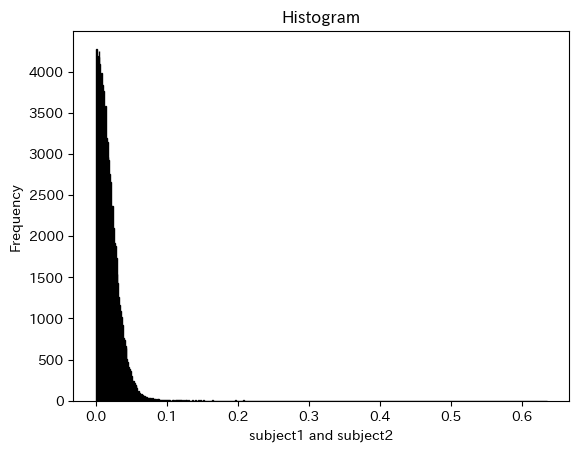

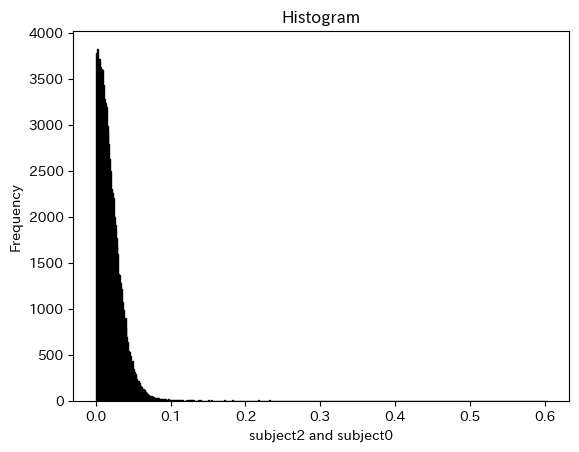

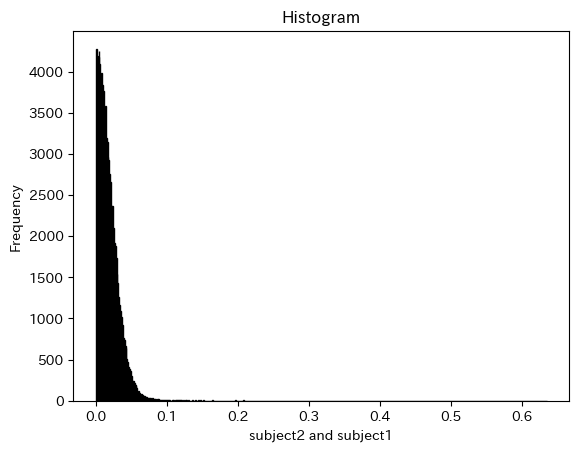

simimom2 : 0.0006331910892392269
Computation complete.
simitensor's shape:(300, 3, 3)
maxtensor's shape:(300, 3, 3)
simimom2's shape:()

*** Launching clustering computations ***
iterations: 1
Starting iteration, forming cluster 
1. 2. 3. 4. 5. 6. 7. 8. 9. 10. 11. 12. 13. 14. 15. 16. 17. 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36. 37. 38. 39. pval > alphacorr_FD Could not find any sufficiently connected components!
40. 41. pval > alphacorr_FD Could not find any sufficiently connected components!
42. 43. 44. 45. 46. 47. pval > alphacorr_FD Could not find any sufficiently connected components!
48. pval > alphacorr_FD Could not find any sufficiently connected components!
49. 50. 51. pval > alphacorr_FD Could not find any sufficiently connected components!
52. 53. 54. 55. 56. pval > alphacorr_FD Could not find any sufficiently connected components!
57. 58. pval > alphacorr_FD Could not find any sufficiently connected components!
59. pval > alphacorr_FD Could

array([[  0.,  37., 253.],
       [ 47.,  64.,   2.],
       [212.,  71.,   3.],
       [262., 280.,   5.],
       [  6., 215., 154.],
       [  7., 111.,  20.],
       [249.,  27.,   7.],
       [ 66.,  19., 185.],
       [265., 273.,  19.],
       [ 22.,  28., 106.],
       [297.,  22.,  88.],
       [ 23., 260.,  84.],
       [ 83.,  25., 149.],
       [ 28., 203., 183.],
       [148., 294.,  29.],
       [268.,  30., 178.],
       [ 78., 256.,  38.],
       [ 39., 295., 104.],
       [ 40., 216., 266.],
       [199.,  42., 223.],
       [ 72.,  50.,  42.],
       [105.,  43., 282.],
       [ 85., 165.,  43.],
       [192., 182.,  44.],
       [152.,  45., 146.],
       [ 52., 284., 239.],
       [138.,  57.,  93.],
       [269., 127.,  58.],
       [122.,  59., 287.],
       [ 82.,  62.,  94.],
       [214., 220.,  62.],
       [136.,  63., 267.],
       [ 69., 255., 162.],
       [147.,  69., 218.],
       [223., 158.,  76.],
       [234.,  77.,  27.],
       [ 87.,  78., 292.],
 

In [159]:
res5=ISCTest(proc_common_components_arrays,0.01,0.01,mixing=False)
res5.clustering

## 分析

In [ ]:
!pip install japanize-matplotlib
import japanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 18.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=ba129ff64b6a764120b03316c0f3a53c9346a4d094ac0fb8f93a6c9bf36774e8
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize-matplotlib


In [145]:
def max_similarity_axis_and_plot(res:ISCTest, ex_name:str):
    sim=res.similarities
    ind1=[0,0,1,1,2,2]
    ind2=[1,2,0,2,0,1]
    for i in range(len(sim)):
        print(f"max:{np.max(sim[i].flatten())}")
        a,b=np.unravel_index(np.argmax(sim[i]),sim[i].shape)
        if i==0:
            print(ica_axis_name_en[:,a],end='')
            print(ica_axis_name_ja[:,b])
        elif i==1:
            print(ica_axis_name_en[:,a],end='')
            print(ica_axis_name_zh[:,b])
        elif i==3:
            print(ica_axis_name_ja[:,a],end='')
            print(ica_axis_name_zh[:,b])
        if i==0 or i==1 or i==3:
            #plt.figure(figsize=(10,8))
            plt.hist(sim[i].flatten(), bins=500, edgecolor='black')
            top_5_percent_value = np.percentile(sim[i].flatten(), 95)

            # 上位5%の値に線を引く
            # plt.axvline(x=top_5_percent_value, color='r', linestyle='--')
            # plt.text(top_5_percent_value, plt.ylim()[1] * 0.9, f'{top_5_percent_value:.6f}', color = 'r', horizontalalignment='left', fontsize=13)
            plt.title('類似度', fontsize=13)
            plt.xlabel(f'subject{ind1[i]} と subject{ind2[i]}', fontsize=13)
            plt.ylabel('頻度', fontsize=13)
            plt.tick_params(axis='both', which='minor', labelsize=13)
            plt.tick_params(axis='both', which='major', labelsize=13)

            filename = f"{ex_name}_plot_{i}.eps"
            plt.savefig(filename,dpi=300,bbox_inches="tight")
            plt.show()

max:0.08596941008419277
['zee' 'iq' 'zeus' 'nap' 'rap']['血腫' '整数' '猟犬' '大鎌' '小売']


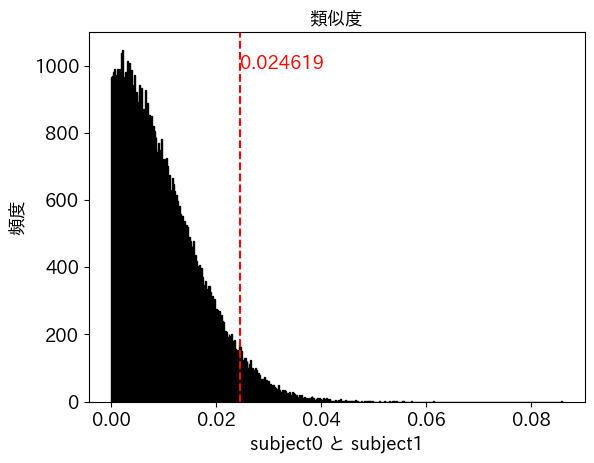

max:0.06076704714686143
['eyes' 'kei' 'rib' 'eyelid' 'wink']['切線' '濕疹' '燉' '焦油' '門鈴']


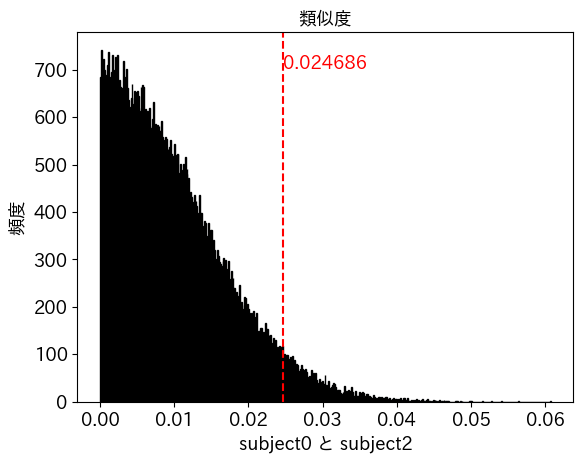

max:0.08596941008419284
max:0.06611194168031763
['金魚' 'ガザ' '詩篇' '会衆' '自律']['未來' '明天' '洗牌' '來世' '預言']


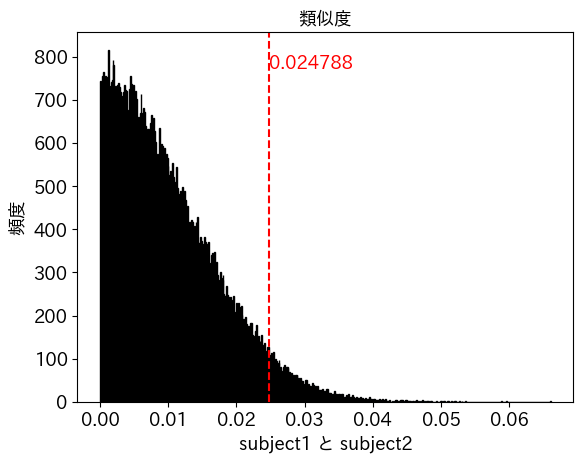

max:0.06076704714686142
max:0.06611194168031768


In [144]:
max_similarity_axis_and_plot(test,"random")

max:0.5306049984437305
['boat' 'buoy' 'cod' 'sail' 'fin']['漁業' '漁師' '海水' '釣り' '船頭']


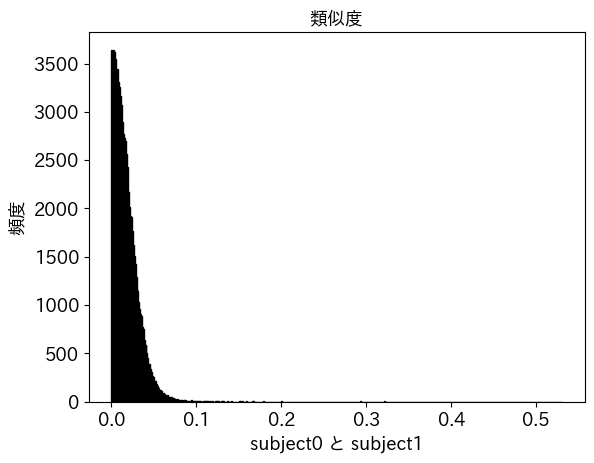

max:0.5991423425633474
['rf' 'malt' 'ryo' 'lee' 'hull']['火藥' '斷層' '加沙' '地籍' '麻將']


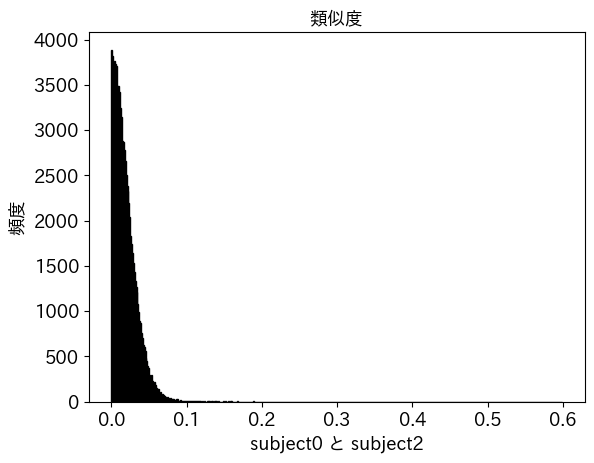

max:0.5306049984437312
max:0.6528618006337533
['攪拌' '弾む' 'ビズ' 'ソリ' '街灯']['歐姆' '映襯' '惠美' '蓬松' '窯']


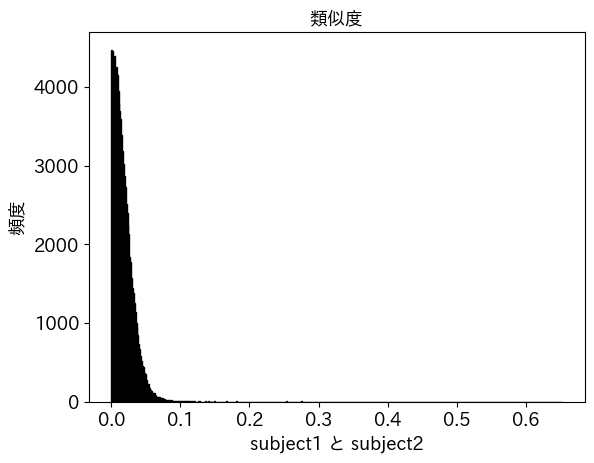

max:0.5991423425633456
max:0.6528618006337533


In [141]:
max_similarity_axis_and_plot(res3,"com_comp")

max:0.8494983916203589
['boat' 'buoy' 'cod' 'sail' 'fin']['回折' '地峡' '工廠' '航法' '励起']


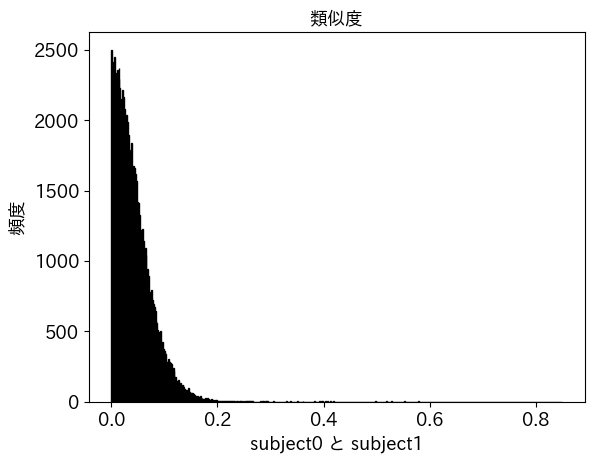

max:0.8272364438536426
['boat' 'buoy' 'cod' 'sail' 'fin']['幼蟲' '築巢' '跳蚤' '背誦' '岡山']


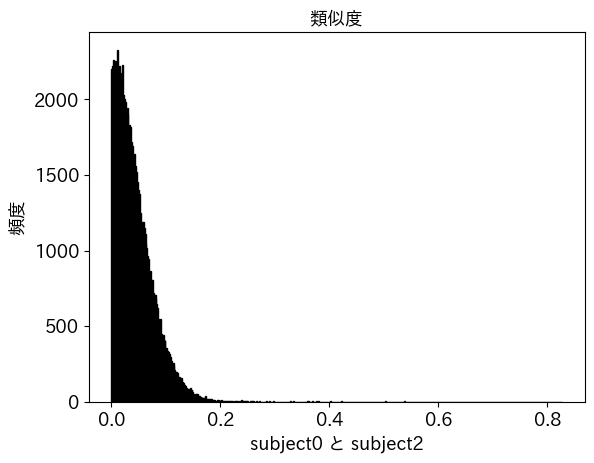

max:0.8494983916203594
max:0.8169453745529475
['矢吹' '虫歯' '避難' '鍵屋' '絞り']['保鏢' '職責' '預算' '偵探' '責任']


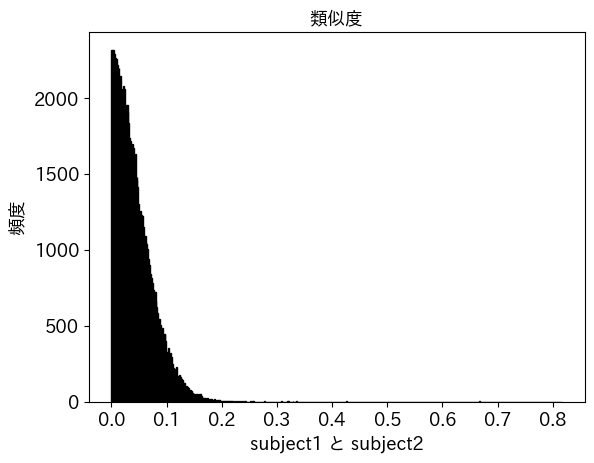

max:0.827236443853645
max:0.816945374552947


In [165]:
max_similarity_axis_and_plot(res1,"proc_mixing")

In [ ]:
common_ja_words[common_en_words.index("arts")]

'芸術'

In [ ]:
common_zh_words[common_en_words.index("arts")]

'藝術'

In [147]:
def ISCTest_axes(res:ISCTest):
    for i in range(len(res.clustering)):
        axis_en = ica_axis_name_en[:5,int(res.clustering[i,0])] if int(res.clustering[i,0]) != -1 else "nan"
        axis_ja = ica_axis_name_ja[:5,int(res.clustering[i,1])] if int(res.clustering[i,1]) != -1 else "nan"
        axis_zh = ica_axis_name_zh[:5,int(res.clustering[i,2])] if int(res.clustering[i,2]) != -1 else "nan"
        if type(axis_en)==np.ndarray:
            print(f"en:{axis_en}",end=' ')
        if type(axis_ja)==np.ndarray:
            print(f"ja:{axis_ja}",end=' ')
        if type(axis_zh)==np.ndarray:
            print(f"zh:{axis_zh}",end=' ')
        print()

In [163]:
ica_axis_name_en = np.array(common_en_words)[np.argsort(proc_common_components_arrays[:, :, 0], axis=0)[-5:][::-1]]
ica_axis_name_ja = np.array(common_ja_words)[np.argsort(proc_common_components_arrays[:, :, 1], axis=0)[-5:][::-1]]
ica_axis_name_zh = np.array(common_zh_words)[np.argsort(proc_common_components_arrays[:, :, 2], axis=0)[-5:][::-1]]
ISCTest_axes(res1)

en:['iki' 'tar' 'musk' 'echo' 'jane'] ja:['樟脳' '造林' '気性' '脳炎' '浮動'] zh:['朝倉' '係數' '朗' '獵豹' '遠藤'] 
en:['kobo' 'rag' 'ego' 'swap' 'mimi'] ja:['俳優' '主演' '脚本' '演技' '映画'] zh:['流放' '傷寒' '山陽' '鋯' '會津'] 
en:['yom' 'fart' 'scab' 'zeus' 'eve'] ja:['馬具' 'フル' 'ウジ' 'モト' 'シダ'] zh:['高' '低' '智商' '品質' '聲望'] 
en:['iq' 'zoom' 'fuji' 'blur' 'lux'] ja:['請願' '水疱' '絶縁' '胃腸' '消防'] zh:['天體' '恆星' '星系' '木星' '亮度'] 
en:['rye' 'bao' 'bog' 'hat' 'wet'] ja:['形質' '減刑' '砂州' '媚薬' '口蓋'] zh:['有線' '電視' '電台' '講壇' '頻道'] 
en:['sex' 'cock' 'tit' 'gay' 'pussy'] ja:['射精' '愛撫' '媚薬' '精液' '勃起'] zh:['遊俠' '術士' '邯鄲' '鵲' '毯'] 
en:['bra' 'saito' 'zee' 'plot' 'hue'] ja:['ガザ' 'サメ' '乾癬' '斜視' '黒鉛'] zh:['金橘' '高知' '國徽' '梅森' '摺紙'] 
en:['pin' 'rod' 'bolt' 'iki' 'cam'] ja:['ねじ' '蝶番' '直径' '真鍮' '上顎'] zh:['螺絲' '軸承' '生鏽' '黃銅' '鏽'] 
en:['yom' 'kui' 'rod' 'toy' 'tin'] ja:['入学' '学部' '授業' '退学' '学科'] zh:['肚臍' '氣管' '肋骨' '麝香' '象牙'] 
en:['deco' 'arts' 'murals' 'dali' 'vase'] ja:['画家' '壁画' '肖像' '描画' '彫刻'] zh:['宵禁' '蟬' '鑽' '溫床' '微風'] 
en:['bra' 'tux' 'sew' 'j

In [164]:
ica_axis_name_en = np.array(common_en_words)[np.argsort(common_components_arrays[:, :, 0], axis=0)[-5:][::-1]]
ica_axis_name_ja = np.array(common_ja_words)[np.argsort(common_components_arrays[:, :, 1], axis=0)[-5:][::-1]]
ica_axis_name_zh = np.array(common_zh_words)[np.argsort(common_components_arrays[:, :, 2], axis=0)[-5:][::-1]]

ISCTest_axes(res3)

en:['agar' 'kei' 'rye' 'iq' 'pie'] ja:['本屋' '店舗' '小売' '理髪' '花屋'] zh:['購買' '議價' '促銷' '罐裝' '賣'] 
en:['noon' 'doi' 'dusk' 'nap' 'fax'] ja:['実生' '年金' 'バイ' '砲艦' '変位'] zh:['孢子' '攝政' '躍' '年表' '土佐'] 
en:['iq' 'zoom' 'fuji' 'blur' 'lux'] ja:['水疱' '音節' '動脈' '戸口' '触手'] zh:['宵禁' '溫床' '蟬' '繩' '微風'] 
en:['army' 'navy' 'wars' 'fort' 'iraq'] ja:['石綿' '不妊' '温室' '尊者' '天丼'] zh:['騎兵' '軍營' '軍' '步兵' '後勤'] 
en:['cup' 'pot' 'tea' 'mugs' 'bowl'] ja:['シギ' '恒星' '厚い' '毛皮' '教化'] zh:['朝倉' '獵豹' '朗' '遠藤' '足利'] 
en:['rf' 'ray' 'ink' 'flag' 'poe'] ja:['日産' '廃車' '車両' '剛性' '車庫'] zh:['啞鈴' '霍亂' '彌勒' '針織' '無縫'] 
en:['book' 'kobo' 'arc' 'manga' 'pulp'] ja:['形質' '写像' '溶接' '菩提' '会衆'] zh:['書架' '裝訂' '書目' '重印' '書店'] 
en:['sex' 'cock' 'tit' 'gay' 'pussy'] ja:['射精' '精液' '愛撫' '勃起' '媚薬'] zh:['陰戶' '射精' '愛撫' '春藥' '貞操'] 
en:['rf' 'iq' 'typo' 'bye' 'val'] ja:['掘る' '運ぶ' '吸う' '振る' '着る'] zh:['直到' '壩' '趨勢' '林肯' '鼻涕'] 
en:['fifi' 'bye' 'nana' 'wire' 'iq'] ja:['王族' '天皇' '皇后' '公爵' '陵墓'] zh:['假釋' '硒' '惡性' '直腸' '胡蜂'] 
en:['ou' 'beg' 'sue' 'or' 'r

In [ ]:
max_similarity_axis_and_plot(res3) #common_component

max:0.5154158836329736
['ham' 'pie' 'pork' 'meat' 'tofu']['肉汁' '前菜' '牛肉' 'ネギ' '豆腐']
max:0.6328019043062448
['iki' 'wah' 'sobs' 'fax' 'poet']['修剪' '蕉' '富江' '凸輪' '漢']
max:0.5154158836329717
max:0.5486967171514429
['副詞' '雨水' '攪拌' '弾む' '譲歩']['紀子' '穀倉' '歐姆' '蓬松' '紙漿']
max:0.632801904306246
max:0.5486967171514429


In [ ]:
max_similarity_axis(res1) #proc_mixing

max:0.7561218186068384
['km' 'mugs' 'fax' 'hun' 'pao']['設立' '発足' '北洋' '前身' '創設']
max:0.8503754587909895
['buoy' 'cod' 'sail' 'pier' 'kelp']['紗' '對面' '東南' '緞' '橫幅']
max:0.7561218186068372
max:0.7143634038184568
['環礁' 'ゼロ' '浮力' '国庫' '降順']['紗' '對面' '東南' '緞' '橫幅']
max:0.8503754587909914
max:0.7143634038184566


In [ ]:
max_similarity_axis(res5) #proc_common_component

max:0.5090519774008313
['buoy' 'cod' 'sail' 'pier' 'kelp']['環礁' 'ゼロ' '浮力' '国庫' '降順']
max:0.5968866333650124
['owl' 'fox' 'zoo' 'eel' 'frog']['殘障' '紅花' '築巢' '陰極' '波特']
max:0.5090519774008334
max:0.5403322644027787
['近視' '網膜' '奥羽' '修業' '締切']['官' '橡' '土豆' '地主' '彩票']
max:0.5968866333650128
max:0.5403322644027788


In [ ]:
top_indices = np.argsort(common_components_arrays[:, :, 0], axis=0)[-5:][::-1]
ica_axis_name_en = np.array(common_en_words)[top_indices]
for i in range(5):
    print(ica_axis_name_en[:,i])

['art' 'mural' 'deco' 'arts' 'murals']
['ad' 'kui' 'iki' 'dot' 'ou']
['fit' 'id' 'van' 'fame' 'ego']
['doi' 'dead' 'kg' 'if' 'old']
['uk' 'id' 'kai' 'fix' 'gap']


In [ ]:
top_indices = np.argsort(common_components_arrays[:, :, 1], axis=0)[-5:][::-1]
ica_axis_name_ja = np.array(common_ja_words)[top_indices]
for i in range(5):
    print(ica_axis_name_ja[:,i])

['溶剤' '溶剤' '締切' '長老' '長老']
['副詞' '避難' '避難' '避難' '断層']
['修業' '脱水' '脱水' '抗体' '抗体']
['治癒' '貢献' '貢献' '成長' '成長']
['嚢胞' '再審' '長野' '信玄' '塹壕']


In [ ]:
top_indices = np.argsort(common_components_arrays[:, :, 2], axis=0)[-5:][::-1]
ica_axis_name_zh = np.array(common_zh_words)[top_indices]
for i in range(5):
    print(ica_axis_name_zh[:,i])

['紡' '支點' '舵' '宣洩' '子爵']
['八月' '四月' '十月' '二月' '九月']
['馬' '馬' '馬廄' '平川' '騎']
['胸膜' '華氏' '男裝' '灰' '灰']
['債權' '債權' '謎語' '謎語' '絕地']


In [ ]:
print(len(set(common_ja_words)))

7144


In [ ]:
top_indices = np.argsort(common_components_arrays[:, :, 2], axis=0)[-5:][::-1]
ica_axis_name_zh = np.array(common_zh_words)[top_indices]
print(top_indice[])
for i in range(5):
    print(ica_axis_name_zh[:,i])

[[4997 8331 3922 ...  638    4 4295]
 [2353 1174 6749 ... 2624  932 3240]
 [2823 7069 4105 ... 5002 1942 2250]
 [ 318  737 4922 ... 7702 5789 6684]
 [4788 6713 6474 ... 1642 6989 8639]]
['紡' '支點' '舵' '宣洩' '子爵']
['八月' '四月' '十月' '二月' '九月']
['馬' '馬' '馬廄' '平川' '騎']
['胸膜' '華氏' '男裝' '灰' '灰']
['債權' '債權' '謎語' '謎語' '絕地']


In [ ]:
type(axis_en)

numpy.ndarray

en:['baby' 'fetus' 'son'] ja:['幼児' '子供' '胎児'] zh:['兌換' '鴕鳥' '參贊'] 
en:['zoo' 'dam' 'id'] ja:['宿泊' '朝食' 'スパ'] zh:['捕鯨' '鼬' '菊池'] 
en:['arts' 'dali' 'vase'] ja:['画家' '絵画' '壁画'] zh:['海牛' '奶昔' '圈地'] 
en:['kobo' 'mimi' 'grid'] ja:['朝貢' '地籍' '継手'] zh:['首映' '放映' '喜劇'] 
en:['kg' 'ore' 'ham'] ja:['気体' '吸う' '吸気'] zh:['束腰' '手銬' '鐘擺'] 
en:['iki' 'mai' 'jam'] ja:['農林' '炭素' '寒天'] zh:['邯鄲' '求愛' '瞳'] 
en:['wit' 'ota' 'gobi'] ja:['偽善' '暴言' '侮辱'] zh:['反抗' '鎮壓' '抗議'] 
en:['book' 'kobo' 'prose'] ja:['形質' '写像' '落札'] zh:['寫' '撰寫' '手寫'] 
en:['hip' 'scar' 'cyst'] ja:['口蓋' '後方' '半円'] zh:['蓬松' '穀倉' '哲也'] 
en:['joe' 'mrs' 'lee'] ja:['徒歩' '小売' '免責'] zh:['壘球' '口紅' '漆器'] 
en:['heal' 'toon' 'elf'] ja:['火力' '短剣' '狩り'] zh:['濱田' '肽' '氫'] 
en:['ou' 'dower' 'mai'] ja:['窃盗' '累犯' '逮捕'] zh:['傷寒' '瓷' '攝氏'] 
en:['king' 'ruler' 'duchy'] ja:['王族' '天皇' '公爵'] zh:['崇德' '皇帝' '醚'] 
en:['kg' 'iq' 'yom'] ja:['弾む' '攪拌' '写像'] 
en:['pun' 'low' 'joe'] ja:['瑞穂' '算盤' '防弾'] zh:['最短' '縮短' '週期'] 
en:['mop' 'sewer' 'poo'] ja:['樟脳' '螺鈿' '公証'] 
e

In [ ]:
ica_axis_name_en=np.array(comb_en_words)[np.argmax(proc_common_components_arrays[:,:,0],axis=0)]
ica_axis_name_ja=np.array(comb_ja_words)[np.argmax(proc_common_components_arrays[:,:,1],axis=0)]
ica_axis_name_zh=np.array(comb_zh_words)[np.argmax(proc_common_components_arrays[:,:,2],axis=0)]


In [ ]:
for i in range(len(res5.clustering)):
    axis_en = ica_axis_name_en[:3,int(res5.clustering[i,0])] if int(res5.clustering[i,0]) != -1 else "nan"
    axis_ja = ica_axis_name_ja[:3,int(res5.clustering[i,1])] if int(res5.clustering[i,1]) != -1 else "nan"
    axis_zh = ica_axis_name_zh[:3,int(res5.clustering[i,2])] if int(res5.clustering[i,2]) != -1 else "nan"
    if type(axis_en)==np.ndarray:
        print(f"en:{axis_en}",end=' ')
    if type(axis_ja)==np.ndarray:
        print(f"ja:{axis_ja}",end=' ')
    if type(axis_zh)==np.ndarray:
        print(f"zh:{axis_zh}",end=' ')
    print()

en:['baby' 'fetus' 'son'] ja:['露頭' '和泉' '可逆'] zh:['遊俠' '犯規' '水印'] 
en:['equity' 'debt' 'bond'] ja:['償却' '禁錮' '織機'] zh:['駱駝' '紡' '氪'] 
en:['joe' 'mrs' 'lee'] ja:['有形' '副詞' '動詞'] zh:['毒刺' '警棍' '動員'] 
en:['fix' 'bug' 'pose'] ja:['ミス' '誤謬' '誤植'] zh:['英吋' '棄權' '南極洲'] 
en:['aid' 'pie' 'mud'] ja:['通算' '合計' '平均'] zh:['副詞' '牙齦' '獎盃'] 
en:['kobo' 'mimi' 'grid'] ja:['徒歩' '小売' '免責'] zh:['海牛' '殤' '城鎮'] 
en:['kg' 'ore' 'ham'] ja:['侵害' '寓話' '奴婢'] zh:['傷寒' '瓷' '攝氏'] 
en:['dues' 'cost' 'paid'] ja:['基質' '瑪瑙' '禁欲'] zh:['銬' '鈎' '折斷'] 
en:['eve' 'ore' 'cam'] ja:['ガザ' '洒落' '急騰'] zh:['汀' '鄭州' '開墾'] 
en:['owl' 'fox' 'zoo'] ja:['パリ' '教皇' 'ルイ'] zh:['殘障' '紅花' '築巢'] 
en:['comet' 'sky' 'pluto'] ja:['量子' '整数' '感性'] zh:['礦石' '鶴' '財閥'] 
en:['zoo' 'dam' 'id'] ja:['打者' '巨人' '野球'] zh:['懸' '猶豫' '守'] 
en:['hub' 'pop' 'fry'] ja:['点字' '温帯' '弱視'] zh:['獎章' '大獎' '獎盃'] 
en:['zeus' 'cat' 'ray'] ja:['整数' '血腫' '抗原'] zh:['快門' '羅素' '雙打'] 
en:['wing' 'mop' 'sumi'] ja:['酢酸' '再審' '尾形'] zh:['眼線' '墜' '貞操'] 
en:['ray' 'cosine' 'omega'] ja

In [ ]:
for i in range(len(res1.clustering)):
    axis_en = ica_axis_name_en[:3,int(res1.clustering[i,0])] if int(res1.clustering[i,0]) != -1 else "nan"
    axis_ja = ica_axis_name_ja[:3,int(res1.clustering[i,1])] if int(res1.clustering[i,1]) != -1 else "nan"
    axis_zh = ica_axis_name_zh[:3,int(res1.clustering[i,2])] if int(res1.clustering[i,2]) != -1 else "nan"
    if type(axis_en)==np.ndarray:
        print(f"en:{axis_en}",end=' ')
    if type(axis_ja)==np.ndarray:
        print(f"ja:{axis_ja}",end=' ')
    if type(axis_zh)==np.ndarray:
        print(f"zh:{axis_zh}",end=' ')
    print()

en:['equity' 'debt' 'bond'] ja:['償却' '禁錮' '織機'] zh:['駱駝' '紡' '氪'] 
en:['joe' 'mrs' 'lee'] ja:['有形' '副詞' '動詞'] zh:['毒刺' '警棍' '動員'] 
en:['kobo' 'mimi' 'grid'] ja:['徒歩' '小売' '免責'] zh:['海牛' '殤' '城鎮'] 
en:['agar' 'veil' 'aoi'] ja:['パリ' '教皇' 'ルイ'] zh:['殘障' '紅花' '築巢'] 
en:['comet' 'sky' 'pluto'] ja:['量子' '整数' '感性'] zh:['礦石' '鶴' '財閥'] 
en:['zeus' 'cat' 'ray'] ja:['整数' '血腫' '抗原'] zh:['快門' '羅素' '雙打'] 
en:['zeus' 'bee' 'flu'] ja:['多芸' '石綿' '羽毛'] zh:['馬虎' '龜' '雖然'] 
en:['ryo' 'aoi' 'hiro'] zh:['大塚' '肚臍' '白喉'] 
en:['hip' 'scar' 'cyst'] ja:['近視' '網膜' '奥羽'] zh:['官' '橡' '土豆'] 
en:['gums' 'lard' 'sumi'] ja:['回天' 'ハタ' '織機'] zh:['肋骨' '鬣狗' '血栓'] 
en:['seiko' 'iki' 'desk'] ja:['移植' '任天堂' '鉄拳'] zh:['無' '懸念' '音訊'] 
en:['km' 'mugs' 'fax'] ja:['設立' '発足' '北洋'] zh:['歐姆' '射頻' '乘法'] 
en:['hot' 'cold' 'sun'] ja:['任命' '就任' '解任'] zh:['猥褻' '副詞' '撲滅'] 
en:['rf' 'ray' 'ink'] ja:['農林' '炭素' '寒天'] zh:['大社' '光輝' '劇團'] 
en:['iki' 'hub' 'ket'] ja:['概説' '沿革' '軌跡'] 
en:['king' 'ruler' 'duchy'] ja:['集計' '平均' '獲得'] 
en:['eve' 'or

In [ ]:
ISCTest(components_arraysc,0.05,0.05,mixing=False)
#共通語componentsの結果

In [ ]:
res=ISCTest(mixing_arrays,0.05,0.05,mixing=True)
res.clustering


*** ISCTest: ICA testing algorithm ***
Input parameters:
  Number of subjects: 3
  Number of vectors/components per subject: 300
  Data vector dimension: 300
  False positive rate: 0.05
  False discovery rate: 0.05
Starting computation of similarities...
Basic Dimensions - Subjects: 3, PCA Dimensions: 300, Data Dimension: 300

Computing stabilized inverse of covariance matrix:
  Concatenating data
  Calling numpy SVD function on matrix of size 300 x 900
Computing similarities and storing max inter-subject similarities...
simimom2 : 0.003148714795679241
Computation complete.
simitensor's shape:(300, 3, 3)
maxtensor's shape:(300, 3, 3)
simimom2's shape:()

*** Launching clustering computations ***
iterations: 2
Starting iteration 1, forming cluster 
1. pval > alphacorr_FD Could not find any sufficiently connected components!
2. Done.
Number of clusters found in initial iteration: 1
Number of vectors clustered in initial iteration: 2 (0.22% of all vectors)
Starting iteration 2, forming c

array([[ -1.,   3., 185.]])

In [ ]:
print(mixing_arrays[:,69,0])
print(mixing_arrays[:,40,1])
print(mixing_arrays[:,80,2])

[-7.69861096e-04 -1.13741806e-03 -1.86956694e-03  2.91626974e-03
  4.96355362e-03 -2.25147869e-03  2.55108057e-03  4.95183259e-03
  5.98428548e-03  9.21936466e-04 -5.30848214e-03  1.11690846e-03
  4.17173439e-03 -2.05530200e-03  6.49561794e-03  1.14492413e-03
 -8.65395795e-04  7.96545921e-05 -2.12522798e-04 -6.96488788e-04
 -1.60663692e-03  1.08451829e-03 -1.70113508e-03  7.34962025e-03
  4.51343763e-04 -9.72812113e-03 -4.84437278e-03 -7.00991253e-03
 -3.44472633e-03  4.06397724e-03 -1.27587562e-03  3.05954449e-03
  1.44057317e-03  5.91547781e-04  2.72574001e-03  1.41074115e-03
  2.74196836e-03  1.50822950e-03  3.06137558e-03  9.00496140e-04
 -2.86702946e-03 -3.63958296e-03 -8.11457272e-04 -4.96162510e-03
 -1.79195449e-03  2.24333541e-03  1.15408851e-03 -6.37619475e-04
  7.49898388e-03 -2.81696083e-03  3.87695159e-03  3.83819640e-03
  1.39115756e-03 -4.46680099e-03 -4.24901047e-03  1.47188388e-03
 -5.66932050e-04  4.40274914e-04 -8.01371313e-04  5.36995468e-03
  2.94216637e-03 -4.52494

In [ ]:
mixing_arrays=np.stack((matrix1, proc_matrix2, proc_matrix3), axis=2)
res=ISCTest(mixing_arrays,0.05,0.05,mixing=True)
res.clustering


*** ISCTest: ICA testing algorithm ***
Input parameters:
  Number of subjects: 3
  Number of vectors/components per subject: 300
  Data vector dimension: 300
  False positive rate: 0.05
  False discovery rate: 0.05
Starting computation of similarities...
Basic Dimensions - Subjects: 3, PCA Dimensions: 300, Data Dimension: 300

Computing stabilized inverse of covariance matrix:
  Concatenating data
  Calling numpy SVD function on matrix of size 300 x 900
Computing similarities and storing max inter-subject similarities...
simimom2 : 0.003220313185445768
Computation complete.
simitensor's shape:(300, 3, 3)
maxtensor's shape:(300, 3, 3)
simimom2's shape:()

*** Launching clustering computations ***
iterations: 2
Starting iteration 1, forming cluster 
1. 2. 3. 4. 5. 6. 7. 8. 9. 10. 11. 12. 13. 14. 15. 16. 17. 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. pval > alphacorr_FD Could not find any sufficiently connected components!
28. 29. 30. 31. 32. pval > alphacorr_FD Could not find any sufficien

array([[  6., 148., 208.],
       [ 74., 274.,   7.],
       [  8., 180., 258.],
       [ 41., 214.,  12.],
       [ 13., 237., 118.],
       [ 20.,  13., 215.],
       [ 15.,  33., 163.],
       [ 18., 117.,  99.],
       [224.,  19.,  87.],
       [249.,  22., 228.],
       [ 23.,  39., 245.],
       [  1., 110.,  23.],
       [ 28., 269., 249.],
       [221.,  31., 135.],
       [ 69.,  40.,  80.],
       [ 42., 271., 173.],
       [199.,  43.,  93.],
       [289.,  45., 124.],
       [271.,  46., 117.],
       [ 49., 260.,  84.],
       [ 53., 284., 206.],
       [ 56., 175., 210.],
       [234.,  61., 101.],
       [ 72.,  67.,  42.],
       [264., 126.,  70.],
       [171.,  72., 187.],
       [189., 204.,  73.],
       [134.,  74., 129.],
       [278.,  84., 241.],
       [250., 112.,  97.],
       [138., 107., 180.],
       [207., 115., 193.],
       [123., 125., 111.],
       [139., 128.,  -1.],
       [181., 132., 188.],
       [262., 228., 133.],
       [282., 218., 142.],
 

In [ ]:
print(components_arrays[:,1,0])
print(components_arrays[:,42,1])
print(components_arrays[:,186,2])


[-0.33303247 -0.75648058  0.75085324 ... -1.37846862 -0.86178738
 -2.06194535]
[-0.43830552  0.20761381 -0.61694401 ... -1.03919302 -0.2064107
 -0.15895465]
[ 2.20872421 -0.03372964 -0.54720743 ... -0.01893602  0.30031869
 -0.07215716]


In [ ]:
res1=ISCTest(components_arrays,0.05,0.05,mixing=False)
res1.clustering
#componentsの結果


*** ISCTest: ICA testing algorithm ***
Input parameters:
  Number of subjects: 3
  Number of vectors/components per subject: 300
  Data vector dimension: 9077
  False positive rate: 0.05
  False discovery rate: 0.05
Starting computation of similarities...
Basic Dimensions - Subjects: 3, PCA Dimensions: 300, Data Dimension: 9077
Removing means for testing independent components...
Computing similarities and storing max inter-subject similarities...
simimom2 : 0.0006054047845363083
Computation complete.
simitensor's shape:(300, 3, 3)
maxtensor's shape:(300, 3, 3)
simimom2's shape:()

*** Launching clustering computations ***
iterations: 1
Starting iteration, forming cluster 
1. 2. 3. 4. 5. 6. 7. 8. 9. 10. 11. 12. 13. 14. 15. 16. 17. 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36. 37. 38. 39. 40. 41. 42. 43. 44. pval > alphacorr_FD Could not find any sufficiently connected components!
45. 46. pval > alphacorr_FD Could not find any sufficiently connected compon

array([[ 81.,  28.,   0.],
       [  1.,  42., 186.],
       [  2.,  17.,  54.],
       [150.,   2., 206.],
       [  3., 200., 111.],
       [ 42., 164.,   3.],
       [  6.,  40., 232.],
       [  8., 263., 155.],
       [161., 256.,   9.],
       [ 64.,  67.,  10.],
       [ 28.,  12.,  16.],
       [ 52., 156.,  12.],
       [ 13., 211.,  80.],
       [ 90.,  14., 259.],
       [ 15., 270., 179.],
       [ 18., 184., 195.],
       [203.,  19., 166.],
       [ 20., 266., 173.],
       [ 23.,  22., 150.],
       [289., 114.,  24.],
       [ 25., 222.,  92.],
       [ 26.,  52., 271.],
       [ 31.,  36.,  66.],
       [278.,  31., 188.],
       [100.,  32., 223.],
       [ 56.,  34.,  63.],
       [ 49.,  35., 211.],
       [190.,  37.,  67.],
       [277.,  46.,  39.],
       [266.,  56.,  40.],
       [ 41., 149., 168.],
       [172., 128.,  43.],
       [ 47., 254., 278.],
       [104.,  76.,  49.],
       [206.,  50., 152.],
       [141., 240.,  51.],
       [ 53., 137., 198.],
 

In [ ]:
ISCTest(components_arrays,0.05,0.05,mixing=False)
#componentsの結果


*** ISCTest: ICA testing algorithm ***
Input parameters:
  Number of subjects: 3
  Number of vectors/components per subject: 300
  Data vector dimension: 6301
  False positive rate: 0.05
  False discovery rate: 0.05
Starting computation of similarities...
Basic Dimensions - Subjects: 3, PCA Dimensions: 300, Data Dimension: 6301
Removing means for testing independent components...
Computing similarities and storing max inter-subject similarities...
simimom2 : 0.0008458653437135057
Computation complete.
simitensor's shape:(300, 3, 3)
maxtensor's shape:(300, 3, 3)
simimom2's shape:()

*** Launching clustering computations ***
iterations: 1
Starting iteration, forming cluster 
1. 2. 3. 4. 5. 6. 7. 8. 9. 10. 11. 12. 13. 14. 15. 16. pval > alphacorr_FD Could not find any sufficiently connected components!
17. 18. pval > alphacorr_FD Could not find any sufficiently connected components!
19. pval > alphacorr_FD Could not find any sufficiently connected components!
20. pval > alphacorr_FD Coul

In [ ]:
ISCTest(components_arrays,0.05,0.05,mixing=False)
#componentsの結果


*** ISCTest: ICA testing algorithm ***
Input parameters:
  Number of subjects: 3
  Number of vectors/components per subject: 300
  Data vector dimension: 50000
  False positive rate: 0.05
  False discovery rate: 0.05
Starting computation of similarities...
Basic Dimensions - Subjects: 3, PCA Dimensions: 300, Data Dimension: 50000
Removing means for testing independent components...
Computing similarities and storing max inter-subject similarities...
simimom2 : 0.0003074841213962995
Computation complete.
simitensor's shape:(300, 3, 3)
maxtensor's shape:(300, 3, 3)
simimom2's shape:()

*** Launching clustering computations ***
iterations: 1
Starting iteration, forming cluster 
1. pval > alphacorr_FD Could not find any sufficiently connected components!
2. 3. 4. 5. 6. 7. 8. 9. pval > alphacorr_FD Could not find any sufficiently connected components!
10. pval > alphacorr_FD Could not find any sufficiently connected components!
11. 12. 13. 14. 15. 16. 17. 18. 19. 20. pval > alphacorr_FD Co

In [ ]:
ISCTest(mixing_arrays,0.05,0.05,mixing=True)


*** ISCTest: ICA testing algorithm ***
Input parameters:
  Number of subjects: 3
  Number of vectors/components per subject: 300
  Data vector dimension: 300
  False positive rate: 0.05
  False discovery rate: 0.05
Starting computation of similarities...
Basic Dimensions - Subjects: 3, PCA Dimensions: 300, Data Dimension: 300

Computing stabilized inverse of covariance matrix:
  Concatenating data
  Calling numpy SVD function on matrix of size 300 x 900
Computing similarities and storing max inter-subject similarities...
simimom2 : 0.003199816100818151
Computation complete.
simitensor's shape:(300, 3, 3)
maxtensor's shape:(300, 3, 3)
simimom2's shape:()

*** Launching clustering computations ***
iterations: 2
Starting iteration 1, forming cluster 
1. Done.
Number of clusters found in initial iteration: 0
Number of vectors clustered in initial iteration: 0 (0.00% of all vectors)
Starting iteration 2, forming cluster 
1. Done.
*** Clustering computation finished ***

Number of clusters 

<ipython-input-21-3cc6b27d99f0>:103: RuntimeWarning: invalid value encountered in long_scalars
  avg_vectors_per_cluster = comps_clustered / num_clusters


In [ ]:
ISCTest(mixing_arrays,0.05,0.05,mixing=True)


*** ISCTest: ICA testing algorithm ***
Input parameters:
  Number of subjects: 3
  Number of vectors/components per subject: 300
  Data vector dimension: 300
  False positive rate: 0.05
  False discovery rate: 0.05
Starting computation of similarities...
Basic Dimensions - Subjects: 3, PCA Dimensions: 300, Data Dimension: 300

Computing stabilized inverse of covariance matrix:
  Concatenating data
  Calling numpy SVD function on matrix of size 300 x 900
Computing similarities and storing max inter-subject similarities...
Processed subject pair: 0, 1
Processed subject pair: 0, 2
Processed subject pair: 1, 0
Processed subject pair: 1, 2
Processed subject pair: 2, 0
Processed subject pair: 2, 1
Computation complete.
simitensor's shape:(300, 3, 3)
maxtensor's shape:(300, 3, 3)
simimom2's shape:()

*** Launching clustering computations ***
iterations: 2
Starting iteration 1, forming cluster 
1. 2. 3. 4. 5. 6. 7. 8. 9. 10. 11. 12. 13. 14. 15. 16. 17. 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 

In [ ]:
ISCTest(mixing_arrays,0.05,0.05,mixing=True)


*** ISCTest: ICA testing algorithm ***
Input parameters:
  Number of subjects: 3
  Number of vectors/components per subject: 300
  Data vector dimension: 1000
  False positive rate: 0.05
  False discovery rate: 0.05
Starting computation of similarities...
Basic Dimensions - Subjects: 3, PCA Dimensions: 300, Data Dimension: 1000

Computing stabilized inverse of covariance matrix:
  Concatenating data
  Calling numpy SVD function on matrix of size 1000 x 900
    Original condition number 4212167538983991.5
    Increased 124 smallest singular values
Computing similarities and storing max inter-subject similarities...
Processed subject pair: 0, 1
Processed subject pair: 0, 2
Processed subject pair: 1, 0
Processed subject pair: 1, 2
Processed subject pair: 2, 0
Processed subject pair: 2, 1
Computation complete.
simitensor's shape:(300, 3, 3)
maxtensor's shape:(300, 3, 3)
simimom2's shape:()

*** Launching clustering computations ***
iterations: 2
Starting iteration 1, forming cluster 
1. 2

In [ ]:
a=None
a=0
print(a==None)

False


In [ ]:
import fasttext.util
ft_en = fasttext.load_model('./drive/Shareddrives/卒論データ/fasttext_models/cc.en.300.bin')
ft_en.get_word_vector("Argentina")

In [ ]:
ft_en.get_dimension()
ft_en.get_word_vector("Argentina")

array([ 8.88752751e-03, -2.21378040e-02, -2.50954218e-02, -5.02525456e-03,
        2.17873696e-02, -8.07255134e-03,  2.31231339e-02, -5.43030202e-02,
        1.88400820e-02, -4.87898625e-02,  5.84229641e-03,  1.29584983e-01,
        3.01325638e-02,  2.14423817e-02,  1.34749943e-03, -2.08257176e-02,
       -2.96414103e-02, -1.06846236e-01,  3.91399488e-02,  2.13223901e-02,
       -1.55168446e-03, -4.03619111e-02,  2.47429963e-02, -6.50158226e-02,
       -2.07802970e-02, -5.83211482e-02,  2.84134075e-02,  6.62187636e-02,
        3.67213786e-03,  7.51429647e-02,  8.70195962e-03,  1.96342990e-02,
       -9.74176545e-03,  1.81774143e-02,  3.10823806e-02, -4.21432266e-03,
       -1.24403872e-02,  6.31677806e-02, -2.38818005e-02,  1.71283036e-02,
        1.57746561e-02, -4.29842062e-02, -3.08862682e-02, -6.69955611e-02,
       -1.56598724e-02,  1.78156961e-02, -1.57085620e-03, -3.79260220e-02,
       -3.29057351e-02,  1.22194719e-02, -2.52704825e-02,  4.05755043e-02,
       -5.71496785e-04, -

In [ ]:
!pip3 install wordfreq
import wordfreq

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 MB 19.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 4.3 MB/s eta 0:00:00


max:0.5220622112656339
['kelp' 'cod' 'fin' 'pier' 'buoy']['嚢胞' '再審' '長野' '信玄' '塹壕']
0.5220622112656339


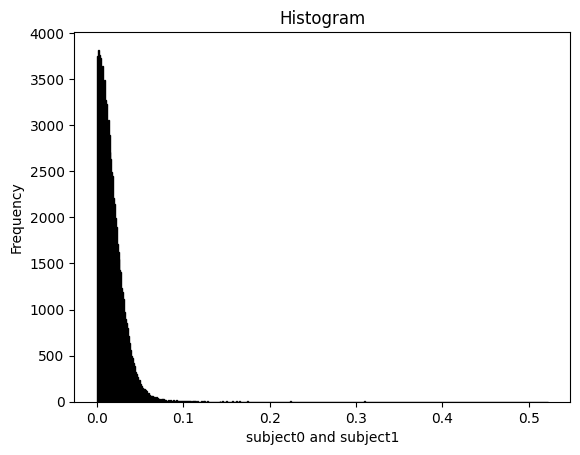

max:0.6074637664412877
['rf' 'ryo' 'lee' 'hay' 'swab']['火藥' '加沙' '焦耳' '燒傷' '根岸']


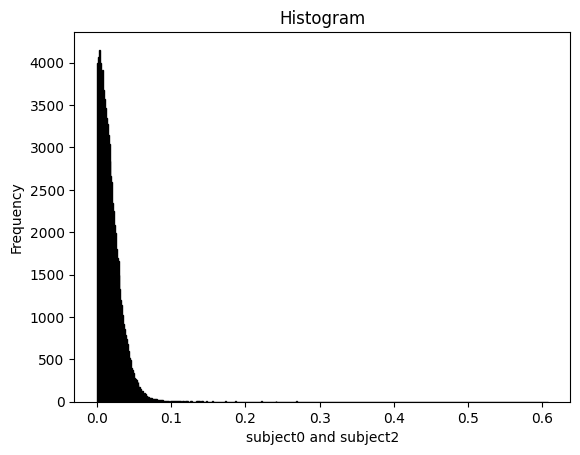

max:0.5220622112656338


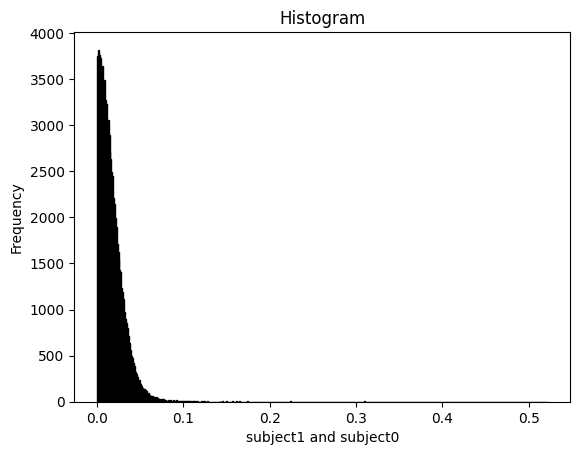

max:0.6054036605281463
['脳炎' '黄疸' '胸膜' '肺炎' '潰瘍']['蓬松' '包租' '歐姆' '花邊' '山雀']


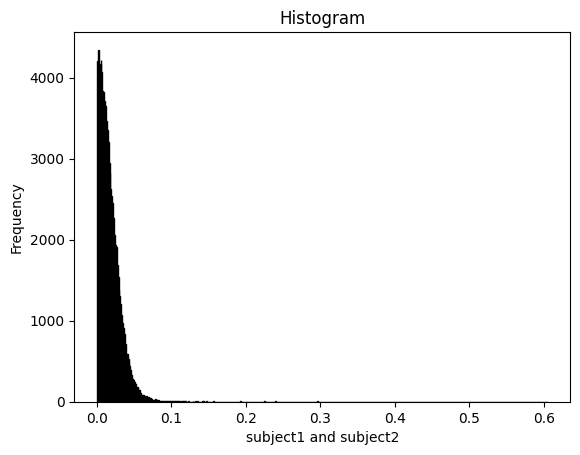

max:0.6074637664412873


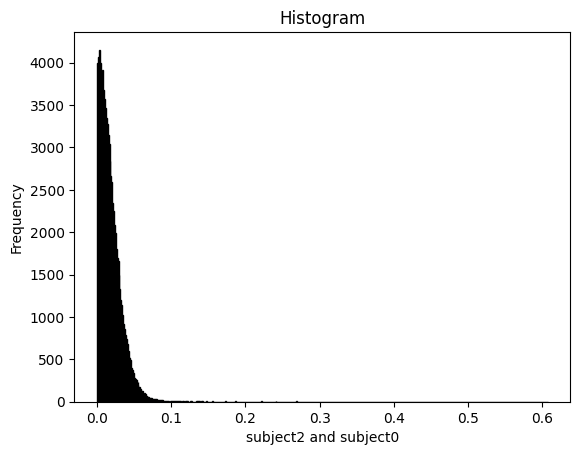

max:0.6054036605281464


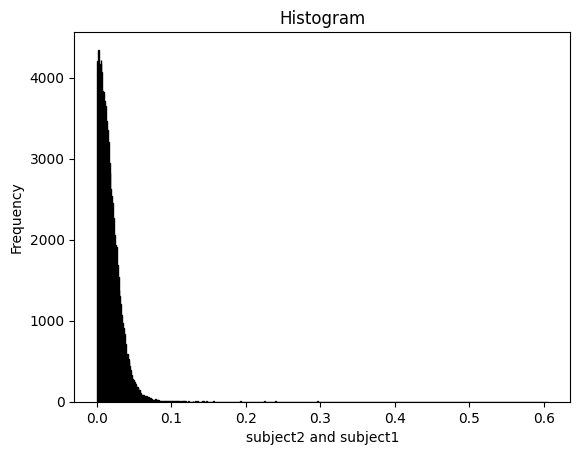

In [ ]:
dir(ft_en)

['__class__',
 '__contains__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_labels',
 '_words',
 'f',
 'get_analogies',
 'get_dimension',
 'get_input_matrix',
 'get_input_vector',
 'get_label_id',
 'get_labels',
 'get_line',
 'get_meter',
 'get_nearest_neighbors',
 'get_output_matrix',
 'get_sentence_vector',
 'get_subword_id',
 'get_subwords',
 'get_word_id',
 'get_word_vector',
 'get_words',
 'is_quantized',
 'labels',
 'predict',
 'quantize',
 'save_model',
 'set_args',
 'set_matrices',
 'test',
 'test_label',
 'words']

In [ ]:
ft_en.words?

In [ ]:
#次元削減
ft_ja = fasttext.load_model('./drive/Shareddrives/卒論データ/fasttext_models/cc.ja.300.bin')
fasttext.util.reduce_model(ft_ja, 50) #寄与率
ft_ja.save_model('./drive/Shareddrives/卒論データ/fasttext_models/cc.ja.50.bin')

In [ ]:
ft_en.save_model?